# **Portfolio Project - Comprehensive Sales Analytics Using BigQuery and Python**

# **1. Connecting to a database**

## **1.1. Create a Python script to connect to the Google BigQuery database**

Installing the required libraries to work with Google BigQuery.

In [1]:
# This command updated the google-cloud-bigquery library
!pip install --upgrade google-cloud-bigquery

## **1.2. Importing the required modules**
The following modules were imported to authenticate and work with BigQuery, as well as to use the pandas library to process query results:

In [1]:
from google.colab import auth
from google.cloud import bigquery

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## **1.3. Authentication**
Getting started with Google Cloud requires authorization, so the following command was used for authentication:

In [3]:
auth.authenticate_user()

## **1.4. Create a BigQuery client**
After authentication, a client is created to work with BigQuery. This is done by specifying the ID of this Google Cloud project.

In [4]:
client = bigquery.Client(project="data-analytics-mate")

#**2. Create a SQL query**
A SQL query is created to access the data in the database. Based on the tables available in the database, a Python query was created to create a dataset containing the following fields:
order date, session ID, continent, country, device, browser, device model name, operating system, browser language, traffic source information, traffic channel, registered user ID, whether the user confirmed their email, whether the user subscribed to the newsletter product category, product name, price, short product description.
When creating the dataset, the necessary table join types were set. The fact that there are few registered users was also taken into account, but we are interested in all orders and all sessions, even if the user has not registered on the site.

## **2.1. SQL query**

In [82]:
query = """
SELECT
s.date as order_date,
s.ga_session_id,

sp.continent,
sp.country,
sp.device,
sp.browser,
sp.mobile_model_name,
sp.operating_system,
sp.language,
sp.medium as traffic_source,
sp.channel,

a.id as account_id,
a.is_verified,
a.is_unsubscribed,

p.category,
p.name as product_name,
p.price,
p.short_description
FROM `DA.session` s
left join `DA.session_params` sp
on s.ga_session_id = sp.ga_session_id

left join `DA.order` o
on s.ga_session_id = o.ga_session_id
left join `DA.product` p
on o.item_id = p.item_id


left join `data-analytics-mate.DA.account_session` acs
on s.ga_session_id = acs.ga_session_id
left join `DA.account` a
on acs.account_id = a.id;
"""

## **2.2. Execute the query**

Launch the BigQuery client for created SQL query.

In [83]:
query_job = client.query(query)
results = query_job.result()

## **2.3. Converting results to DataFrame**

For ease of processing, the result is converted to a pandas DataFrame.

In [84]:
full_session_order_dataset = results.to_dataframe()

## **2.4. Output the query result as a dataset**

In [85]:
# The first few lines of the result are displayed so you can view the output of the SQL query
full_session_order_dataset.head()

order_date  ga_session_id continent         country   device browser  \
0  2020-11-01     5760483956  Americas   United States  desktop  Chrome   
1  2020-11-01     7115337200    Europe  United Kingdom  desktop  Chrome   
2  2020-11-01     3978035233    Europe          Norway   mobile  Chrome   
3  2020-11-01     9648986282    Africa         Nigeria   mobile  Chrome   
4  2020-11-01     4393441533      Asia           China  desktop  Chrome   

  mobile_model_name operating_system language traffic_source         channel  \
0            Safari        Macintosh       zh        <Other>     Paid Search   
1            Chrome              Web    en-us        organic  Organic Search   
2           <Other>              Web       zh         (none)          Direct   
3           <Other>          Android    es-es         (none)          Direct   
4            Chrome          Windows    en-us         (none)          Direct   

   account_id  is_verified  is_unsubscribed                    category  \
0        <NA>         <NA>             <NA>  Bookcases & shelving units   
1        <NA>         <NA>             <NA>  Bookcases & shelving units   
2        <NA>         <NA>             <NA>              Tables & desks   
3        <NA>         <NA>             <NA>  Bookcases & shelving units   
4        <NA>         <NA>             <NA>  Bookcases & shelving units   

  product_name  price                               short_description  
0      VITTSJÖ  609.0  Shelving unit with laptop table, 202x36x175 cm  
1      VITTSJÖ  609.0  Shelving unit with laptop table, 202x36x175 cm  
2       RÅSKOG  189.0                            Trolley, 35x45x78 cm  
3      VITTSJÖ  609.0  Shelving unit with laptop table, 202x36x175 cm  
4      VITTSJÖ  609.0  Shelving unit with laptop table, 202x36x175 cm

# **3. Description of the received dataset**

To get started, let's create a full copy of the DataFrame for further analysis and modification in Pandas using the method copy.

## **3.1. Creating a copy of the dataset**

In [86]:
df = full_session_order_dataset.copy()

## **3.2. Verify that the copy was actually created**

In [87]:
print("ID original:", id(full_session_order_dataset))
print("ID copy   :", id(df))

ID original: 138326559832160
ID copy   : 138326557619648


So, the copying results have different ids, which means they are separate dataset objects. We will use df for further analysis.

## **3.3. Dataset description**

In [88]:
# Number of rows and columns in the dataset
rows, cols = df.shape
print("Rows:", rows)
print("Columns:", cols)

Rows: 349545
Columns: 18


In [89]:
# Also used print(df) output to see all the results.
print(df)

        order_date  ga_session_id continent         country   device  browser  \
0       2020-11-01     5760483956  Americas   United States  desktop   Chrome   
1       2020-11-01     7115337200    Europe  United Kingdom  desktop   Chrome   
2       2020-11-01     3978035233    Europe          Norway   mobile   Chrome   
3       2020-11-01     9648986282    Africa         Nigeria   mobile   Chrome   
4       2020-11-01     4393441533      Asia           China  desktop   Chrome   
...            ...            ...       ...             ...      ...      ...   
349540  2021-01-31     5756982967    Europe         Ukraine  desktop  Firefox   
349541  2021-01-31      464560636  Americas   United States  desktop     Edge   
349542  2021-01-31     6336117447  Americas   United States  desktop   Chrome   
349543  2021-01-31     4958826563      Asia           India   mobile   Safari   
349544  2021-01-31     7058940865    Europe          Norway  desktop     Edge   

       mobile_model_name op

Output summary information about the DataFrame, including data types and the number of non-null values.

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349545 entries, 0 to 349544
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   order_date         349545 non-null  dbdate 
 1   ga_session_id      349545 non-null  Int64  
 2   continent          349545 non-null  object 
 3   country            349545 non-null  object 
 4   device             349545 non-null  object 
 5   browser            349545 non-null  object 
 6   mobile_model_name  349545 non-null  object 
 7   operating_system   349545 non-null  object 
 8   language           235279 non-null  object 
 9   traffic_source     349545 non-null  object 
 10  channel            349545 non-null  object 
 11  account_id         27945 non-null   Int64  
 12  is_verified        27945 non-null   Int64  
 13  is_unsubscribed    27945 non-null   Int64  
 14  category           33538 non-null   object 
 15  product_name       33538 non-null   object 
 16  pr

Using df.info() allowed us to quickly understand the structure of the DataFrame, gaps, data types, and memory usage.
So, this dataframe has 18 columns and 349545 rows. We know the column names and the number of non-null values ​​in each column. The values ​​in the corresponding columns have the following data types (dbdate, int64, object, float64).

The output of df.info() shows that the dbdate data type for the order_date field is not a standard Pandas type.
This is an internal Pandas type because the date was imported from the Google Bigquery database. To avoid errors, we will convert the order_date field data type to datetime in the future.

## **3.4. Convert the order_data type to the correct data type**

In [91]:
# Checking the column order_date type
print(df['order_date'].dtype)

dbdate


In [92]:
# The dbdate type is not a valid date type for Pandas. Convert the column data type to the format and type we need
df['order_date'] = pd.to_datetime(df['order_date'], format='%d-%m-%Y')

In [93]:
#Checking the type dataframe df. The field type order_date has been changed to the correct one
print(df.dtypes)

order_date           datetime64[ns]
ga_session_id                 Int64
continent                    object
country                      object
device                       object
browser                      object
mobile_model_name            object
operating_system             object
language                     object
traffic_source               object
channel                      object
account_id                    Int64
is_verified                   Int64
is_unsubscribed               Int64
category                     object
product_name                 object
price                       float64
short_description            object
dtype: object


## **3.5. Checking duplicates**

In [94]:
# Checking duplicates
df.duplicated().sum()

np.int64(0)

No duplicates were found in this dataset.

## **3.6. Checking the number of incorrect or missing dates**

In [95]:
# Checking the number of invalid or missing dates in column 'order_date'.
print(df['order_date'].isna().sum())

0


The result is 0, so all dates are valid.

## **3.7. Checking the distribution of data in a dataset**

In [96]:
# Generate descriptive statistics for all numeric columns
df.describe().T

count                           mean                  min  \
order_date         349545  2020-12-16 12:42:00.602497536  2020-11-01 00:00:00   
ga_session_id    349545.0              4992250296.631739               1205.0   
account_id        27945.0                  659005.065557             636133.0   
is_verified       27945.0                        0.71698                  0.0   
is_unsubscribed   27945.0                        0.16944                  0.0   
price             33538.0                     953.298679                  3.0   

                                 25%                  50%  \
order_date       2020-11-26 00:00:00  2020-12-15 00:00:00   
ga_session_id           2493646855.0         4988476074.0   
account_id                  647576.0             658952.0   
is_verified                      0.0                  1.0   
is_unsubscribed                  0.0                  0.0   
price                          170.0                445.0   

                                 75%                  max                std  
order_date       2021-01-08 00:00:00  2021-01-31 00:00:00                NaN  
ga_session_id           7491286508.0         9999997129.0  2887450949.537772  
account_id                  670414.0             681962.0       13216.529465  
is_verified                      1.0                  1.0           0.450474  
is_unsubscribed                  0.0                  1.0           0.375147  
price                         1195.0               9585.0        1317.001775

## **3.8. Plotting graphs to analyze the distribution of numerical data**

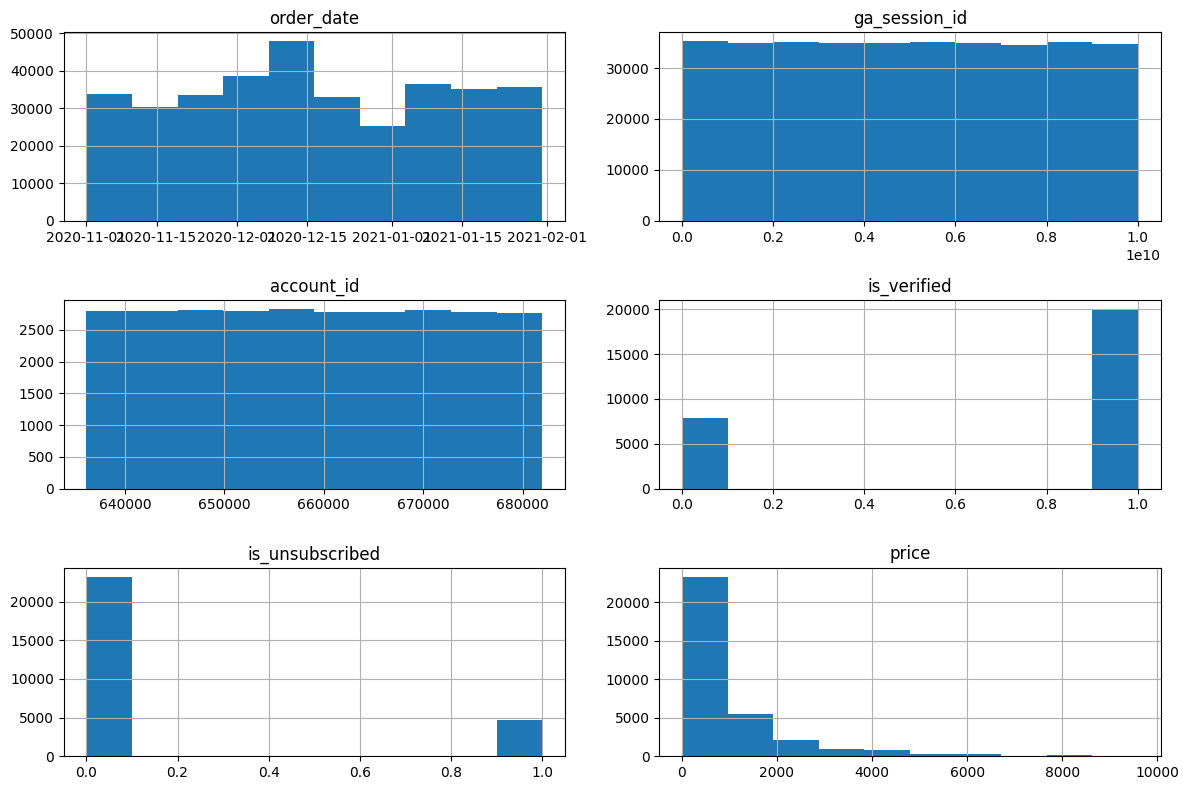

In [97]:
# Constructing histograms to determine the shape of the distribution of numerical data

df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

According to the descriptive statistics, we can see that there is a wide range of sessions, which corresponds to the uniqueness of the sessions. In account_id, the values ​​are close to each other, with a small standard deviation, indicating a stable numbering of accounts. Therefore, the identifiers (ga_session_id, account_id) have a uniform distribution and a stable structure.

71.7% of accounts are verified (is_verified) and only 16.9% of users are unsubscribed (is_unsubscribed), there is a low level of churn.

The price (price) has an asymmetric distribution with a skew to the right: Median = 445, half of the transactions have a price less than or equal to 445. Mean = 953.3 — significantly higher than the median, which indicates the presence of expensive transactions. Maximum = 9585, there are single very expensive purchases that pull the average up. Both variables have a median = 0 and a 75th percentile = 0, which means that more than 75% of users are not verified and unsubscribed.

Inference from descriptive statistics for numerical data. The price distribution is uneven - most transactions are cheap, but there are a small number of expensive ones that significantly affect the mean. The binary variables show that most users are not verified and unsubscribed.

## **3.9. Boxplot graph for outliers analysis**

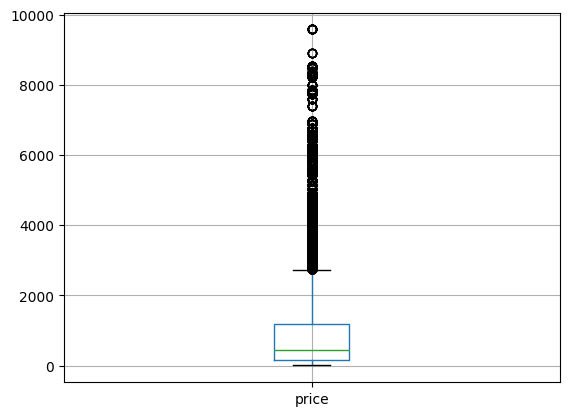

In [98]:
df.boxplot(column='price')
plt.show()

The box (IQR) covers the price range from approximately 7 to 1195. There are many points above 2000, and up to 9999, indicating the presence of isolated expensive transactions. The price distribution is still asymmetric - most values ​​are below 1000, but there is a long tail on the right. The median < the mean, confirming a rightward skew. So there are a lot of outliers - prices that are significantly higher than typical values, but are rare. Let's find all purchases that are considered expensive.

## **3.10. Outlier detection using IQR**

In [99]:
# 1. Calculating quartiles
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1

# 2. Emission-free boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Filtering outliers
outliers = df[(df["price"] < lower_bound) | (df["price"] > upper_bound)]

print(f'Q1: \033[1m{Q1}\033[0m')
print(f'Q3: \033[1m{Q3}\033[0m')
print(f'IQR: \033[1m{IQR}\033[0m')
print(f'Lower bound outliers: \033[1m{lower_bound}\033[0m')
print(f'Upper bound outliers: \033[1m{upper_bound}\033[0m')
print(f'\n\033[1mOutliers:\033[0m')
print(outliers)

Q1: 170.0
Q3: 1195.0
IQR: 1025.0
Lower bound outliers: -1367.5
Upper bound outliers: 2732.5

Outliers:
       order_date  ga_session_id continent        country   device  browser  \
118    2020-11-01     1669621439      Asia         Taiwan  desktop   Chrome   
317    2020-11-01     4831007870      Asia          Japan   mobile   Safari   
447    2020-11-01     7305536759      Asia          India   mobile   Chrome   
458    2020-11-01     7993197525  Americas      Argentina  desktop   Chrome   
813    2020-11-01     5601260351  Americas  United States  desktop   Chrome   
...           ...            ...       ...            ...      ...      ...   
333272 2021-01-27     6581998290      Asia         Taiwan   mobile   Safari   
333945 2021-01-27     4485524721  Americas  United States  desktop   Chrome   
333958 2021-01-27     9999695738  Americas  United States   mobile  <Other>   
333984 2021-01-27     4755437089  Americas  United States  desktop   Chrome   
334429 2021-01-27     494736

According to IQR calculations, 25% of purchases (first quartile) cost less than $170.

And 75% of purchases (third quartile) cost less than $1,195. The spread of purchase amounts is significant, buyers buy very different things, which have different price ranges. The lower limit is −1367.5, since purchases cannot have a negative amount, we are not interested in the lower limit, because no value can be less than zero. As for the upper limit, these are purchases greater than the amount of 2732.5, so where price > 2732.5 can be considered outliers according to the IQR method. That is, these are "very large" purchases compared to typical ones. It is necessary to study such purchases for this dataset in more detail, since it is necessary to understand whether these are VIP clients, corporate purchases, purchases on promotions or errors. To do this, their percentage should be calculated.

## **3.11. Calculation of percentage of purchases**

In [100]:
# Percentage of large purchases
high = df[df["price"] > upper_bound]

percent = len(high) / len(df) * 100

print(f"Percentage of purchases made for a large amount: \033[1m{percent:.2f}%\033[0m")

Percentage of purchases made for a large amount: 0.81%


Conclusion based on outliers analysis.

0.81% of all purchases that have a high price are obtained. It is because of such rare expensive purchases that the average value (≈953) is much higher than the median (445). Since it is necessary to analyze business indicators, and small errors are not errors, but the amounts of large purchases, it is worth leaving them, because such purchases can be of great importance for income and the business as a whole.

## **3.12. Descriptive statistics for all categorical columns**

In [101]:
df.describe(include='object')

continent        country   device browser mobile_model_name  \
count     349545         349545   349545  349545            349545   
unique         6            108        3       6                10   
top     Americas  United States  desktop  Chrome            Chrome   
freq      193179         153470   204429  238460             97254   

       operating_system language traffic_source         channel  \
count            349545   235279         349545          349545   
unique                6        9              6               5   
top                 Web    en-us        organic  Organic Search   
freq             203909   159893         119024          124425   

                          category product_name short_description  
count                        33538        33538             33538  
unique                          14          550              1476  
top     Bookcases & shelving units        BESTÅ             Chair  
freq                          7630         1257               659

Analysis of the distribution of categorical data to determine the frequencies of occurrence of individual categories and identify rare values.

In [102]:
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        print(f'Columns: \033[1m{col}\033[0m')
        print('Frequencies of values:')
        print(f'\033[1m{df[col].value_counts()}\033[0m')
        print('Percentage values:')
        print(f'\033[1m{df[col].value_counts(normalize=True) * 100}\033[0m')
        print('-' * 40)

Columns: continent
Frequencies of values:
continent
Americas     193179
Asia          83113
Europe        65135
Oceania        3703
Africa         3620
(not set)       795
Name: count, dtype: int64
Percentage values:
continent
Americas     55.265846
Asia         23.777482
Europe       18.634224
Oceania       1.059377
Africa        1.035632
(not set)     0.227439
Name: proportion, dtype: float64
----------------------------------------
Columns: country
Frequencies of values:
country
United States        153470
India                 32763
Canada                25994
United Kingdom        11003
France                 6958
                      ...  
Paraguay                 70
Malta                    69
Trinidad & Tobago        68
Kosovo                   68
Honduras                 66
Name: count, Length: 108, dtype: int64
Percentage values:
country
United States        43.905649
India                 9.373042
Canada                7.436525
United Kingdom        3.147806
France         

Inference from descriptive statistics for non-numeric data.

Categorical data shows that there are peak days of activity (the number of unique dates is 92, the most popular date is 08-12-2020 (7212 orders)), which may indicate promotions, sales, or seasonal campaigns. There is also a clear concentration of traffic in the USA (the Americas continent), which means that the main part of traffic and purchases comes from America. Users are mainly from desktop devices, with the dominance of the Chrome browser and using the English language, which confirms the geographical focus and the strong role of organic search. The most popular products are from the storage furniture category, with BESTÅ as the leader.

## **3.13. Plotting graphs to analyze the distribution of categorical data**

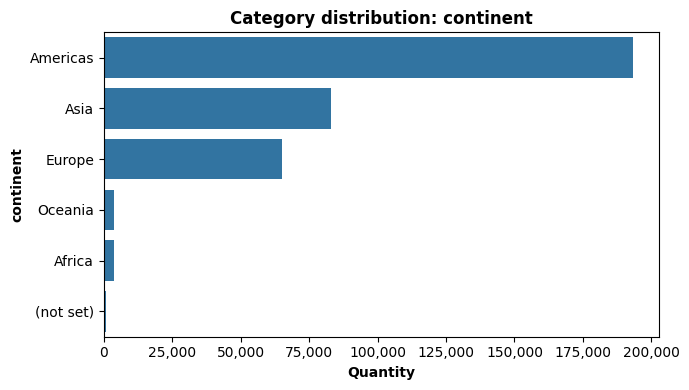

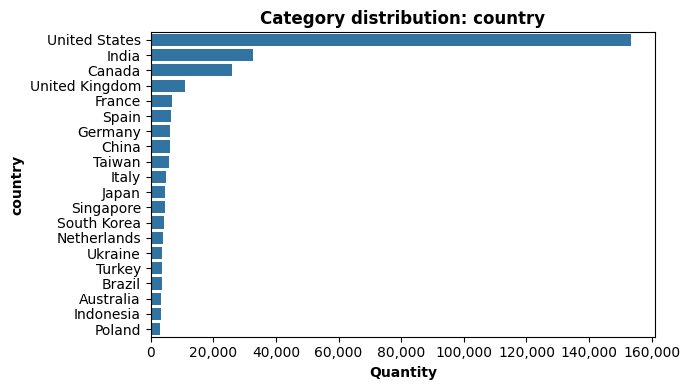

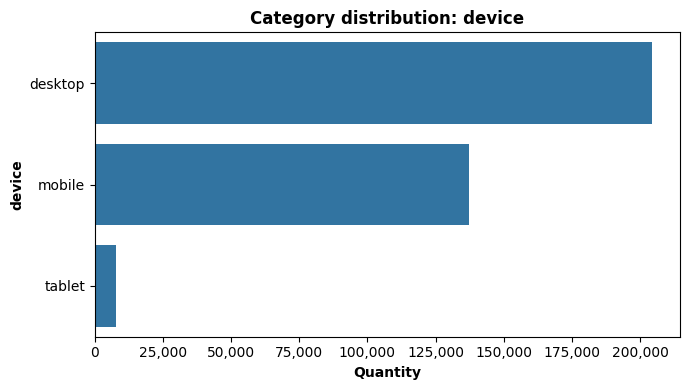

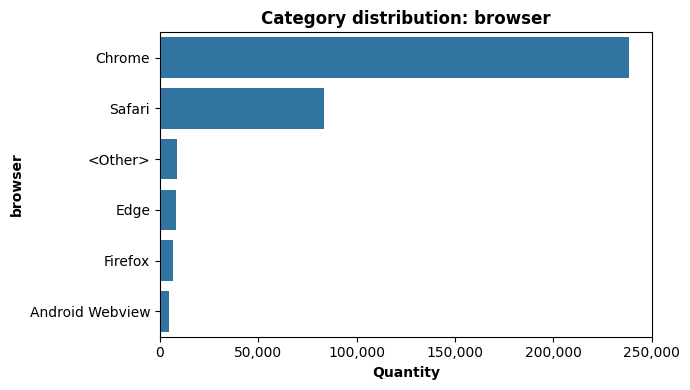

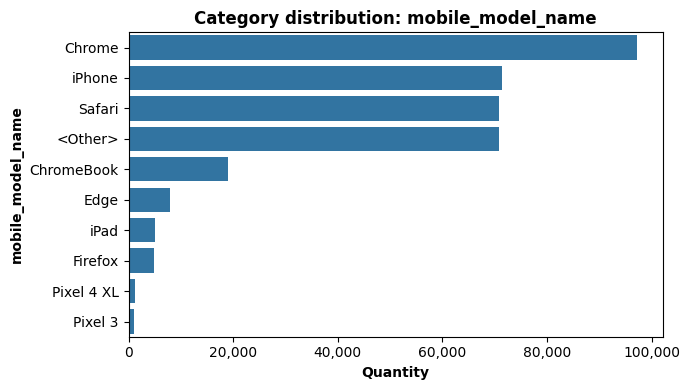

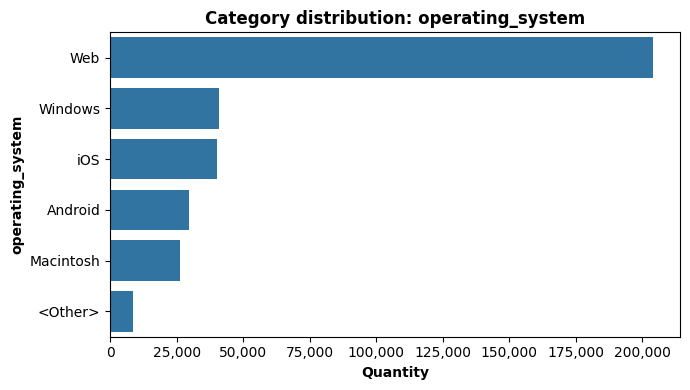

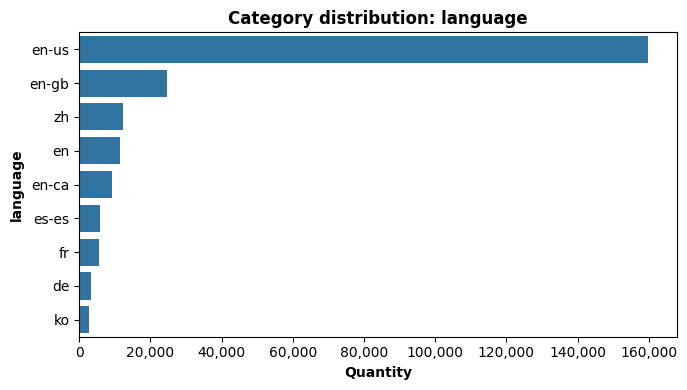

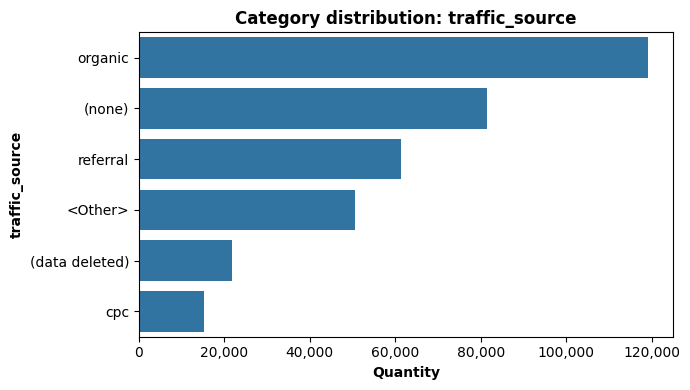

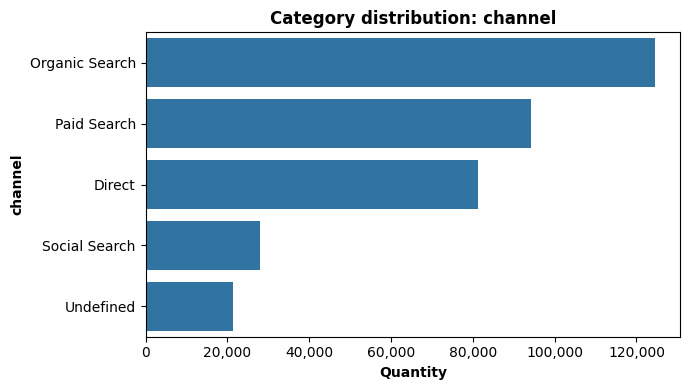

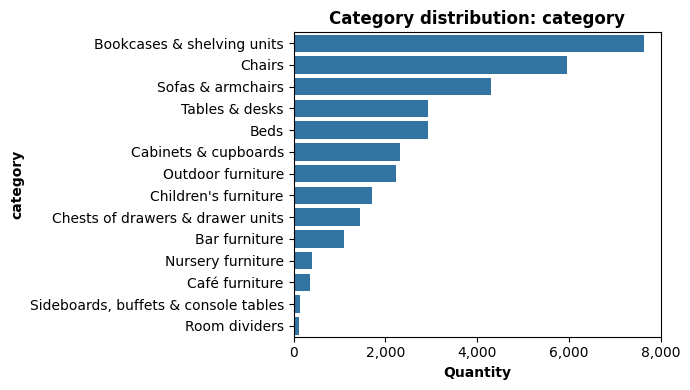

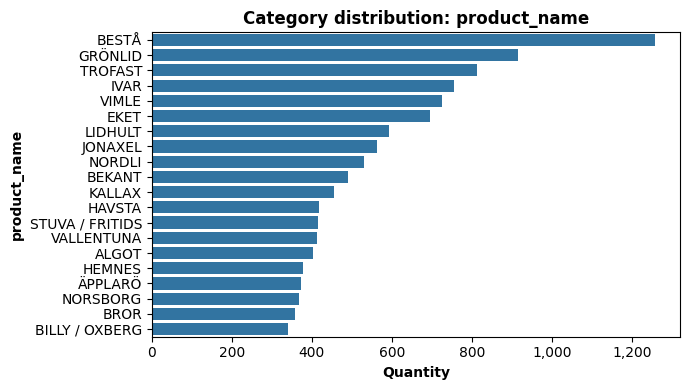

In [103]:
# To limit the graph for columns with a large number of categories to the top 20 and not analyze insignificant categories such as short_description,
# you can ignore such a column and add a check for the number of unique values ​​and use only the top N.

from matplotlib.ticker import StrMethodFormatter

exclude_cols = ['short_description']
top_n = 20  # Maximum number of categories for a graph

for col in df.columns:
    if (df[col].dtype == 'object' or df[col].dtype.name == 'category') and col not in exclude_cols:

        # Select top N categories if needed
        value_counts = df[col].value_counts()
        if len(value_counts) > top_n:
            top_categories = value_counts.iloc[:top_n].index
        else:
            top_categories = value_counts.index

        fig, ax = plt.subplots(figsize=(7, 4))

        sns.countplot(
            data=df,
            y=col,
            order=top_categories
        )

        # Format X-axis ticks as 10,000
        ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

        plt.title(f"Category distribution: {col}", fontweight='bold')
        plt.xlabel("Quantity", fontweight='bold')
        plt.ylabel(col, fontweight='bold')
        plt.tight_layout()
        plt.show()

By the distributions on the graphs, you can track peak days that are a result of:

advertising campaigns or sales, seasonal factors (for example, pre-holiday shopping, which is exactly what is visible on the graph);
user behavioral patterns (for example, Tuesdays are shopping days (08-12-2020 is Tuesday)).
evenness or unevenness of order distribution, which helps to plan the load on the warehouse or logistics and optimize marketing activities.
It also immediately becomes clear which users from which countries are active and purchase the largest number of products, from which category, device, operating system and browser, etc.

## **3.14. Handling missing values**

In [104]:
# A function to calculate the number of missing values ​​and the fraction of missing values
#​ ​in each column of a DataFrame to understand what percentage of the column is missing

def missing_values_report(df, top_n=None):
    missing_count = df.isnull().sum()
    missing_percent = df.isnull().mean() * 100

    report = (
        pd.DataFrame({
            'missing_count': missing_count,
            'missing_percent': missing_percent.round(2)
        })
        .sort_values('missing_percent', ascending=False)
    )

    if top_n is not None:
        report = report.head(top_n)

    return report

In [105]:
# Applying a function to this dataset
missing_values_report(df)

missing_count  missing_percent
is_unsubscribed           321600            92.01
is_verified               321600            92.01
account_id                321600            92.01
short_description         316007            90.41
product_name              316007            90.41
category                  316007            90.41
price                     316007            90.41
language                  114266            32.69
ga_session_id                  0             0.00
order_date                     0             0.00
traffic_source                 0             0.00
operating_system               0             0.00
mobile_model_name              0             0.00
browser                        0             0.00
country                        0             0.00
device                         0             0.00
continent                      0             0.00
channel                        0             0.00

The largest number of missing values ​​(321,600 values) is in the account_id, is_unsubscribed, is_verified columns. This indicates that the dataset includes all sessions and orders, even those made by users who did not register on the site. That is, some users made purchases without registering on the site.

There are also missing values ​​in the short_description, product_name,category, and price columns. The reason is the same as in the other columns, all sessions and orders, even those made by users who did not register on the site, were included in the dataset. There are 114,266 missing values ​​in the language column. This is because this field is optional and some users do not provide information about their language.

# **4. Data analysis and visualization**

## **4.1. Checking the number of missing values ​​and unique values ​​in account_id**

In [106]:
df['account_id'].value_counts(dropna=False)

account_id
<NA>      321600
653077         1
642789         1
650908         1
664410         1
           ...  
660720         1
648518         1
675596         1
646638         1
642865         1
Name: count, Length: 27946, dtype: Int64

So, there are 321600 missing values ​​in the account_id column, indicating that these users have not registered.

## **4.2. Percentage of registered users who confirmed their email address**

In [107]:
# We select only registered users
number_of_uniq_acc = df['account_id'].nunique()
number_is_verfied = df['is_verified'].sum()
unverified_acc = number_of_uniq_acc - number_is_verfied

print (f'Total number of unique accounts: \033[1m{number_of_uniq_acc}\033[0m')
print(f'Total number of verfied: \033[1m{number_is_verfied}\033[0m')
print(f'Total number of unverfied: \033[1m{unverified_acc}\033[0m')

Total number of unique accounts: 27945
Total number of verfied: 20036
Total number of unverfied: 7909


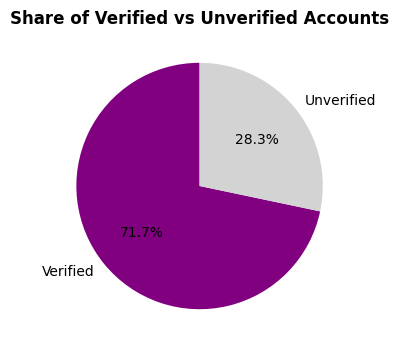

In [108]:
accounts = df.dropna(subset=['account_id']).drop_duplicates(subset=['account_id'])
verified_rate = accounts['is_verified'].mean() * 100
unverified_rate = 100 - verified_rate

values = [verified_rate, unverified_rate]
labels = ['Verified', 'Unverified']
colors = ['purple', 'lightgray']

# Pie chart
plt.figure(figsize=(4,4))
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Share of Verified vs Unverified Accounts', fontweight='bold')
plt.show()

## **4.3. Percentage of registered users unsubscribed from the newsletter**

In [109]:
number_of_uniq_acc = df['account_id'].nunique()
number_of_unsubscribed = df['is_unsubscribed'].sum()
number_of_not_unsubscribed = number_of_uniq_acc - number_of_unsubscribed

print (f'Total number of unique accounts: \033[1m{number_of_uniq_acc}\033[0m')
print(f'Total number of unsubscribed: \033[1m{number_of_unsubscribed}\033[0m')
print(f'Total number of not unsubscribed: \033[1m{number_of_not_unsubscribed}\033[0m')

Total number of unique accounts: 27945
Total number of unsubscribed: 4735
Total number of not unsubscribed: 23210


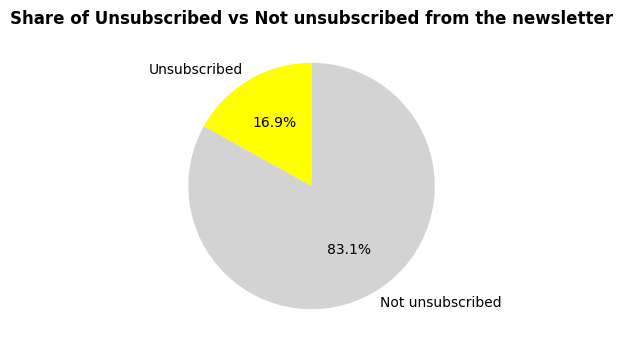

In [110]:
accounts = df.dropna(subset=['account_id']).drop_duplicates(subset=['account_id'])
unsub_rate = accounts['is_unsubscribed'].mean() * 100
not_unsub_rate = 100 - unsub_rate

values = [unsub_rate, not_unsub_rate]
labels = ['Unsubscribed', 'Not unsubscribed']
colors = ['yellow', 'lightgray']

# Pie chart
plt.figure(figsize=(4,4))
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Share of Unsubscribed vs Not unsubscribed from the newsletter', fontweight='bold')
plt.show()

## **4.4. Analysis of differences in purchasing behavior between subscribed and unsubscribed users**

In [111]:
# Group data by subscription status
grouped = df.groupby("is_unsubscribed")["price"]

# Calculating the mean and median
mean_sales = grouped.mean().round(2)
median_sales = grouped.median().round(2)

# Change index names to understandable ones
mean_sales = mean_sales.rename(index={0: "Subscribed Users", 1: "Unsubscribed Users"})
median_sales = median_sales.rename(index={0: "Subscribed Users", 1: "Unsubscribed Users"})

# We combine the results into one DataFrame for clarity
summary = pd.DataFrame({
    "Mean Sales": mean_sales,
    "Median Sales": median_sales
})

print("Mean and Median Sales for Subscribed and Unsubscribed Users:\n")
print(f'\033[1m{summary}\033[0m')

Mean and Median Sales for Subscribed and Unsubscribed Users:

                    Mean Sales  Median Sales
is_unsubscribed                             
Subscribed Users        921.51         395.0
Unsubscribed Users      965.82         450.0


In [112]:
# Filter sessions with purchase
df['has_purchase'] = df['price'].notna()

# Group by users
account_stats = (
    df.dropna(subset=['account_id'])
      .groupby('account_id')
      .agg(
          unsubscribed=('is_unsubscribed', 'max'),
          purchases=('has_purchase', 'sum'),
          total_spent=('price', 'sum')
      )
)

subscribed = account_stats[account_stats['unsubscribed'] == False]
unsubscribed = account_stats[account_stats['unsubscribed'] == True]

def bold(text):
    return f'\033[1m{text}\033[0m'

print("Average number of purchases (subscribed):", bold(round(subscribed['purchases'].mean(), 3)))
print("Average number of purchases (unsubscribed):", bold(round(unsubscribed['purchases'].mean(), 3)))
print()
print("Average check (subscribed):", bold(round(subscribed['total_spent'].mean(), 3)))
print("Average check (unsubscribed):", bold(round(unsubscribed['total_spent'].mean(), 3)))

Average number of purchases (subscribed): 0.101
Average number of purchases (unsubscribed): 0.094

Average check (subscribed): 92.667
Average check (unsubscribed): 91.177


The number of purchases (subscribed) is 0.1 and the number of purchases (unsubscribed) is 0.094.

A value of 0.1 less than 1 indicates that most users do not buy anything. For example, among 10 subscribed users, on average 1 user made a purchase, i.e. 10% of users buy.The value of 0.094 indicates that unsubscribed users buy slightly less often, about 9%.

So, subscribed users are slightly more active in purchases than unsubscribed users, but the difference is small.

## **4.5. Testing the hypothesis “≈90% of sessions without an order”**

In [113]:
# To do this, we will take a reliable indicator of a purchase in a session, for example, price.
# Count how many sessions with and without a purchase.

session_orders = df.groupby('ga_session_id')['price'] \
                        .apply(lambda x: x.notna().any())

share_no_order = (~session_orders).mean()
share_with_order = session_orders.mean()

In [114]:
print('Share for sessions without purchase', bold(round(share_no_order, 2)))
print('Share for sessions with purchase', bold(round(share_with_order, 2)))

Share for sessions without purchase 0.9
Share for sessions with purchase 0.1


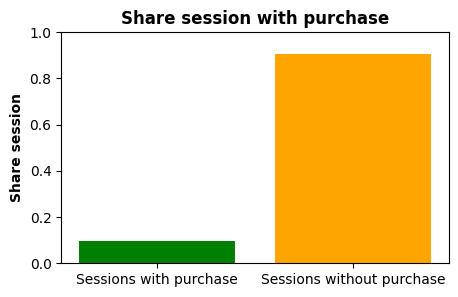

In [115]:
# Counting quantities
counts = [share_with_order, share_no_order]
labels = ['Sessions with purchase', 'Sessions without purchase']

# Creating a bar chart
plt.figure(figsize=(5,3))
plt.bar(labels, counts, color=['green', 'orange'])
plt.ylabel('Share session', fontweight='bold')
plt.title('Share session with purchase', fontweight='bold')
plt.ylim(0,1)  # (0 - 0% of sessions, 1 - 100% of sessions)
plt.show()

In the dataset, each row is a single session on the site. Some columns (account_id, is_unsubscribed, is_verified, category, product_name, price short_description) relate to orders and products. So, if there was no purchase in the session, these columns are empty (NA). Therefore, ≈90% of the gaps in these columns can be considered the norm, not an error. It is not worth filling these gaps with artificial values, as this will distort the data.

It is necessary to clearly separate the dataset into two levels:
1. Sessions (session-level). All sessions, regardless of whether there was a purchase session_id, channel, date.
2. Orders/products (order-level). Only sessions with a purchase product_name, category, price, account_id.

Therefore, share_no_order takes a value of about 0.9, which confirms that there are indeed ≈90% of sessions without an order.

## **4.6. Countries with the largest number of registered users (Top 10)**

In [117]:
registration_users_by_country = df.groupby('country')['account_id'].count().sort_values(ascending=False).head(10).reset_index()
registration_users_by_country.columns = ['Country', 'Registration Usres']

print(bold(registration_users_by_country))

          Country  Registration Usres
0   United States               12384
1           India                2687
2          Canada                2067
3  United Kingdom                 859
4          France                 553
5           Spain                 536
6          Taiwan                 500
7           China                 490
8         Germany                 490
9           Italy                 386


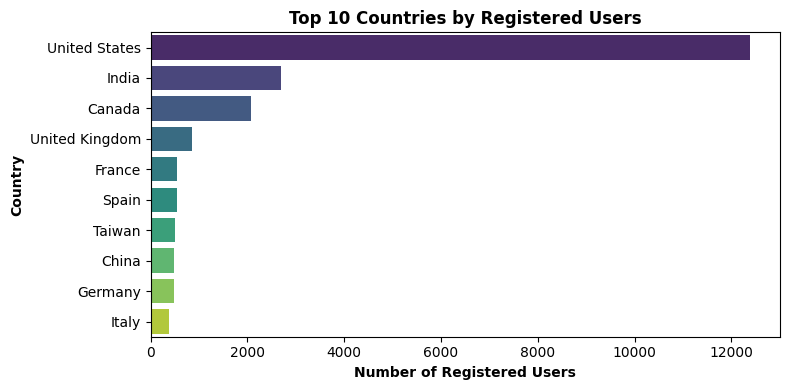

In [118]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
plt.figure(figsize=(8, 4))

sns.barplot(
    data=registration_users_by_country,
    x='Registration Usres',
    y='Country',
    palette='viridis'
)

plt.title('Top 10 Countries by Registered Users', fontweight='bold')
plt.xlabel('Number of Registered Users', fontweight='bold')
plt.ylabel('Country', fontweight='bold')

plt.tight_layout()
plt.show()

The graph immediately shows that the USA has the largest number of registered users, which indicates the key role of this country in the overall audience. India and Canada also show high figures, while the remaining countries have significantly fewer users.

Therefore, we can conclude that the user base is unevenly distributed, and this is important to consider when planning marketing strategies.

## **4.7. The time period considered in the dataset**

In [119]:
# Determining the time period considered in the dataset
print(f"Period: from \033[1m{df['order_date'].min()}\033[0m to \033[1m{df['order_date'].max()}\033[0m")

Period: from 2020-11-01 00:00:00 to 2021-01-31 00:00:00


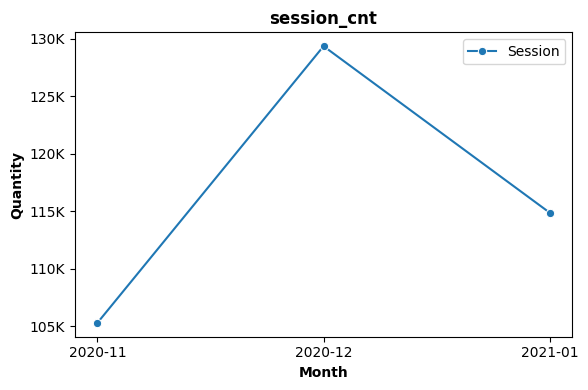

In [120]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Creating a month column
df['month'] = df['order_date'].dt.to_period('M').astype(str)

# Number of sessions by month
sessions_per_month = (
    df.groupby('month')['ga_session_id']
    .nunique()
    .reset_index(name='sessions_cnt')
)

# Formatter for Y-axis (10K format)
def thousands_formatter(x, pos):
    return f'{int(x/1000)}K' if x >= 1000 else str(int(x))

plt.figure(figsize=(6,4))

sns.lineplot(
    data=sessions_per_month,
    x='month',
    y='sessions_cnt',
    marker='o',
    label='Session'
)

plt.title('session_cnt', fontweight='bold')
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Quantity', fontweight='bold')

plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.xticks(rotation=0)
plt.tight_layout()
plt.legend()
plt.show()

## **4.8. Calculating the number of unique sessions per day**

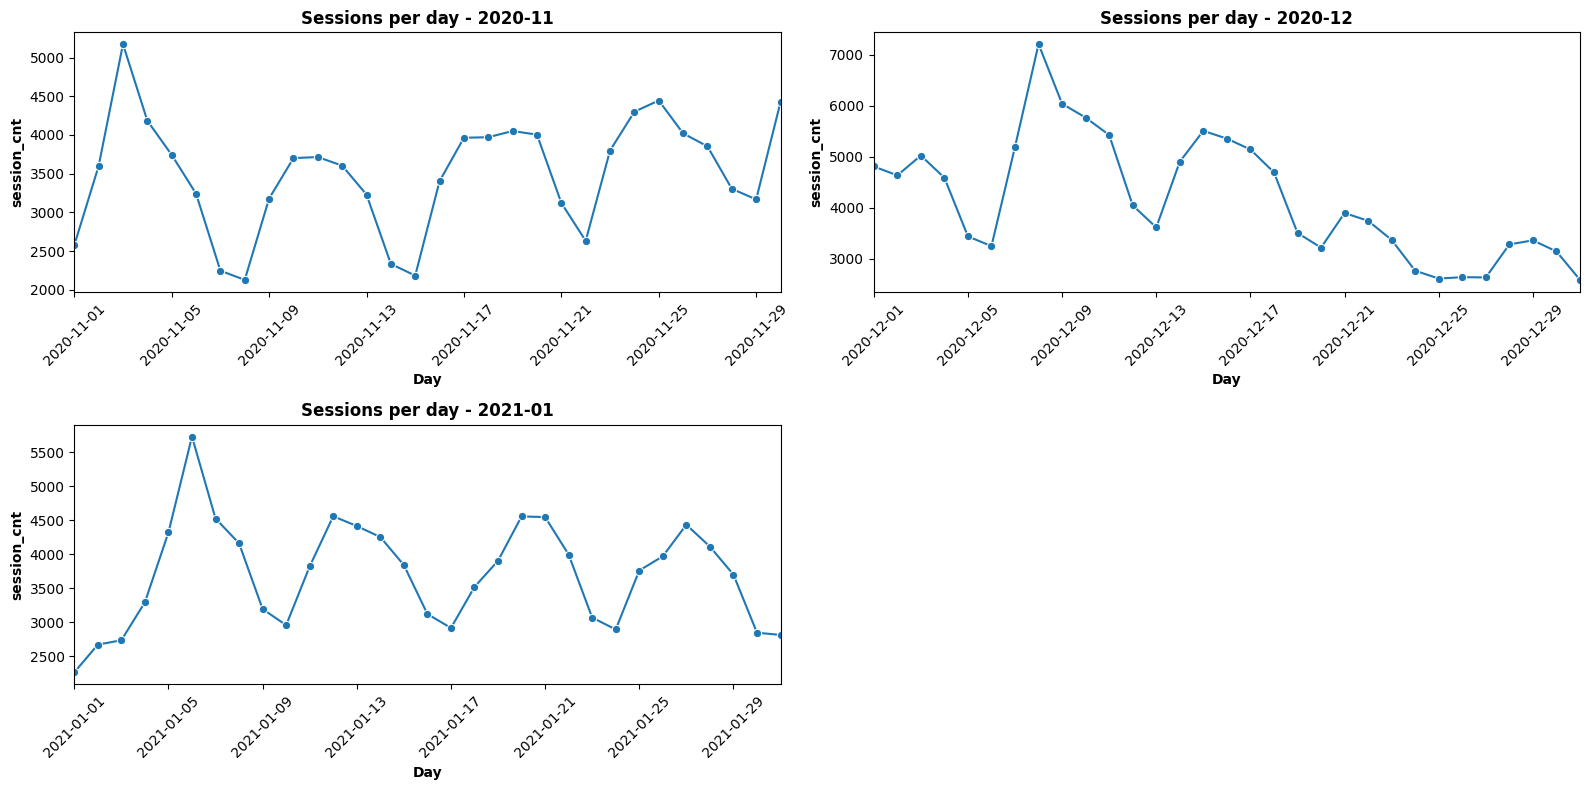

In [121]:
# Create a column with a date (without time)
df['date'] = pd.to_datetime(df['order_date']).dt.normalize()

# Counting unique sessions by day
sessions_per_day = (
    df.groupby('date')['ga_session_id']
    .nunique()
    .reset_index(name='sessions_cnt')
)

# Months to plot
months_to_plot = ['2020-11', '2020-12', '2021-01']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
axes = axes.flatten()

for i, month in enumerate(months_to_plot):
    period = pd.Period(month, freq='M')

    # Filter data strictly within the month
    monthly_data = sessions_per_day[
        (sessions_per_day['date'] >= period.start_time) &
        (sessions_per_day['date'] <= period.end_time)
    ]

    sns.lineplot(
        data=monthly_data,
        x='date',
        y='sessions_cnt',
        marker='o',
        ax=axes[i]
    )

    axes[i].set_title(f'Sessions per day - {month}', fontweight='bold')
    axes[i].set_xlabel('Day', fontweight='bold')
    axes[i].set_ylabel('session_cnt', fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45)

    # Fix X-axis limits
    axes[i].set_xlim(
        monthly_data['date'].min(),
        monthly_data['date'].max()
    )

# Remove empty subplot
if len(months_to_plot) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

Conclusion based on graph analysis.

December 2020 sees the highest activity, with sessions reaching 7,000, significantly higher than November and January. The ranges in November 2020 and January 2021 are similar, around 2,500–5,500 sessions per day.

All graphs display daily fluctuations, which may indicate changes in user behavior (e.g., weekdays vs. weekends). November 2020 shows a steady increase in the middle of the month, followed by a decline. December 2020 has sharp peaks, possibly related to pre-holiday activity or marketing campaigns. The January 2021 graph shows a post-holiday decline in activity, with a more even distribution without sharp spikes.

So, the peak in December could be related to New Year’s promotions, holidays, or the end of the quarter. January sees stability after the holidays, which is typical for many services. In November, the graph shows a transition period, possibly in preparation for the December campaigns.

## **4.9. Calculating the number of unique sessions with order and without order**

In [122]:
# All unique sessions
all_sessions = df['ga_session_id'].nunique()

# Sessions with order
session_cnt_with_order = df[df['price'] > 0]['ga_session_id'].nunique()

# Sessions without order
session_cnt_without_order = all_sessions - session_cnt_with_order

print(f'All unique Sessions: \033[1m{all_sessions}\033[0m')
print(f'Sessions with order: \033[1m{session_cnt_with_order}\033[0m')
print(f'Sessions without order: \033[1m{session_cnt_without_order}\033[0m')

All unique Sessions: 349545
Sessions with order: 33538
Sessions without order: 316007


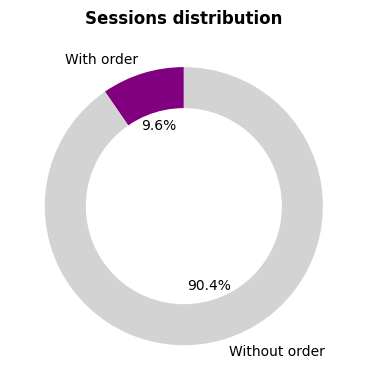

In [123]:
# Counting quantities
labels = ['With order', 'Without order']
values = [session_cnt_with_order, session_cnt_without_order]
colors = ['purple', 'lightgray']

plt.figure(figsize=(4,4))
wedges, _, _ = plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Hole in the center (donat)
centre_circle = plt.Circle((0,0), 0.70, color='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Sessions distribution', fontweight='bold')
plt.tight_layout()
plt.show()

## **4.10. Conversion Rate (CR) Calculation by Session**

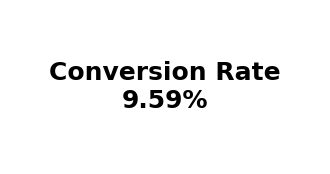

In [124]:
# Conversion Rate (CR) Calculation
conversion_rate = round(session_cnt_with_order / all_sessions * 100, 2)

plt.figure(figsize=(4,2))
plt.text(0.5, 0.5, f'Conversion Rate\n{conversion_rate}%',
         ha='center', va='center', fontsize=18, fontweight='bold')
plt.axis('off')
plt.show()
# print(f'Conversion Rate: \033[1m{conversion_rate}%\033[0m')

## **4.11. Processing Data by Continent and Country**

The largest sales on continents (top 3) and in which countries (top 5) does our company have the largest number of orders.

In [125]:
# Filtering only purchases with a real price
df_sales = df[df['price'] > 0]

# Data Aggregation

# Top 3 continents by sales
top_continents_sales = (
    df_sales.groupby("continent")["price"]
            .sum()
            .sort_values(ascending=False)
            .head(3)
)

# Session orders by continent
top_continents_orders = (
    df_sales.groupby("continent")["ga_session_id"]
            .nunique()
            .sort_values(ascending=False)
            .head(3)
)

# Top 5 country by sales
top_countries_sales = (
    df_sales.groupby("country")["price"]
            .sum()
            .sort_values(ascending=False)
            .head(5)
)

# Session orders by country
top_countries_orders = (
    df_sales.groupby("country")["ga_session_id"]
            .nunique()
            .sort_values(ascending=False)
            .head(5)
)

# Combining two Series (top_continents_sales, top_continents_orders) into a table
top_continents_table = pd.concat(
    [top_continents_sales, top_continents_orders],
    axis=1
)

# Combining two Series (top_countries_sales, top_countries_orders) into a table
top_country_table = pd.concat(
    [top_countries_sales, top_countries_orders],
    axis=1
)

# Renaming columns for clarity
top_country_table.columns = ['Total Sales', 'Session Orders']

print(f'\033[1m{top_country_table}\033[0m')

                Total Sales  Session Orders
country                                    
United States    13943553.9           14673
India             2809762.0            3029
Canada            2437921.0            2560
United Kingdom     938317.9            1029
France             710692.8             678


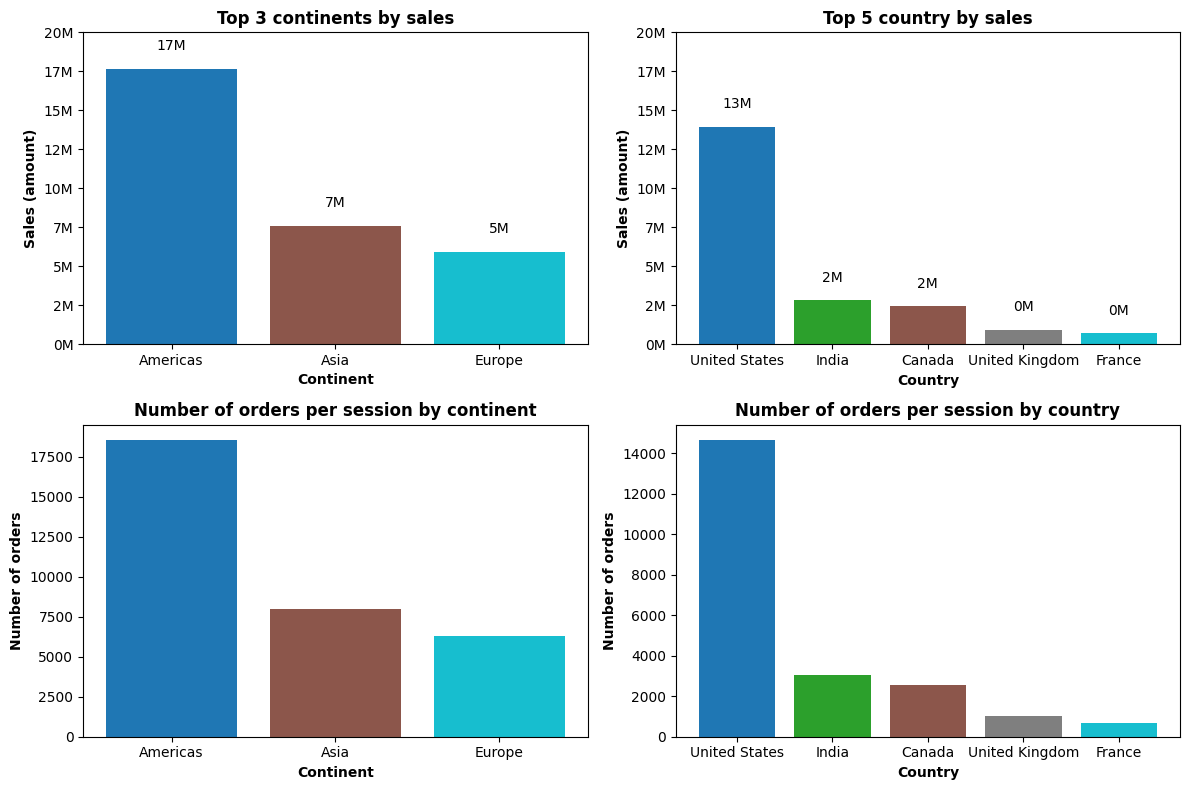

In [126]:
# Colors
def get_colors(n):
    return plt.cm.tab10(np.linspace(0, 1, n))

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Top 3 continents by sales
bars = axes[0, 0].bar(top_continents_sales.index, top_continents_sales.values,
                      color=get_colors(len(top_continents_sales)))

axes[0, 0].set_title("Top 3 continents by sales", fontweight='bold')
axes[0, 0].set_xlabel("Continent", fontweight='bold')
axes[0, 0].set_ylabel("Sales (amount)", fontweight='bold')
axes[0, 0].tick_params(axis='x', rotation=0)
axes[0, 0].set_ylim(0, 2.0e7)

# Formatting axes Y
yticks = axes[0, 0].get_yticks()
axes[0, 0].set_yticks(yticks)
axes[0, 0].set_yticklabels([f'{int(y/1e6)}M' for y in yticks])

# Adding values ​​to columns
for bar in bars:
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2, height + 1e6,
                    f'{int(height/1e6)}M', ha='center', va='bottom', fontsize=10)

# Top 5 country by sales
bars = axes[0,1].bar(top_countries_sales.index, top_countries_sales.values,
               color=get_colors(len(top_countries_sales)))

axes[0, 1].set_title("Top 5 country by sales", fontweight='bold')
axes[0, 1].set_xlabel("Country", fontweight='bold')
axes[0, 1].set_ylabel("Sales (amount)", fontweight='bold')
axes[0, 1].tick_params(axis='x', rotation=0)
axes[0, 1].set_ylim(0, 2.0e7)

yticks = axes[0, 1].get_yticks()
axes[0, 1].set_yticks(yticks)
axes[0, 1].set_yticklabels([f'{int(y/1e6)}M' for y in yticks])

# Adding values ​​to columns
for bar in bars:
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2, height + 1e6,
                    f'{int(height/1e6)}M', ha='center', va='bottom', fontsize=10)

# 3. Session quantity of orders by continent
axes[1, 0].bar(top_continents_orders.index, top_continents_orders.values,
               color=get_colors(len(top_continents_orders)))
axes[1, 0].set_title("Number of orders per session by continent", fontweight='bold')
axes[1, 0].set_xlabel("Continent", fontweight='bold')
axes[1, 0].set_ylabel("Number of orders", fontweight='bold')
axes[1, 0].tick_params(axis='x', rotation=0)


# 4. Session quantity of orders by country
axes[1, 1].bar(top_countries_orders.index, top_countries_orders.values,
               color=get_colors(len(top_countries_orders)))
axes[1, 1].set_title("Number of orders per session by country", fontweight='bold')
axes[1, 1].set_xlabel("Country", fontweight='bold')
axes[1, 1].set_ylabel("Number of orders", fontweight='bold')
axes[1, 1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

The US market is key in terms of sales and orders. Asia and Europe have potential for growth but need to optimize processes. However, there are zero sales with orders in some countries - a signal for additional analysis.

## **4.12. Scatter Plot by Continents and Countries**

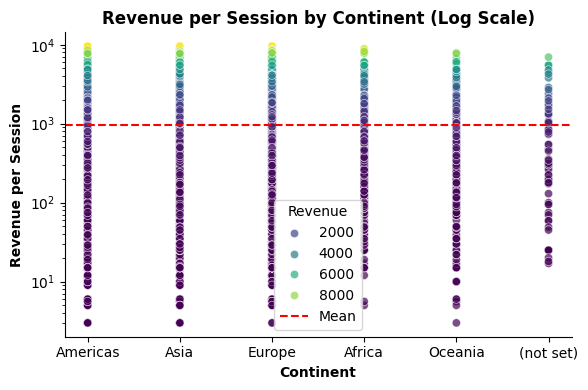

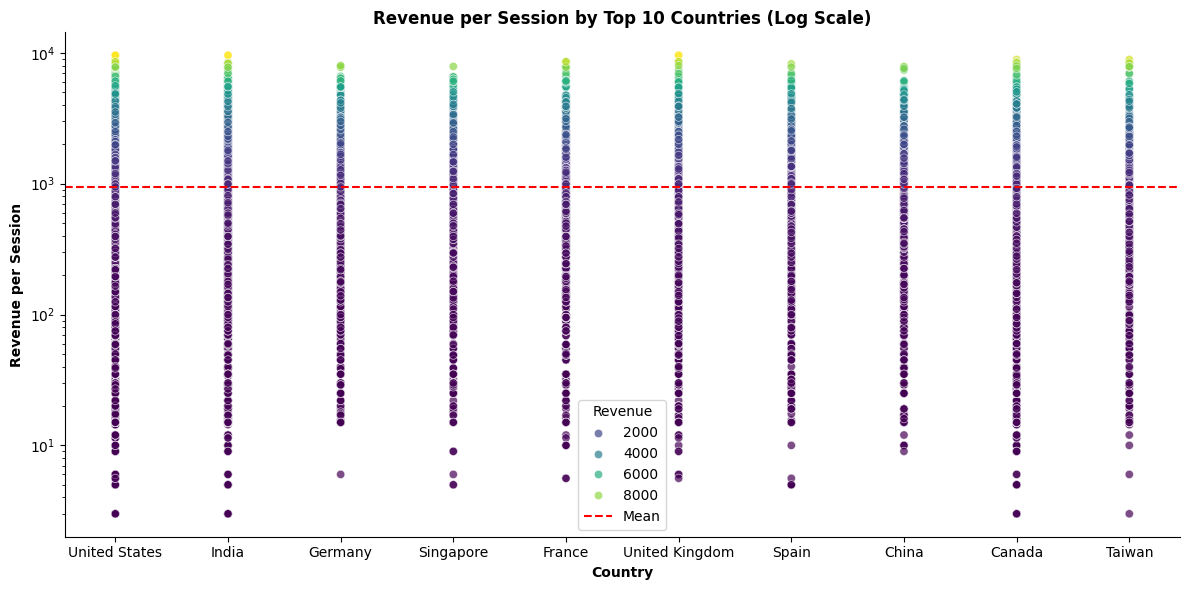

In [127]:
# Filtering purchases with real price
df_sales = df[df['price'] > 0].copy()

# Calculation Revenue per Session
session_revenue = df_sales.groupby('ga_session_id')['price'].sum().reset_index()
session_revenue.rename(columns={'price': 'revenue_per_session'}, inplace=True)

# Add a continent and country for each session
# We take the first line of the session as representative
session_info = df_sales.groupby('ga_session_id').first().reset_index()
df_sessions = session_revenue.merge(session_info[['ga_session_id','continent','country']], on='ga_session_id')

# Scatter plot by continents
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=df_sessions,
    x="continent",
    y="revenue_per_session",
    hue="revenue_per_session",
    palette="viridis",
    alpha=0.7
)
plt.yscale('log')
plt.axhline(df_sessions['revenue_per_session'].mean(), color='red', linestyle='--', label='Mean')
plt.title("Revenue per Session by Continent (Log Scale)", fontweight='bold')
plt.xlabel("Continent", fontweight='bold')
plt.ylabel("Revenue per Session", fontweight='bold')
plt.legend(title="Revenue")
sns.despine()
plt.tight_layout()
plt.show()

# Scatter plot by top 10 countries
top_countries = (
    df_sales.groupby("country")["price"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)
df_top_countries = df_sessions[df_sessions['country'].isin(top_countries)]

plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df_top_countries,
    x="country",
    y="revenue_per_session",
    hue="revenue_per_session",
    palette="viridis",
    alpha=0.7
)
plt.yscale('log')
plt.axhline(df_top_countries['revenue_per_session'].mean(), color='red', linestyle='--', label='Mean')
plt.title("Revenue per Session by Top 10 Countries (Log Scale)", fontweight='bold')
plt.xlabel("Country", fontweight='bold')
plt.ylabel("Revenue per Session", fontweight='bold')
plt.xticks(rotation=0)
plt.legend(title="Revenue")
sns.despine()
plt.tight_layout()
plt.show()

The US has the highest conversion rates at all price levels, confirming strong purchasing power. Other countries such as India, France, Spain have lower conversion rates, regardless of price. In some countries (e.g. China, Germany) conversions are seen to increase with price, while in others they remain stable or even decrease.

## **4.13. Conversion Rate by Continent and by Country**

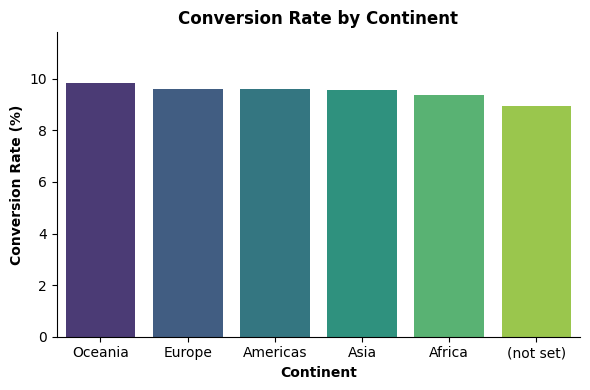

In [128]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Filtering purchases with real price
df_sales = df[df['price'] > 0].copy()

# Conversion Rate by continent
# Quantity of unique sessions by continent
sessions_per_continent = df.groupby('continent')['ga_session_id'].nunique()

# Quantity purchases by continent
purchases_per_continent = df_sales.groupby('continent')['ga_session_id'].count()

# Calculating conversion rate
conversion_rate_continent = (purchases_per_continent / sessions_per_continent * 100).reset_index()
conversion_rate_continent.columns = ['continent', 'conversion_rate']

# Visualization
conversion_rate_continent_sorted = conversion_rate_continent.sort_values(by='conversion_rate', ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(
    data=conversion_rate_continent_sorted,
    x='continent',
    y='conversion_rate',
    palette='viridis'
)
plt.title("Conversion Rate by Continent", fontweight='bold')
plt.xlabel("Continent", fontweight='bold')
plt.ylabel("Conversion Rate (%)", fontweight='bold')
plt.ylim(0, conversion_rate_continent_sorted['conversion_rate'].max()*1.2)
sns.despine()
plt.tight_layout()
plt.show()

Oceania shows the highest conversion rate among continents. Europe, America and Asia have consistently high rates (~9.5%), which indicates effective traffic management. For Africa and undefined regions, it is worth checking the quality of traffic, content relevance and pricing policy.

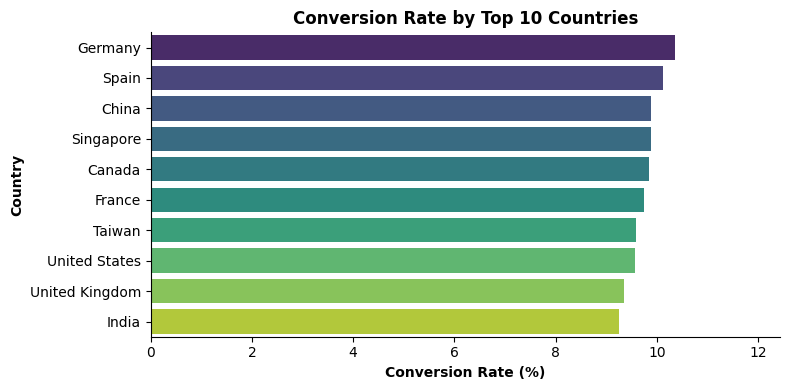

In [129]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Top 10 countries by sales
top_countries = df_sales.groupby('country')['price'].sum().sort_values(ascending=False).head(10).index

# Quantity of sessions and purchases by country
sessions_per_country = df.groupby('country')['ga_session_id'].nunique().loc[top_countries]
purchases_per_country = df_sales[df_sales['price'] > 0].groupby('country')['ga_session_id'].count().loc[top_countries]

# Conversion rate
conversion_rate_country = (purchases_per_country / sessions_per_country * 100).reset_index()
conversion_rate_country.columns = ['country', 'conversion_rate']

# Sort descending conversion_rate
conversion_rate_country_sorted = conversion_rate_country.sort_values(by='conversion_rate', ascending=False)

# Horizontal barplot
plt.figure(figsize=(8,4))
sns.barplot(
    data=conversion_rate_country_sorted,
    y='country',
    x='conversion_rate',
    palette='viridis'
)
plt.title("Conversion Rate by Top 10 Countries", fontweight='bold')
plt.xlabel("Conversion Rate (%)", fontweight='bold')
plt.ylabel("Country", fontweight='bold')
plt.xlim(0, conversion_rate_country_sorted['conversion_rate'].max()*1.2)
sns.despine()
plt.tight_layout()
plt.show()

The leaders in conversion are Germany, Spain and China, which show high rates (~11.5% and ~10.5%), which may be the result of a successful pricing policy or active purchasing behavior. The USA is unexpectedly below average, although it often leads in total sales, but its conversion is lower than in many European countries. This may indicate a higher number of sessions with lower efficiency. Data for individual countries (China, Singapore, Taiwan, India) show the heterogeneity of consumer behavior, which requires a flexible approach to marketing. India has the lowest rate, which may indicate low purchasing power or the need to adapt marketing strategies for this market.

## **4.14. Average Order Value by Continents and Countries**

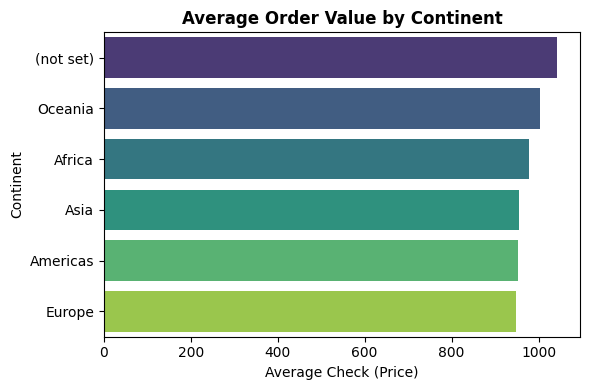

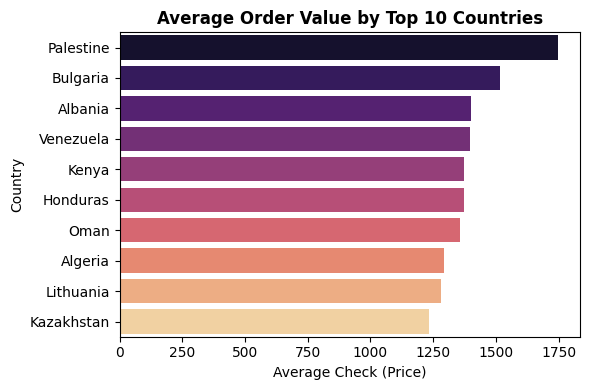

In [130]:
# Filter only purchases
df_sales = df[df['price'] > 0].copy()

# Average check by continent
avg_check_continent = df_sales.groupby("continent")["price"].mean().sort_values(ascending=False)

# Average check by top 20 countries by average check
avg_check_country = df_sales.groupby("country")["price"].mean().sort_values(ascending=False).head(10)

# Horizontal bar chart by continent
plt.figure(figsize=(6,4))
sns.barplot(x=avg_check_continent.values, y=avg_check_continent.index, palette="viridis")
plt.title("Average Order Value by Continent", fontweight='bold')
plt.xlabel("Average Check (Price)")
plt.ylabel("Continent")
plt.tight_layout()
plt.show()

# Horizontal bar chart by Top 10 countries
plt.figure(figsize=(6,4))
sns.barplot(x=avg_check_country.values, y=avg_check_country.index, palette="magma")
plt.title("Average Order Value by Top 10 Countries", fontweight='bold')
plt.xlabel("Average Check (Price)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

## **4.15. Top 10 product categories by total sales**

In [131]:
# View column names
df.columns

Index(['order_date', 'ga_session_id', 'continent', 'country', 'device',
       'browser', 'mobile_model_name', 'operating_system', 'language',
       'traffic_source', 'channel', 'account_id', 'is_verified',
       'is_unsubscribed', 'category', 'product_name', 'price',
       'short_description', 'has_purchase', 'month', 'date'],
      dtype='object')

In [132]:
# Filter only purchases
df_sales = df[df['price'] > 0].copy()

# Creating a pivot table (pivot_table)
sales_product_category = (
    pd.pivot_table(
        df_sales,
        values='price',
        index='category',
        aggfunc='sum')
    .sort_values(by='price', ascending=False)
    .head(10)
)
print(f'Top 10 product categories by total sales:\n\033[1m{sales_product_category}\033[0m')

Top 10 product categories by total sales:
                                      price
category                                   
Sofas & armchairs                 8388254.5
Chairs                            6147748.8
Beds                              4919725.0
Bookcases & shelving units        3640818.1
Cabinets & cupboards              2336499.5
Outdoor furniture                 2142222.2
Tables & desks                    1790307.5
Chests of drawers & drawer units   906562.5
Bar furniture                      735503.0
Children's furniture               467697.0


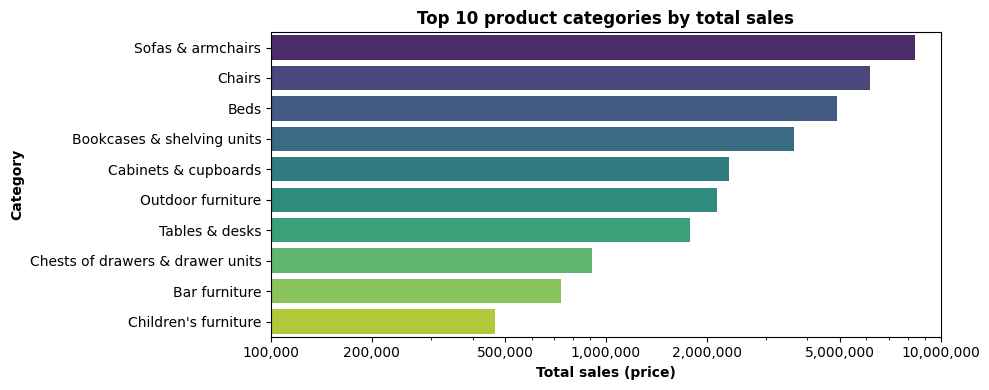

In [133]:
# Visualization horizontal bar chart by continent
plt.figure(figsize=(10,4))

sns.barplot(
    x=sales_product_category['price'].values,
    y=sales_product_category.index,
    palette="viridis"
)

plt.xscale('log')

ticks = [1e5, 2e5, 5e5, 1e6, 2e6, 5e6, 1e7]
plt.xticks(ticks, [f"{int(t):,}" for t in ticks])

plt.title('Top 10 product categories by total sales', fontweight='bold')
plt.xlabel('Total sales (price)', fontweight='bold')
plt.ylabel('Category', fontweight='bold')
plt.tight_layout()
plt.show()

## **4.16. Top 10 best-selling product categories in the country**

In [134]:
# We learn about the country with the highest sales
top_category_by_country = (
    df.dropna(subset=['price'])
    .groupby('country')['price']
    .sum()
    .sort_values(ascending=False)
)

top_country = top_category_by_country.index[0]
top_country_sales = top_category_by_country.iloc[0]

print(f'Country with highest sales: \033[1m{top_country}\033[0m')
print(f'Total sales: \033[1m{top_country_sales:.0f}\033[0m')

Country with highest sales: United States
Total sales: 13943554


In [135]:
# Let's learn about the top 10 categories in this country
top_country_categories = pd.pivot_table(
    df[df['country'] == top_country],
    values='price',
    index='category',
    aggfunc='sum'
    ).sort_values(by='price', ascending=False).head(10)

# General top 10 categories
global_categories = pd.pivot_table(
    df,
    values='price',
    index='category',
    aggfunc='sum'
).sort_values(by='price', ascending=False).head(10)


# Combining two Series (top_countries_sales, top_countries_orders) into a table
top_country_categories_table = pd.concat(
    [top_country_categories, global_categories],
    axis=1
)

# Renaming columns for clarity
top_country_categories_table.columns = ['Top country categories', 'Global categories']

print(f'Country with highest sales: \033[1m{top_country}\033[0m')
print(f'\033[1m{top_country_categories_table}\033[0m')

Country with highest sales: United States
                                  Top country categories  Global categories
category                                                                   
Sofas & armchairs                              3707144.5          8388254.5
Chairs                                         2619773.8          6147748.8
Beds                                           2213058.0          4919725.0
Bookcases & shelving units                     1567606.9          3640818.1
Cabinets & cupboards                            994545.5          2336499.5
Outdoor furniture                               929245.2          2142222.2
Tables & desks                                  777865.0          1790307.5
Chests of drawers & drawer units                382388.0           906562.5
Bar furniture                                   330805.0           735503.0
Children's furniture                            207575.0           467697.0


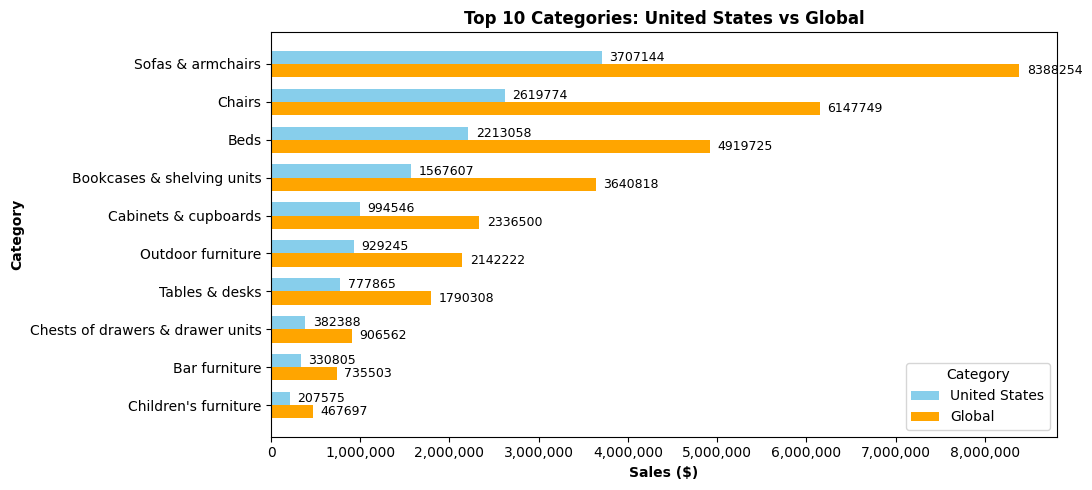

In [136]:
from matplotlib.ticker import StrMethodFormatter

# Visualization
categories = top_country_categories_table.index
top_country_values = top_country_categories_table['Top country categories']
global_values = top_country_categories_table['Global categories']

# Positions for categories on the Y-axis
y = np.arange(len(categories))
height = 0.35

fig, ax = plt.subplots(figsize=(11,5))

# Horizontal bars
bars1 = ax.barh(y - height/2, top_country_values, height, label='United States', color='skyblue')
bars2 = ax.barh(y + height/2, global_values, height, label='Global', color='orange')

# Offset for labels
offset = max(max(top_country_values), max(global_values)) * 0.01

# Values on bars
for bar in bars1:
    value = int(round(bar.get_width()))
    ax.text(
        bar.get_width() + offset,
        bar.get_y() + bar.get_height()/2,
        str(value),            # no formatting, plain integer
        va='center',
        fontsize=9
    )

for bar in bars2:
    value = int(round(bar.get_width()))
    ax.text(
        bar.get_width() + offset,
        bar.get_y() + bar.get_height()/2,
        str(value),            # no formatting, plain integer
        va='center',
        fontsize=9
    )

ax.set_ylabel('Category', fontweight='bold')
ax.set_xlabel('Sales ($)', fontweight='bold')
ax.set_title('Top 10 Categories: United States vs Global', fontweight='bold')
ax.set_yticks(y)
ax.set_yticklabels(categories)
ax.invert_yaxis()
ax.legend(title='Category')

# X-axis
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()

The country with the largest sales is the United States, accounting for approximately 40–45% of global sales, indicating the dominance of the American market. In both cases, the top 10 categories overlap, but with smaller sales volumes. For example, in the United States, upholstered furniture (sofas and armchairs) accounts for the largest sales, but with a smaller share than on a global scale.

## **4.17. Sales by device type and model (% of total sales)**

In [137]:
# Check all values ​​by column - mobile_model_name
df['mobile_model_name'].value_counts().reset_index()

mobile_model_name  count
0            Chrome  97254
1            iPhone  71326
2            Safari  70891
3           <Other>  70839
4        ChromeBook  19084
5              Edge   7907
6              iPad   5090
7           Firefox   4874
8        Pixel 4 XL   1246
9           Pixel 3   1034

The mobile_model_name field contains various device type models used to create sessions and information about the browsers used with the devices. In order to perform a correct calculation, device types must be considered separately from browsers.

Also among the entries is the value "Other", which I recommend to search together with browsers, since its value is quite close to browsers than to device models, and this can distort statistics.

In [138]:
# Choosing device models
browsers = ['Chrome', 'Safari', 'Firefox', 'Edge', 'Opera', '<Other>']
df_model_device = df[~df['mobile_model_name'].isin(browsers)]

# View device model device
total_sales_device_type = (
    df_model_device.groupby(['device', 'mobile_model_name'])['price']
    .sum().
    sort_values(ascending=False)
    .reset_index()
)

total_sales_device_type.rename(
    columns={'mobile_model_name' : 'type_model', 'price' : 'total_sales'},
    inplace=True)

# Total price by sales
total_sum = total_sales_device_type['total_sales'].sum()

total_sales_device_type['%_total_sales'] = round((
    total_sales_device_type['total_sales'] / total_sum * 100), 2
)

print(f'\033[1m{total_sales_device_type}\033[0m')

    device  type_model  total_sales  %_total_sales
0   mobile      iPhone    6420776.3          71.92
1  desktop  ChromeBook    1830458.7          20.50
2   tablet        iPad     448854.2           5.03
3   mobile  Pixel 4 XL     118287.7           1.32
4   mobile     Pixel 3     109148.2           1.22


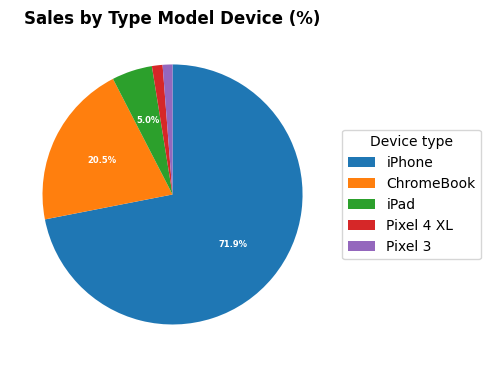

In [139]:
# Make sure that percent is numeric
total_sales_device_type['%_total_sales'] = pd.to_numeric(total_sales_device_type['%_total_sales'])

# Sort in descending order
plot_df = total_sales_device_type.sort_values('%_total_sales', ascending=False)

values = plot_df['%_total_sales']
labels = plot_df['type_model']

fig, ax = plt.subplots(figsize=(5, 5))

def autopct_func(pct):
    # We show the percentage only if the sector >= 5%
    return f"{pct:.1f}%" if pct >= 5 else ""

wedges, texts, autotexts = ax.pie(
    values,
    labels=None,
    autopct=autopct_func,
    startangle=90,
    counterclock=False
)

# Signature style
for t in autotexts:
    t.set_color("white")
    t.set_fontsize(6)
    t.set_fontweight("bold")

ax.legend(
    wedges,
    labels,
    title="Device type",
    loc="center left",
    bbox_to_anchor=(1,0,0.5,1)
)

plt.title("Sales by Type Model Device (%)", fontweight="bold")
plt.tight_layout()
plt.show()

Mobile devices are a key leader in sales, especially the iPhone.

Desktops have their niche, but are significantly inferior to mobile.

Tablets and other models are not particularly successful in terms of sales.

In [140]:
# Choosing type browser
browsers = ['Chrome', 'Safari', 'Firefox', 'Edge', 'Opera', '<Other>']
df_browser = df[df['mobile_model_name'].isin(browsers)]

# View device types
total_sales_browser_type = (
    df_browser.groupby(['device', 'mobile_model_name'])['ga_session_id']
    .count()
    .sort_values(ascending=False)
    .reset_index()
)

total_sales_browser_type.rename(
    columns={'mobile_model_name' : 'type_browser', 'ga_session_id' : 'session_cnt'},
    inplace=True)

# Total price by sales
total_sum = total_sales_browser_type['session_cnt'].sum()

total_sales_browser_type['%_total_session_cnt'] = round((
    total_sales_browser_type['session_cnt'] / total_sum * 100), 2
)

print(f'\033[1m{total_sales_browser_type}\033[0m')

    device type_browser  session_cnt  %_total_session_cnt
0  desktop       Chrome        97254                38.63
1  desktop       Safari        70871                28.15
2   mobile      <Other>        63635                25.28
3  desktop         Edge         7901                 3.14
4  desktop      Firefox         4874                 1.94
5  desktop      <Other>         4445                 1.77
6   tablet      <Other>         2759                  1.1
7   mobile       Safari           20                 0.01
8   mobile         Edge            6                  0.0


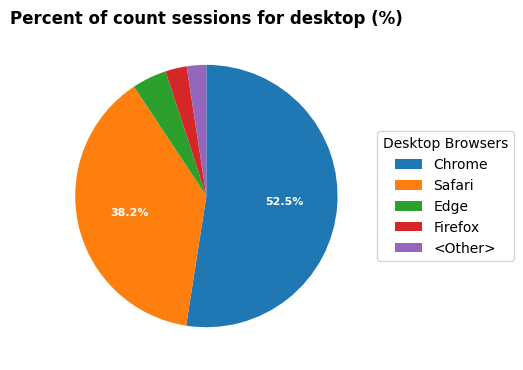

In [141]:
# Select device
device = 'desktop'  # can be 'mobile' or 'tablet'
plot_df = total_sales_browser_type[total_sales_browser_type['device'] == device].sort_values('%_total_session_cnt', ascending=False)

values = plot_df['%_total_session_cnt']
labels = plot_df['type_browser']

fig, ax = plt.subplots(figsize=(5,5))

# We show the percentage only if the sector >= 5%
def autopct_func(pct):
    return f"{pct:.1f}%" if pct >= 5 else ""

wedges, texts, autotexts = ax.pie(
    values,
    labels=None,
    autopct=autopct_func,
    startangle=90,
    counterclock=False
)

# Signature style
for t in autotexts:
    t.set_color("white")
    t.set_fontsize(8)
    t.set_fontweight("bold")

ax.legend(
    wedges,
    labels,
    title=f"{device.capitalize()} Browsers",
    loc="center left",
    bbox_to_anchor=(1,0,0.5,1)
)

plt.title(f'Percent of count sessions for {device} (%)', fontweight="bold")
plt.tight_layout()
plt.show()

According to the results obtained, it is clear that most users log in from desktops via Chrome and Safari.

Mobile traffic is quite active, but browsers are not identified - since built-in or less popular browsers were used to log in.

There is also low activity of users who log in using tablets and mobile Safari/Edge, it is likely that the site is not optimized for these platforms or their audience is minimal.

## **4.18. Analyze sales by traffic sources (% of total sales)**

In [142]:
# Let's analyze what are the sources of traffic
df['channel'].value_counts().reset_index()

channel   count
0  Organic Search  124425
1     Paid Search   94341
2          Direct   81382
3   Social Search   27914
4       Undefined   21483

The field has 5 categories of traffic sources by channel, including one source - Undefined.

Calculation of channels according to total sales volume.

In [143]:
# Filter only purchases
df_sales = df[df['price'] > 0].copy()

# Creating a pivot table (pivot_table)
sales_by_channel = (
    pd.pivot_table(
        df_sales,
        values='price',
        index='channel',
        aggfunc='sum')
    .sort_values(by='price', ascending=False)
    )

sales_by_channel.rename(columns={'channel': 'channel', 'price' : 'total_sales'}, inplace=True)

# Total sales
total_sales_by_channel = sales_by_channel['total_sales'].sum()

# Percent of total sales
percent_total_sales = round((sales_by_channel['total_sales'] / total_sales_by_channel * 100), 2)

# Add new column
sales_by_channel['%_total_sales'] = percent_total_sales

print(f'Channel by total sales:\n\033[1m{sales_by_channel}\033[0m')

Channel by total sales:
                total_sales  %_total_sales
channel                                   
Organic Search   11433151.6          35.76
Paid Search       8511049.4          26.62
Direct            7494923.4          23.44
Social Search     2532105.7           7.92
Undefined         2000501.0           6.26


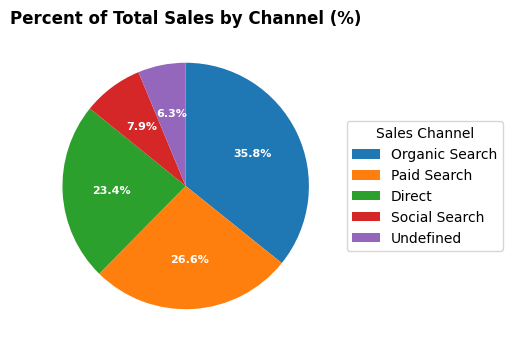

In [144]:
plot_df = sales_by_channel.sort_values('%_total_sales', ascending=False)

values = plot_df['%_total_sales']
labels = plot_df.index  # The channel with the pivot table is in the index

fig, ax = plt.subplots(figsize=(5,5))

# We only show percentages if >=5%
def autopct_func(pct):
    return f"{pct:.1f}%" if pct >= 5 else ""

wedges, texts, autotexts = ax.pie(
    values,
    labels=None,  # Captions through legend
    autopct=autopct_func,
    startangle=90,
    counterclock=False
)

# Signature style
for t in autotexts:
    t.set_color("white")
    t.set_fontsize(8)
    t.set_fontweight("bold")

ax.legend(
    wedges,
    labels,
    title="Sales Channel",
    loc="center left",
    bbox_to_anchor=(1,0,0.5,1)
)

plt.title('Percent of Total Sales by Channel (%)', fontweight='bold')
plt.tight_layout()
plt.show()

Channel calculation according to total number of sessions.

In [145]:
# Creating a pivot table
session_by_channel = (
    pd.pivot_table(
        df,
        values='ga_session_id',
        index='channel',
        aggfunc='count')
    .sort_values(by='ga_session_id', ascending=False)
    )

session_by_channel.rename(columns={'channel': 'channel', 'ga_session_id' : 'session_cnt'}, inplace=True)

# Total sales
total_session_by_channel = session_by_channel['session_cnt'].sum()

# Percent of total sales
percent_total_session = round((session_by_channel['session_cnt'] / total_session_by_channel * 100), 2)

# Add new column
session_by_channel['%_session_cnt'] = percent_total_session

print(f'Channel vs Session:\n\033[1m{session_by_channel}\033[0m')

Channel vs Session:
                session_cnt  %_session_cnt
channel                                   
Organic Search       124425           35.6
Paid Search           94341          26.99
Direct                81382          23.28
Social Search         27914           7.99
Undefined             21483           6.15


Channel calculation according to total number of accounts.

In [146]:
# Creating a pivot table
account_by_channel = (
    pd.pivot_table(
        df,
        values='account_id',
        index='channel',
        aggfunc='count')
    .sort_values(by='account_id', ascending=False)
    )

account_by_channel.rename(columns={'channel': 'channel', 'account_id' : 'account_cnt'}, inplace=True)

# Total sales
total_account_by_channel = account_by_channel['account_cnt'].sum()

# Percent of total sales
percent_total_account = round((account_by_channel['account_cnt'] / total_account_by_channel * 100), 2)

# Add new column
account_by_channel['%_account_cnt'] = percent_total_session

print(f'Channel vs Account:\n\033[1m{account_by_channel}\033[0m')

Channel vs Account:
                account_cnt  %_account_cnt
channel                                   
Organic Search        10035           35.6
Paid Search            7467          26.99
Direct                 6514          23.28
Social Search          2212           7.99
Undefined              1717           6.15


Visualization of traffic sources according to total sales, number of sessions, and number of accounts created.

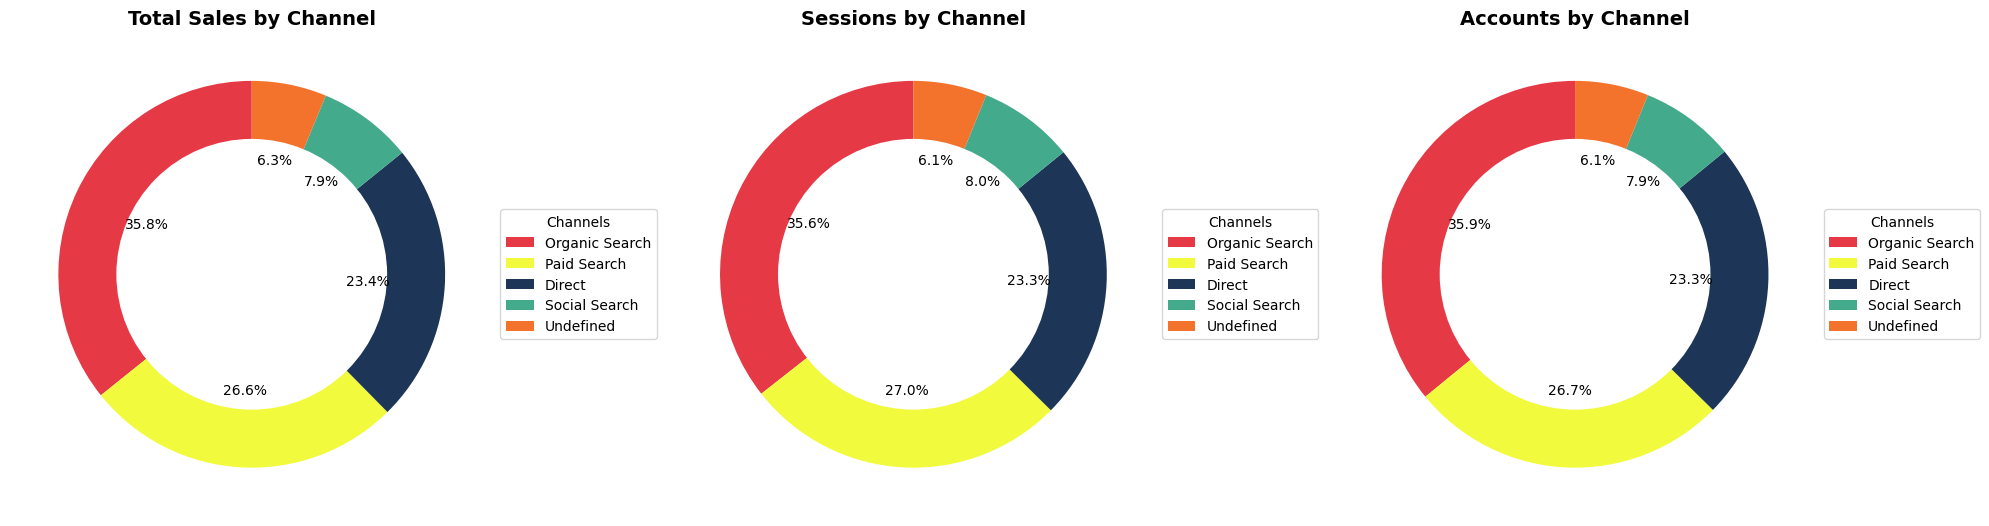

In [147]:
# Code for visualization of traffic sources
sales = sales_by_channel['total_sales']
sessions = session_by_channel['session_cnt']
accounts = account_by_channel['account_cnt']

# Colors
colors = ['#E63946',  # red
          '#F1FA3C',  # bright yellow
          '#1D3557',  # dark blue
          '#43AA8B',  # light blue
          '#F3722C',  # orange
          '#9D4EDD']  # purple

# Plot for donats
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

datasets = [
    ("Total Sales by Channel", sales),
    ("Sessions by Channel", sessions),
    ("Accounts by Channel", accounts)
]

for ax, (title, data) in zip(axes, datasets):
    wedges, texts, autotexts = ax.pie(
        data,
        labels=None,  # Hiding standard signatures
        autopct='%1.1f%%',
        startangle=90,
        colors=colors[:len(data)]
    )

    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    ax.add_artist(centre_circle)

    ax.set_title(title, fontsize=14, fontweight='bold')

    # Add legend
    ax.legend(wedges, data.index, title="Channels", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

According to the results in the graph, it is clear that Organic Search and Paid Search are the main channels for creating sessions, sales and accounts. All other channels have relatively stable traffic.

Therefore, Paid Search should be considered as the main channel for advertising investments.

Social Search is good for reach, but needs optimization for conversions. Organic Search is stable and reliable, worth supporting through SEO. Direct is a potentially loyal audience that can be more actively attracted.

## **4.19. Session analysis by language**

Let's consider which languages ​​are used to create sessions.

In [148]:
df['language'].unique()

array(['zh', 'en-us', 'es-es', None, 'en-gb', 'en-ca', 'fr', 'ko', 'en',
       'de'], dtype=object)

Let's replace the languages ​​used to create sessions with their full names. Let's find the number of sessions that were created in different languages.

In [149]:
mapping = {
    'zh': 'Chinese',
    'en-us': 'English (USA)',
    'es-es': 'Spanish',
    'en-gb': 'English (UK)',
    'en-ca': 'English (Canada)',
    'fr': 'French',
    'ko': 'Korean',
    'en': 'English',
    'de': 'German'
}

In [150]:
# Number of sessions by language
session_cnt_by_language = (
    df.groupby('language')['ga_session_id']
.count()
.sort_values(ascending=False)
.reset_index()
)
session_cnt_by_language['language'] = session_cnt_by_language['language'].replace(mapping)
session_cnt_by_language.columns = ['language', 'number_of_session']

print(f'Number of sessions by language:\n\033[1m{session_cnt_by_language}\033[0m')

Number of sessions by language:
           language  number_of_session
0     English (USA)             159893
1      English (UK)              24774
2           Chinese              12222
3           English              11518
4  English (Canada)               9332
5           Spanish               5760
6            French               5652
7            German               3387
8            Korean               2741


In [151]:
# Revenue by language
revenue_by_language = (
    df.groupby('language')['price']
.sum()
.sort_values(ascending=False)
.reset_index()
)
revenue_by_language['language'] = revenue_by_language['language'].replace(mapping)
revenue_by_language.columns = ['language', 'revenue']

print(f'Revenue by language:\n\033[1m{revenue_by_language}\033[0m')

Revenue by language:
           language     revenue
0     English (USA)  14715870.2
1      English (UK)   2181314.3
2           Chinese   1053040.6
3           English    995536.9
4  English (Canada)    778852.6
5            French    579024.5
6           Spanish    514573.1
7            Korean    298528.8
8            German    257088.7


In [152]:
print(session_cnt_by_language.columns)
print(revenue_by_language.columns)

Index(['language', 'number_of_session'], dtype='object')
Index(['language', 'revenue'], dtype='object')


In [153]:
# Combining all 'en-...' into a single value 'English'
mapping_english = {
    'zh': 'Chinese',
    'en-us': 'English (USA)',
    'es-es': 'Spanish',
    'en-gb': 'English (UK)',
    'en-ca': 'English (Canada)',
    'fr': 'French',
    'ko': 'Korean',
    'en': 'English',
    'de': 'German'
}

clean_mapping = {
    k: ("English" if k.startswith("en") else v)
    for k, v in mapping_english.items()
}

In [154]:
print(clean_mapping)

{'zh': 'Chinese', 'en-us': 'English', 'es-es': 'Spanish', 'en-gb': 'English', 'en-ca': 'English', 'fr': 'French', 'ko': 'Korean', 'en': 'English', 'de': 'German'}


In [155]:
df['language'] = df['language'].replace(clean_mapping)

# Number of sessions by language
session_cnt_by_language_group_english = (
    df.groupby('language')['ga_session_id']
      .count()
      .sort_values(ascending=False)
      .reset_index()
)

session_cnt_by_language_group_english.columns = ['language', 'number_of_session']

print(f'Number of sessions by language:\n\033[1m{session_cnt_by_language_group_english}\033[0m')

Number of sessions by language:
  language  number_of_session
0  English             205517
1  Chinese              12222
2  Spanish               5760
3   French               5652
4   German               3387
5   Korean               2741


In [156]:
df['language'] = df['language'].replace(clean_mapping)

revenue_by_language_group_english = (
    df.groupby('language')['price']
      .sum()
      .sort_values(ascending=False)
      .reset_index()
)

revenue_by_language_group_english.columns = ['language', 'revenue']

print(f'Revenue by language:\n\033[1m{revenue_by_language_group_english}\033[0m')

Revenue by language:
  language     revenue
0  English  18671574.0
1  Chinese   1053040.6
2   French    579024.5
3  Spanish    514573.1
4   Korean    298528.8
5   German    257088.7


The English language significantly outperforms the others in both sessions and revenue.

Let’s calculate the sessions and revenue for the top 5 countries and analyze the relationship in the scatterplot.

In [157]:
# Calculating the number of sessions for the top 5 countries
session_by_country = (
    df.groupby('country')['ga_session_id']
      .nunique()
      .sort_values(ascending=False)
      .reset_index()
)

session_by_country.columns = ['country', 'session_cnt']

session_top5_countries = session_by_country.head(5)

print(f'Number of Session by top 5 country:\n\033[1m{session_top5_countries}\033[0m')

Number of Session by top 5 country:
          country  session_cnt
0   United States       153470
1           India        32763
2          Canada        25994
3  United Kingdom        11003
4          France         6958


In [158]:
# Calculating revenue for the top 5 countries
revenue_by_country = (
    df.groupby('country')['price']
      .sum()
      .sort_values(ascending=False)
      .reset_index()
)

revenue_by_country.columns = ['country', 'revenue']

top5_countries = revenue_by_country.head(5)

print(f'Revenue by top 5 country:\n\033[1m{top5_countries}\033[0m')

Revenue by top 5 country:
          country     revenue
0   United States  13943553.9
1           India   2809762.0
2          Canada   2437921.0
3  United Kingdom    938317.9
4          France    710692.8


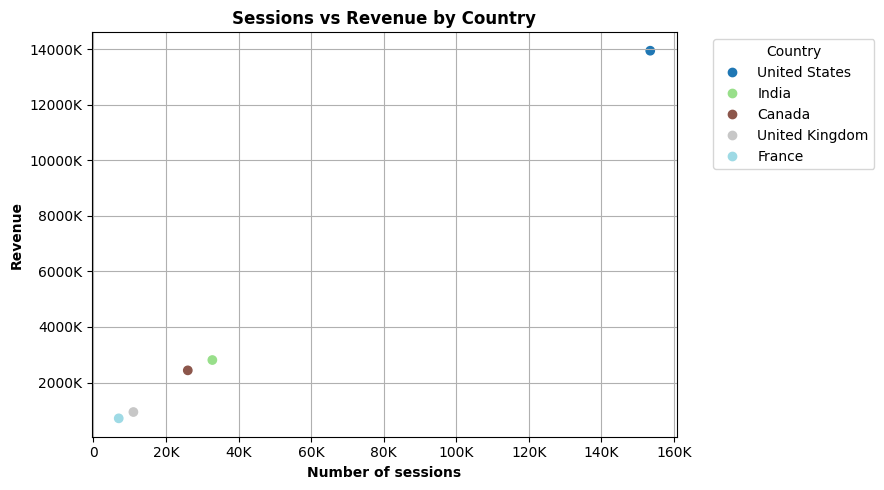

In [159]:
from matplotlib.lines import Line2D
from matplotlib.ticker import FuncFormatter
import matplotlib.cm as cm

# Combine data
scatter_df = pd.merge(
    session_top5_countries,
    top5_countries,
    on='country',
    how='inner'
)
scatter_df.columns = ['country', 'number_of_session', 'revenue']

plt.figure(figsize=(9, 5))

# Colors per country
languages = scatter_df['country'].unique()
colors = cm.tab20(np.linspace(0, 1, len(languages)))
color_map = dict(zip(languages, colors))

plt.scatter(
    scatter_df['number_of_session'],
    scatter_df['revenue'],
    c=scatter_df['country'].map(color_map)
)

legend_elements = [
    Line2D([0], [0], marker='o', color=color_map[lang], linestyle='', label=lang)
    for lang in languages
]
plt.legend(handles=legend_elements, title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# Format 10K
def k_formatter(x, pos):
    if x >= 1000:
        return f"{x/1000:.0f}K"
    return f"{x:.0f}"

plt.gca().xaxis.set_major_formatter(FuncFormatter(k_formatter))
plt.gca().yaxis.set_major_formatter(FuncFormatter(k_formatter))

plt.xlabel('Number of sessions', fontweight='bold')
plt.ylabel('Revenue', fontweight='bold')
plt.title('Sessions vs Revenue by Country', fontweight='bold')
plt.grid(True)
plt.tight_layout()

plt.show()

The data in the chart shows significant disparities across countries, with the United States significantly outperforming other markets in both session volume and revenue. This makes the United States a key source of traffic and revenue, and significantly dominant over other regions. Countries like India, Canada, the United Kingdom, and France all show moderate values ​​and form a cluster of countries with lower activity and revenue.

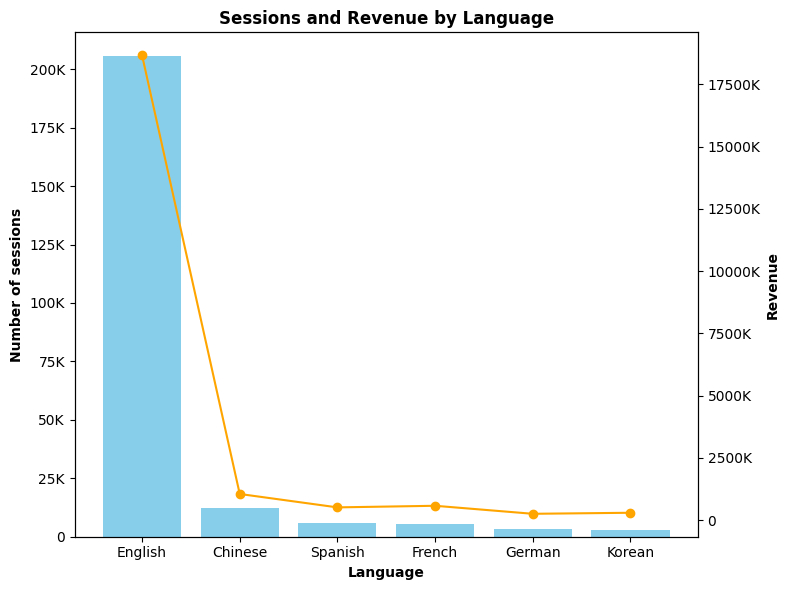

In [160]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import pandas as pd

df['language'] = df['language'].replace(clean_mapping)

session_cnt_by_language = (
    df.groupby('language')['ga_session_id']
      .count()
      .reset_index()
)

revenue_by_language = (
    df.groupby('language')['price']
      .sum()
      .reset_index()
)

session_cnt_by_language.columns = session_cnt_by_language.columns.str.strip().str.lower()
revenue_by_language.columns = revenue_by_language.columns.str.strip().str.lower()

sessions_col = [c for c in session_cnt_by_language.columns if c != 'language'][0]
revenue_col = [c for c in revenue_by_language.columns if c != 'language'][0]

combo_df = pd.merge(
    session_cnt_by_language,
    revenue_by_language,
    on='language',
    how='inner'
).rename(columns={
    'language': 'language',
    sessions_col: 'sessions',
    revenue_col: 'revenue'
})

combo_df = combo_df.sort_values(by='sessions', ascending=False)

fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.bar(combo_df['language'], combo_df['sessions'], color='skyblue')
ax1.set_xlabel('Language', fontweight='bold')
ax1.set_ylabel('Number of sessions', fontweight='bold')
ax1.tick_params(axis='x', rotation=0)

ax2 = ax1.twinx()
ax2.plot(combo_df['language'], combo_df['revenue'], marker='o', color='orange')
ax2.set_ylabel('Revenue', fontweight='bold')

# Format 10K
def k_formatter(x, _):
    if x >= 1000:
        return f"{x/1000:.0f}K"
    return f"{x:.0f}"

ax1.yaxis.set_major_formatter(FuncFormatter(k_formatter))
ax2.yaxis.set_major_formatter(FuncFormatter(k_formatter))

plt.title('Sessions and Revenue by Language', fontweight='bold')
plt.tight_layout()
plt.show()

English (US) is the dominant language in both session volume and revenue, significantly outperforming other language segments. This demonstrates high levels of user engagement and commercial effectiveness in this language environment. Other English variants (UK, Canada) also show stable performance, while non-English-speaking audiences have lower activity and revenue.

# **5. Sales dynamics analysis**

## **5.1. Total Sales by Date**

In [161]:
# Make sure the date is in the correct format
df['order_date'] = pd.to_datetime(df['order_date'])

# Aggregation of sales by date
total_sales_by_date = df.groupby('order_date')['price'].sum().reset_index()

print(f'Channel vs Account:\n\033[1m{total_sales_by_date}\033[0m')

Channel vs Account:
   order_date     price
0  2020-11-01  244292.5
1  2020-11-02  355506.8
2  2020-11-03  498979.6
3  2020-11-04  339187.1
4  2020-11-05  391276.6
..        ...       ...
87 2021-01-27  286340.7
88 2021-01-28       0.0
89 2021-01-29       0.0
90 2021-01-30       0.0
91 2021-01-31       0.0

[92 rows x 2 columns]


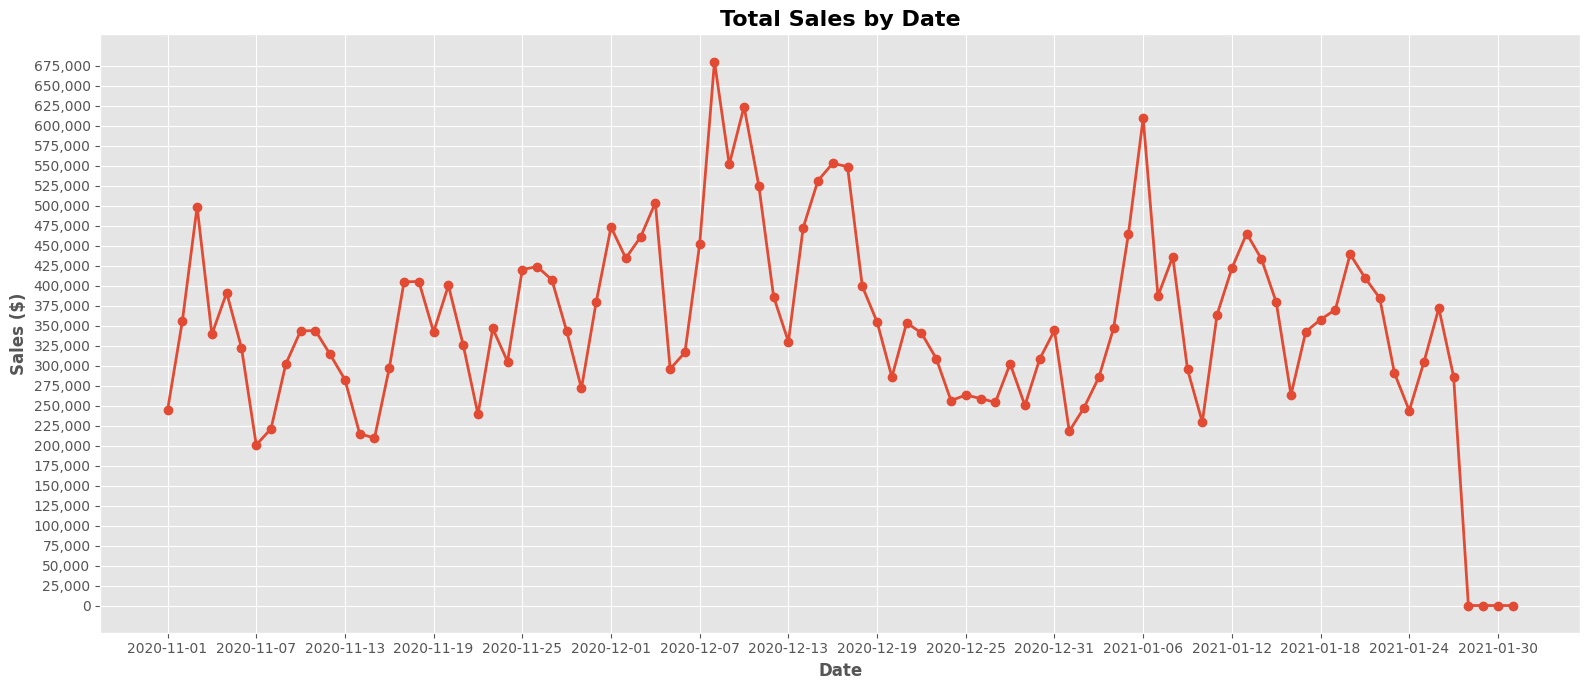

In [162]:
# Visualization Total Sales by Date
plt.style.use('ggplot')

plt.figure(figsize=(16, 7))

plt.plot(
    total_sales_by_date['order_date'],
    total_sales_by_date['price'],
    marker="o",
    linewidth=2
)

# X-axis formatting
plt.xticks(
    total_sales_by_date['order_date'][::6],
    rotation=0
)

# Y-axis formatting
from matplotlib.ticker import StrMethodFormatter

y_min = total_sales_by_date['price'].min()
y_max = total_sales_by_date['price'].max()
y_ticks = np.arange(y_min, y_max + 1, 25000)
plt.yticks(y_ticks)

# Format Y-axis as 10,000
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.title('Total Sales by Date', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Sales ($)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

The Total Sales by Date graph shows typical fluctuations in revenue from November 2020 to the end of January 2021. During this time, several clear peaks and intermediate declines are observed.

The most active growth in sales occurs in November-December. This is a typical seasonal period associated with large sales and holidays (Black Friday, Christmas season, preparation for the New Year). After the end of the holiday period, in January, revenues naturally decrease, which is a typical behavior for online sales.

Thus, the graph clearly shows the seasonality of sales: growth at the end of the year and decline at the beginning of the next. This pattern corresponds to typical consumer behavior.

## **5.2. Sales dynamics in America, Asia and Europe**

In [163]:
# Choosing continents
continents = ['Americas', 'Asia', 'Europe']
df_continents = df[df['continent'].isin(continents)]

# View ccontinents
total_sales_by_continent = (
    df_continents.groupby('continent')['price']
    .sum().
    sort_values(ascending=False)
    .reset_index()
)

total_sales_by_continent.rename(
    columns={'price' : 'total_sales'},
    inplace=True)

# Total price by sales
total_sum = total_sales_by_continent['total_sales'].sum()

total_sales_by_continent['%_total_sales'] = round((
    total_sales_by_continent['total_sales'] / total_sum * 100), 2
)

print(f'\033[1m{total_sales_by_continent}\033[0m')

  continent  total_sales  %_total_sales
0  Americas   17665280.0          56.62
1      Asia    7601298.3          24.36
2    Europe    5934624.2          19.02


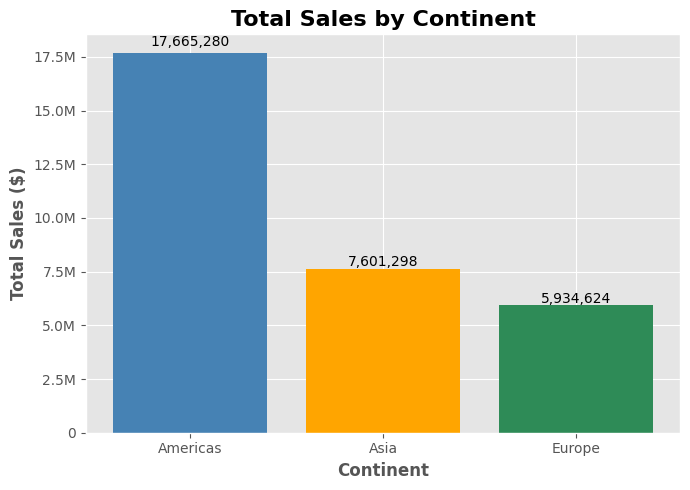

In [164]:
from matplotlib.ticker import FuncFormatter

continents = total_sales_by_continent['continent']
sales = total_sales_by_continent['total_sales']

colors = ['steelblue', 'orange', 'seagreen']

plt.figure(figsize=(7, 5))

plt.bar(continents, sales, color=colors)

plt.title("Total Sales by Continent", fontsize=16, fontweight='bold')
plt.xlabel("Continent", fontsize=12, fontweight='bold')
plt.ylabel("Total Sales ($)", fontsize=12, fontweight='bold')

# Show values ​​above columns (keep comma formatting)
for i, v in enumerate(sales):
    plt.text(i, v + (v * 0.02), f'{v:,.0f}', ha='center', fontsize=10)

# Format 10K / 2.5M / 3B
def human_format(x, _):
    if x >= 1_000_000_000:
        return f'{x/1_000_000_000:.1f}B'
    elif x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x/1_000:.0f}K'
    return f'{x:.0f}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(human_format))

plt.tight_layout()
plt.show()

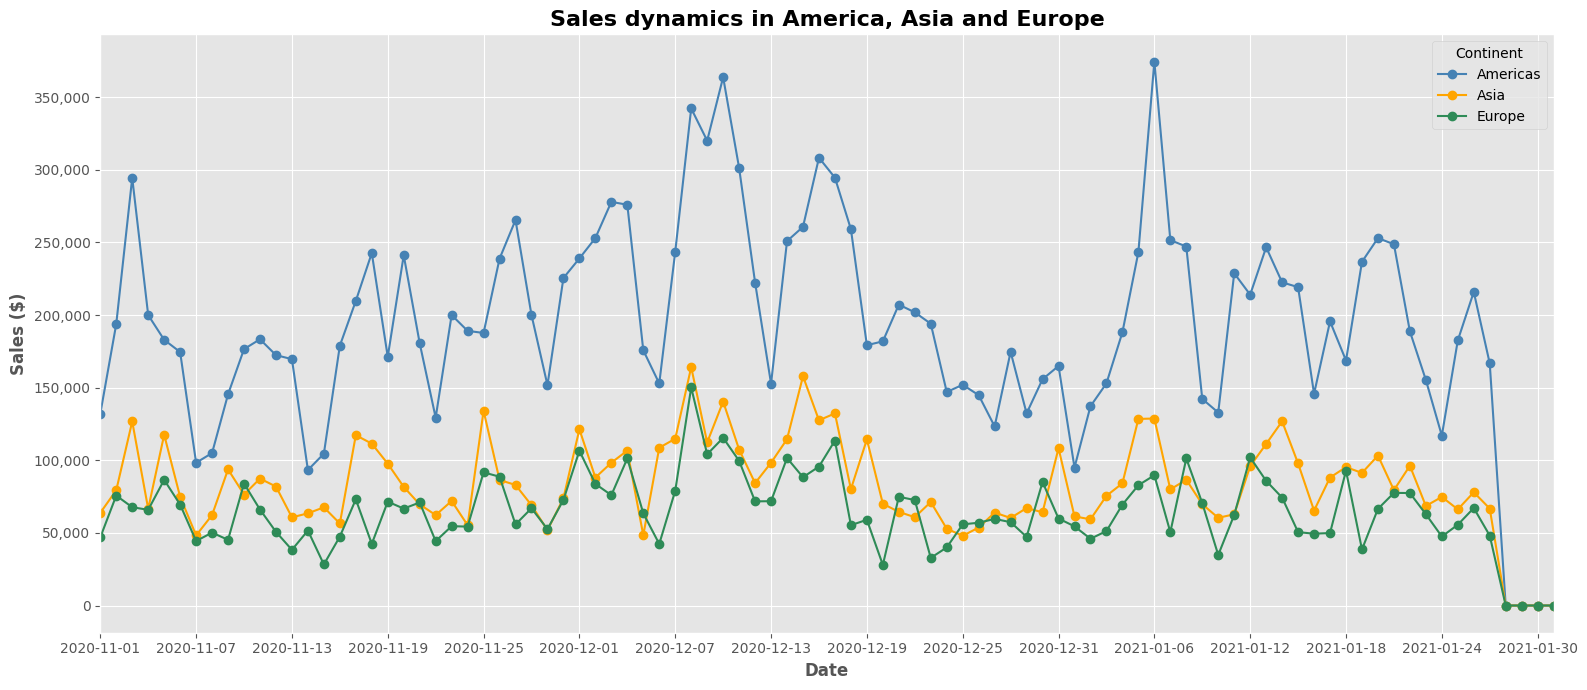

In [165]:
# Visualization Sales dynamics in America, Asia and Europe

sales_over_time = (
    df_continents.groupby(['order_date', 'continent'])['price']
    .sum()
    .reset_index()
)

# Setting the style
plt.style.use('ggplot')
plt.figure(figsize=(16,7))

colors = {'Americas': 'steelblue', 'Asia': 'orange', 'Europe': 'seagreen'}

for continent in continents:
    df_plot = sales_over_time[sales_over_time['continent'] == continent]
    plt.plot(
        df_plot['order_date'],
        df_plot['price'],
        marker='o',
        label=continent,
        color=colors[continent]
    )

# X-axis ticks every 6 days
x_ticks = pd.date_range(
    start=df_continents['order_date'].min(),
    end=df_continents['order_date'].max(),
    freq='6D'
)
plt.xticks(x_ticks, rotation=0)

# Limit X-axis exactly to data range
plt.xlim(
    df_continents['order_date'].min(),
    df_continents['order_date'].max()
)

# Y-axis formatting: 10,000
from matplotlib.ticker import StrMethodFormatter
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.title('Sales dynamics in America, Asia and Europe', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Sales ($)', fontsize=12, fontweight='bold')
plt.legend(title='Continent')
plt.tight_layout()
plt.show()

The graph above illustrates regional differences in sales dynamics, with America being the most active market and Europe the least stable.

The Americas region has the highest sales volumes and variability, with several peaks, which is a sign of active market fluctuations. Asia has stable, moderate sales without sharp changes, which may indicate stable demand. Europe shows the lowest figures, and at the end of the period - a sharp drop to zero, which requires additional analysis.

## **5.3. Sales Dynamics by Traffic Channels**

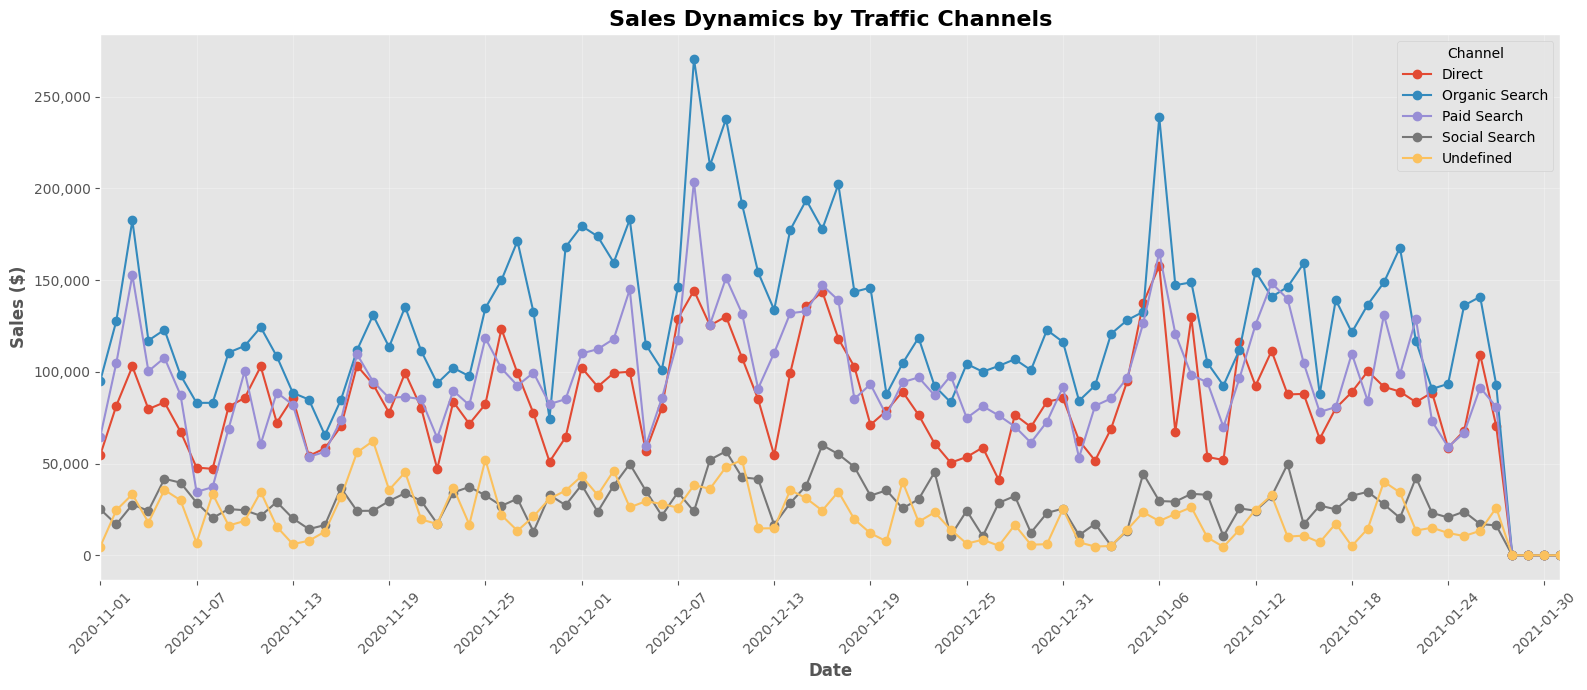

In [166]:
# Make sure that order_date is in datetime format
df['order_date'] = pd.to_datetime(df['order_date'])

# Aggregating sales across dates and channels
daily_sales_channel = (
    df.groupby(['order_date', 'channel'])['price']
    .sum()
    .reset_index()
)

# Setting the style
plt.style.use('ggplot')
plt.figure(figsize=(16, 7))

# Draw lines for each channel
for channel in daily_sales_channel['channel'].unique():
    df_plot = daily_sales_channel[daily_sales_channel['channel'] == channel]
    plt.plot(
        df_plot['order_date'],
        df_plot['price'],
        marker='o',
        label=channel,
        color=colors.get(channel, None)
    )

# X-axis ticks every 6 days
x_ticks = pd.date_range(
    start=df['order_date'].min(),
    end=df['order_date'].max(),
    freq='6D'
)
plt.xticks(x_ticks, rotation=45)

# Limit X-axis
plt.xlim(df['order_date'].min(), df['order_date'].max())

# Y-axis formatting: 10,000
from matplotlib.ticker import StrMethodFormatter
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.title('Sales Dynamics by Traffic Channels', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Sales ($)', fontsize=12, fontweight='bold')
plt.legend(title='Channel')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

The graph immediately shows that the largest contribution to sales is provided by the Paid Search channel, which has the highest peaks, which indicates the effectiveness of paid traffic. Organic Search and Direct show stable averages, with periodic fluctuations. The Social Search channel has a negligible impact on overall sales. The Undefined channel consistently shows the lowest results, which may indicate its inefficiency or problems with traffic classification.

## **5.4. Sales dynamics by device type**

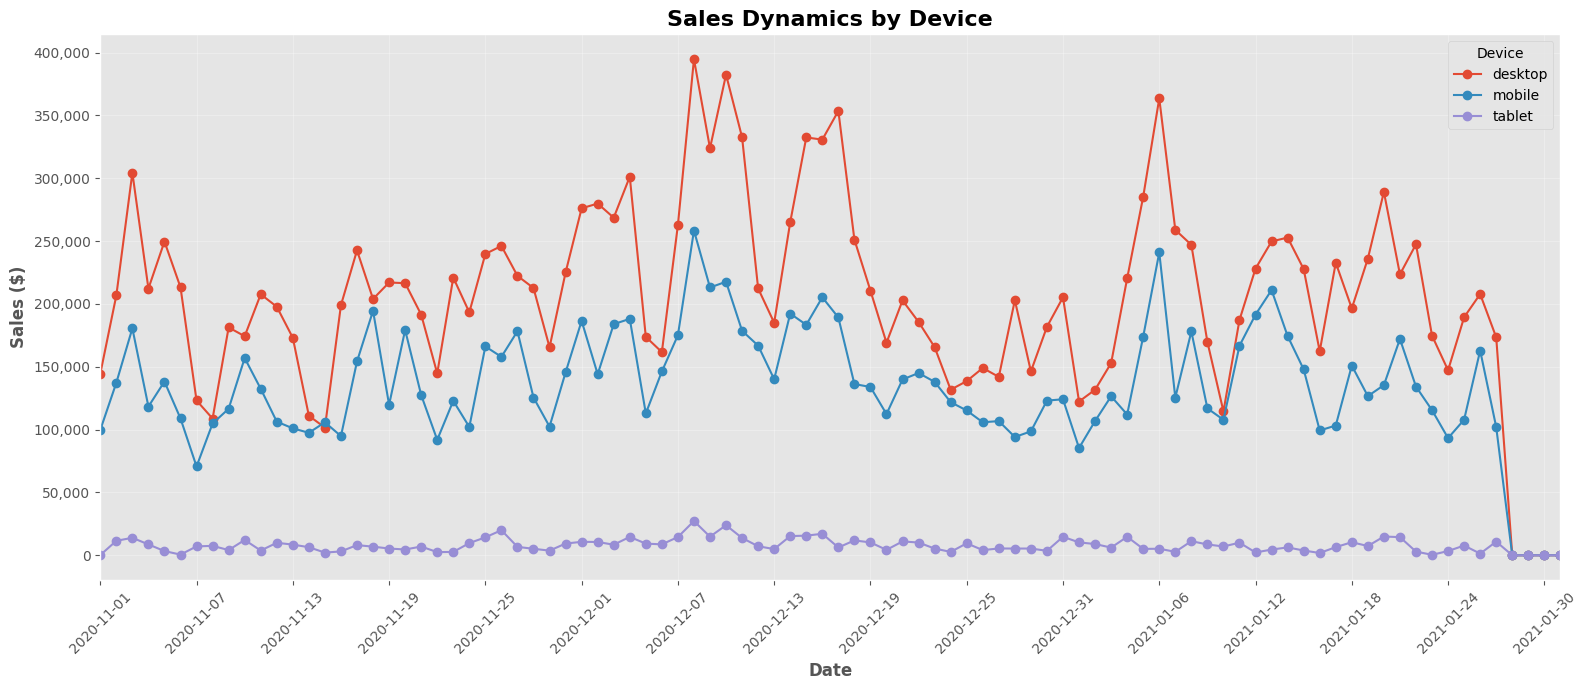

In [167]:
# Make sure that order_date is in datetime format
df['order_date'] = pd.to_datetime(df['order_date'])

# Aggregating sales across dates and channels
daily_sales_device = (
    df.groupby(['order_date', 'device'])['price']
    .sum()
    .reset_index()
)

# Setting the style
plt.style.use('ggplot')
plt.figure(figsize=(16, 7))

# Draw lines for each channel
for device in daily_sales_device['device'].unique():
    df_plot = daily_sales_device[daily_sales_device['device'] == device]
    plt.plot(df_plot['order_date'], df_plot['price'], marker='o', label=device, color=colors.get(device, None))

# Formation of correct labels by X with a step of 6 days
x_ticks = pd.date_range(start=df['order_date'].min(),
                        end=df['order_date'].max(),
                        freq='6D')
plt.xticks(x_ticks, rotation=45)

# Limit for X-axis
plt.xlim(df['order_date'].min(), df['order_date'].max())

# Y-axis formatting: 10,000
from matplotlib.ticker import StrMethodFormatter
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.title('Sales Dynamics by Device', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Sales ($)', fontsize=12, fontweight='bold')
plt.legend(title='Device')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

According to the "Sales Dynamics by Device" graph, it is immediately noticeable that desktops have the highest sales, and strong fluctuations are associated with certain seasonal patterns. Mobile devices demonstrate stable, but lower figures, which indicates constant user activity. Tablets have the lowest sales, with minimal changes over the period.

So, desktops dominate sales, mobile devices maintain a stable level, and tablets are less significant for business purposes.

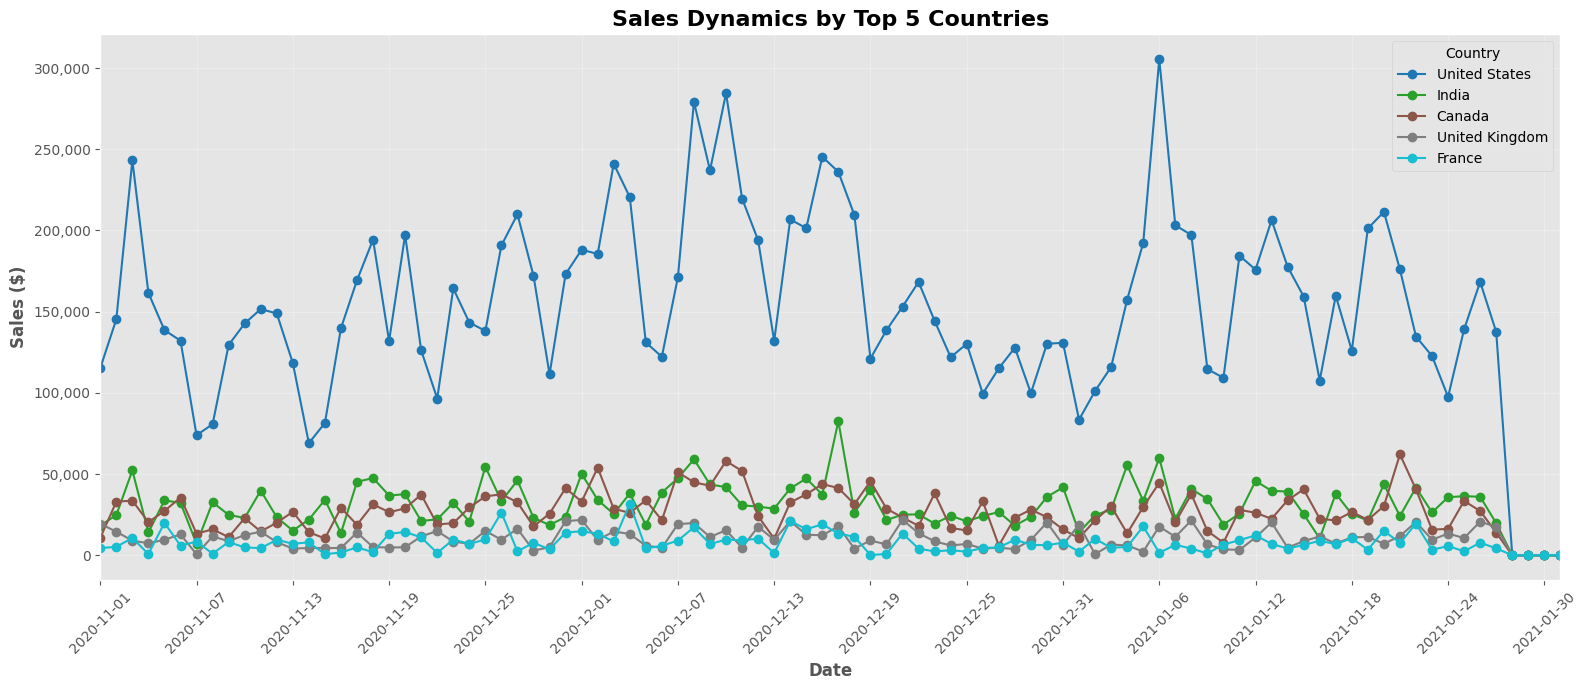

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

# Make sure that order_date is in datetime format
df['order_date'] = pd.to_datetime(df['order_date'])

# Aggregating sales across countries
sales_by_country = df.groupby('country')['price'].sum().sort_values(ascending=False)

# Select top 5 countries
top_countries = sales_by_country.head(5).index.tolist()

# Filter data for the top 5 countries and aggregate daily sales
daily_sales_country = (
    df[df['country'].isin(top_countries)]
    .groupby(['order_date', 'country'])['price']
    .sum()
    .reset_index()
)

# Setting the style
plt.style.use('ggplot')
plt.figure(figsize=(16, 7))

# Generate colors automatically for 5 countries (new API)
colors = plt.colormaps['tab10'].resampled(5)

# Draw a line for each country
for i, country in enumerate(top_countries):
    df_plot = daily_sales_country[daily_sales_country['country'] == country]
    plt.plot(
        df_plot['order_date'],
        df_plot['price'],
        marker='o',
        label=country,
        color=colors(i)
    )

# X-axis ticks every 6 days
x_ticks = pd.date_range(
    start=df['order_date'].min(),
    end=df['order_date'].max(),
    freq='6D'
)
plt.xticks(x_ticks, rotation=45)

# Limit X-axis exactly to data range
plt.xlim(df['order_date'].min(), df['order_date'].max())

# Y-axis formatting: 10,000
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# Titles and labels
plt.title('Sales Dynamics by Top 5 Countries', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Sales ($)', fontsize=12, fontweight='bold')

# Legend and grid
plt.legend(title='Country')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

According to the resulting graph, the US is the main market and consistently leads in sales volumes, with frequent peaks above 200,000. Other countries (India, Canada, UK, France) show much lower figures, mostly not exceeding 50,000, and their fluctuations are insignificant.

Thus, the graph clearly illustrates the dominance of the US in sales, while the contribution of other countries to the overall dynamics is limited.

# **6. Data analysis using pivot tables**

## **6.1. Pivot table by traffic channels and device types**

In [169]:
session_cnt_by_channels_and_device = pd.pivot_table(
    df,
    values='ga_session_id',
    index='channel',
    columns='device',
    aggfunc='count'
)

print(f'Number of sessions by traffic channels and device types:\n\033[1m{session_cnt_by_channels_and_device}\033[0m')

Number of sessions by traffic channels and device types:
device          desktop  mobile  tablet
channel                                
Direct            47825   31745    1812
Organic Search    72622   49014    2789
Paid Search       55167   37034    2140
Social Search     16288   10988     638
Undefined         12527    8486     470


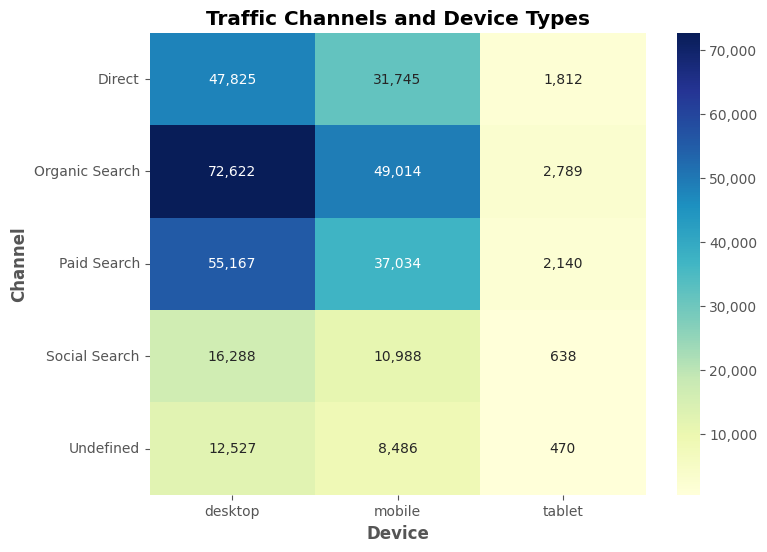

In [170]:
from matplotlib.ticker import FuncFormatter

# Convert all values to numeric and fill NaN with zeros
heatmap_data = session_cnt_by_channels_and_device.fillna(0).astype(int)

# Create formatted annotations without applymap
annot_data = heatmap_data.apply(lambda col: col.map("{:,}".format))

plt.figure(figsize=(8, 6))
ax = sns.heatmap(
    heatmap_data,
    annot=annot_data,   # formatted text for cells
    fmt="",             # prevents double-formatting
    cmap="YlGnBu"
)

# Formatting colorbar to 10,000 format
colorbar = ax.collections[0].colorbar
comma_formatter = FuncFormatter(lambda x, _: f"{x:,.0f}")
colorbar.formatter = comma_formatter
colorbar.update_ticks()

plt.title('Traffic Channels and Device Types', fontweight='bold')
plt.ylabel('Channel', fontweight='bold')
plt.xlabel('Device', fontweight='bold')
plt.show()

Organic Search on desktop has the highest number of visits (72,622), while Paid Search shows strong results, especially on desktop and mobile. Mobile traffic is consistently high across all channels, but is lower than on desktop. Tablets have the lowest number of visits across all channels. The Undefined channel has the lowest numbers, which may indicate problems with traffic source classification.

So, desktop dominates traffic, and organic and paid search are the most effective channels.

## **6.2. Pivot table of sales by category and country**

In [171]:
# Top 10 categories and top 5 countries by sales
top_categories = df.groupby('category')['price'].sum().nlargest(10).index
top_countries = df.groupby('country')['price'].sum().nlargest(5).index

# Filtering
df_filtered = df[df['category'].isin(top_categories) & df['country'].isin(top_countries)]

total_revenue_by_category_and_country = df_filtered.pivot_table(
    values='price',
    index='category',
    columns='country',
    aggfunc='sum'
)

print(f'Total revenue by category and country:\n\033[1m{total_revenue_by_category_and_country}\033[0m')

Total revenue by category and country:
country                             Canada    France     India  \
category                                                         
Bar furniture                      51724.0   11199.0   57657.0   
Beds                              354772.0  116414.0  358319.5   
Bookcases & shelving units        278981.9   73830.0  364507.4   
Cabinets & cupboards              181802.0   59101.5  191888.0   
Chairs                            417740.8  134029.4  544309.2   
Chests of drawers & drawer units   71952.0   21544.5   73111.0   
Children's furniture               30264.0   14258.0   39177.0   
Outdoor furniture                 185322.8   40486.4  162289.4   
Sofas & armchairs                 692427.5  187735.0  788430.0   
Tables & desks                    132678.0   42299.0  186157.5   

country                           United Kingdom  United States  
category                                                         
Bar furniture                       

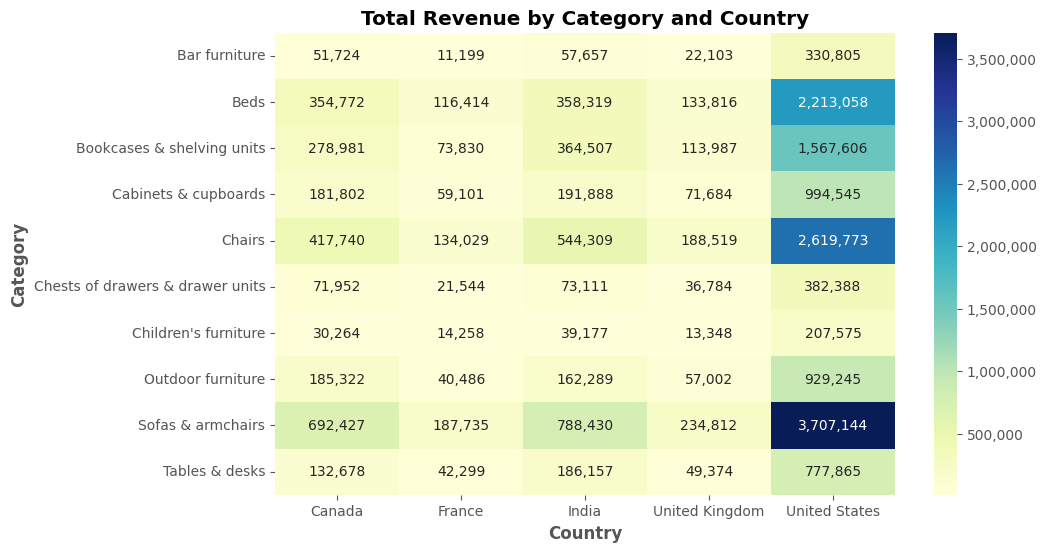

In [172]:
from matplotlib.ticker import FuncFormatter

# Convert all values to numeric and fill NaN with zeros
heatmap_data = total_revenue_by_category_and_country.fillna(0).astype(int)

# Create formatted strings for annotations without using applymap
annot_data = heatmap_data.apply(lambda col: col.map("{:,}".format))

plt.figure(figsize=(10, 6))
ax = sns.heatmap(
    heatmap_data,
    annot=annot_data,
    fmt="",
    cmap="YlGnBu"
)

# Colorbar formatting (10,000)
colorbar = ax.collections[0].colorbar
comma_formatter = FuncFormatter(lambda x, _: f"{x:,.0f}")
colorbar.formatter = comma_formatter
colorbar.update_ticks()

plt.title('Total Revenue by Category and Country', fontweight='bold')
plt.ylabel('Category', fontweight='bold')
plt.xlabel('Country', fontweight='bold')
plt.show()

The US has the highest revenues in almost all furniture categories, especially in the Sofas & armchairs, Chairs, and Beds segments. The Bookcases & shelving units category also shows strong results in Canada, France, and India. The countries France and the UK have generally lower figures compared to other countries. India shows strong results in the Beds, Chairs, and Sofas & armchairs categories, indicating active demand.

So, it is clear from the graph that the US is a key market, and the upholstered furniture and seating categories are the most profitable.

## **6.3. Pivot table of sales by country and channel**

In [173]:
# Channels and top 5 countries by sales
top_channel = df.groupby('channel')['price'].sum().nlargest(10).index
top_countries = df.groupby('country')['price'].sum().nlargest(5).index

# Filtering
df_filtered = df[df['channel'].isin(top_channel) & df['country'].isin(top_countries)]

# Пивот-таблиця
total_revenue_by_channel_and_country = df_filtered.pivot_table(
    values='price',
    index='channel',
    columns='country',
    aggfunc='sum'
)

print(f'Total revenue by channel and country:\n\033[1m{total_revenue_by_channel_and_country}\033[0m')

Total revenue by channel and country:
country           Canada    France     India  United Kingdom  United States
channel                                                                    
Direct          609806.3  169299.5  700256.0        203728.9      3346860.3
Organic Search  873719.7  261008.6  972575.7        356438.9      4958993.0
Paid Search     674902.0  192421.3  729970.0        278652.6      3589463.4
Social Search   151244.2   46713.4  215703.8         51836.0      1132651.1
Undefined       128248.8   41250.0  191256.5         47661.5       915586.1


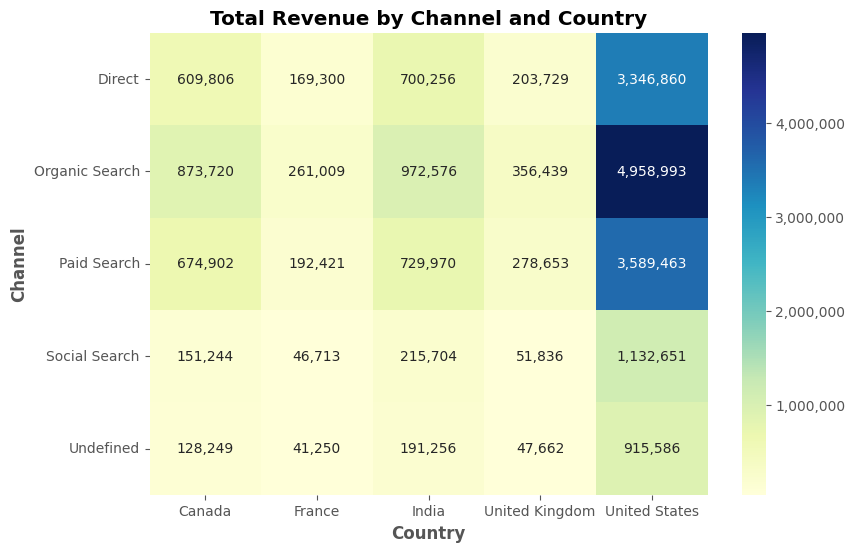

In [174]:
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import matplotlib.pyplot as plt

# Convert all values to numeric and fill NaN with zeros
heatmap_data = total_revenue_by_channel_and_country.fillna(0).astype(float)

# Create formatted annotations like "10,000"
annot_data = heatmap_data.apply(lambda col: col.map("{:,.0f}".format))

plt.figure(figsize=(9, 6))
ax = sns.heatmap(
    heatmap_data,
    annot=annot_data,   # formatted text for cells
    fmt="",             # prevents seaborn from double-formatting
    cmap="YlGnBu"
)

# Colorbar formatting: 10,000
colorbar = ax.collections[0].colorbar
comma_formatter = FuncFormatter(lambda x, _: f"{x:,.0f}")
colorbar.formatter = comma_formatter
colorbar.update_ticks()

plt.title('Total Revenue by Channel and Country', fontweight='bold')
plt.ylabel('Channel', fontweight='bold')
plt.xlabel('Country', fontweight='bold')
plt.show()

## **6.4. Pivot table of revenue by category and language**

In [175]:
mapping = {
    'zh': 'Chinese',
    'en-us': 'English (USA)',
    'es-es': 'Spanish',
    'en-gb': 'English (UK)',
    'en-ca': 'English (Canada)',
    'fr': 'French',
    'ko': 'Korean',
    'en': 'English',
    'de': 'German'
}

clean_mapping = {
    k: ("English" if k.startswith("en") else v)
    for k, v in mapping.items()
}
df['language'] = df['language'].replace(clean_mapping)

# Creating a PivotTable
revenue_category_language = pd.pivot_table(
    df,
    values='price',
    index='category',
    columns='language',
    aggfunc='sum'
).head(5)

# Replacing language codes with full names
revenue_category_language.rename(columns=clean_mapping, inplace=True)

print(f'Revenue by category and language:\n\033[1m{revenue_category_language}\033[0m')

Revenue by category and language:
language                     Chinese    English    French   German   Korean  \
category                                                                      
Bar furniture                24269.0   430680.0    9413.0   6507.0   3073.0   
Beds                        140256.0  2900963.0  117553.5  27028.0  63765.0   
Bookcases & shelving units  137595.8  2134370.9   61859.1  53369.3  33468.8   
Cabinets & cupboards         65165.5  1319425.5   55206.0  13272.0  14366.0   
Café furniture                7231.0    81193.0    2390.0    919.0    145.0   

language                    Spanish  
category                             
Bar furniture               12166.0  
Beds                        45410.5  
Bookcases & shelving units  59333.8  
Cabinets & cupboards        36138.0  
Café furniture               2079.0  


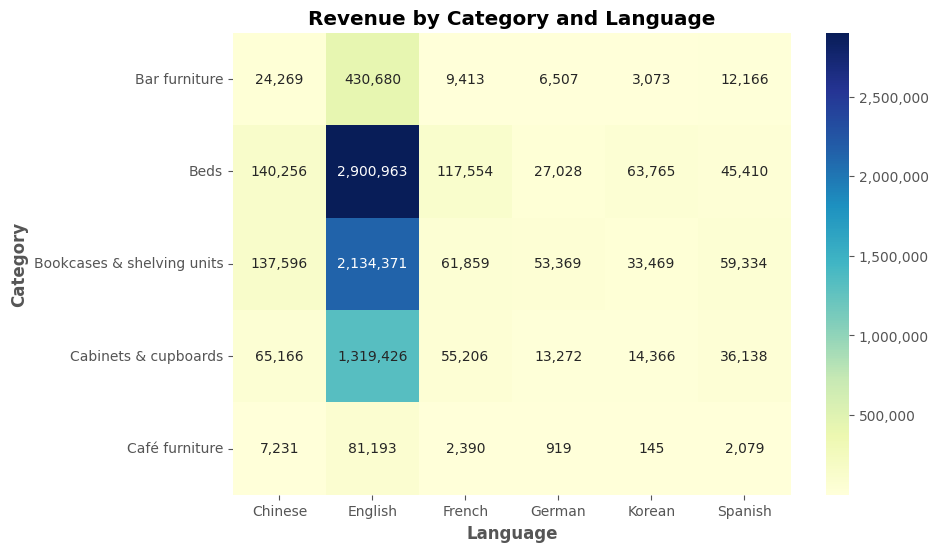

In [176]:
from matplotlib.ticker import FuncFormatter

# Convert all values to numeric and fill NaN with zeros
heatmap_data = revenue_category_language.fillna(0).astype(float)

# Create formatted annotation strings like "10,000"
annot_data = heatmap_data.apply(lambda col: col.map("{:,.0f}".format))

plt.figure(figsize=(9, 6))
ax = sns.heatmap(
    heatmap_data,
    annot=annot_data,   # formatted cell text
    fmt="",             # prevents double formatting
    cmap="YlGnBu"
)

# Colorbar formatting: 10,000
colorbar = ax.collections[0].colorbar
comma_formatter = FuncFormatter(lambda x, _: f"{x:,.0f}")
colorbar.formatter = comma_formatter
colorbar.update_ticks()

plt.title('Revenue by Category and Language', fontweight='bold')
plt.ylabel('Category', fontweight='bold')
plt.xlabel('Language', fontweight='bold')
plt.show()

According to the graph results, the highest revenue is observed in the Beds category for the English-speaking US audience (over 2 million), which significantly exceeds that of other language segments. Cabinets & cupboards, bookcases & shelving units also have high figures for English (USA, UK). This indicates strong purchasing activity in these categories among English-speaking users. Other languages ​​and categories have noticeably lower revenues, which may indicate the need for a change in marketing strategy.

# **7. Statistical analysis of relationships**

## **7.1. Number of sessions and total sales for each date**

In [177]:
number_of_session_by_date = df.groupby('order_date')['ga_session_id'].count().reset_index(name='session_cnt')
total_sales_by_date = df.groupby('order_date')['price'].sum().reset_index(name='total_sales')

merge_session_sales = pd.merge(number_of_session_by_date,total_sales_by_date, on='order_date')
print(f'Number of sessions and total sales for each date:\n\033[1m{merge_session_sales}\033[0m')

Number of sessions and total sales for each date:
   order_date  session_cnt  total_sales
0  2020-11-01         2576     244292.5
1  2020-11-02         3599     355506.8
2  2020-11-03         5173     498979.6
3  2020-11-04         4184     339187.1
4  2020-11-05         3743     391276.6
..        ...          ...          ...
87 2021-01-27         4435     286340.7
88 2021-01-28         4112          0.0
89 2021-01-29         3700          0.0
90 2021-01-30         2845          0.0
91 2021-01-31         2812          0.0

[92 rows x 3 columns]


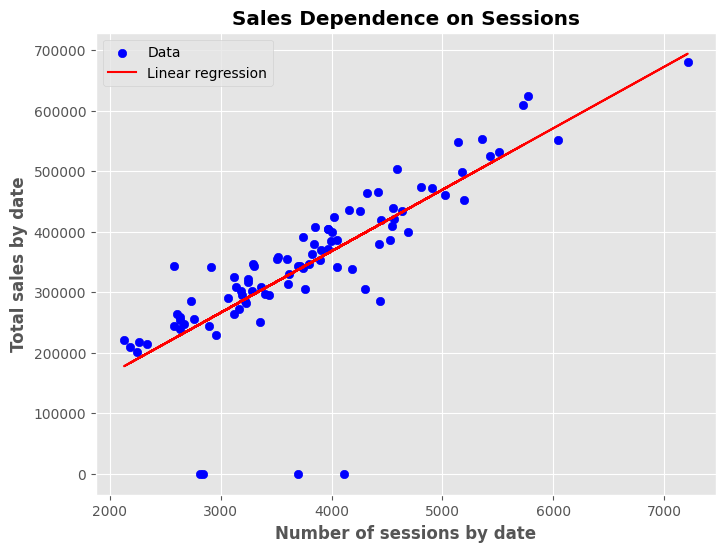

In [178]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(merge_session_sales['session_cnt'], merge_session_sales['total_sales'], color='blue', label='Data')

# Linear regression
m, b = np.polyfit(merge_session_sales['session_cnt'], merge_session_sales['total_sales'], 1)
plt.plot(merge_session_sales['session_cnt'], m * merge_session_sales['session_cnt'] + b, color='red', label='Linear regression')

plt.xlabel('Number of sessions by date', fontweight='bold')
plt.ylabel('Total sales by date', fontweight='bold')
plt.title('Sales Dependence on Sessions', fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

The graph shows the dependence of total sales on the number of sessions.

The graph clearly shows a positive correlation, that is, as the number of sessions increases, sales also increase. The regression line describes the trend well, although there are a few outliers with very low sales at the average number of sessions.

To understand which correlation coefficient to use, we need to evaluate the distribution of the data. To do this, we will plot the distributions of the data for 'number_of_sessions_by_date' and 'total_sales_by_date'.

In order to run the tests, you need to get rid of zeros for total_sales, since normality tests (Shapiro, Normaltest) are sensitive to zeros, and this can greatly distort the visualization. Let's build a graph to better understand the deviation from normality for total_sales.

For session_cnt, zeros should be left because we are estimating the distribution of all sessions, even if the user has not registered on the site.

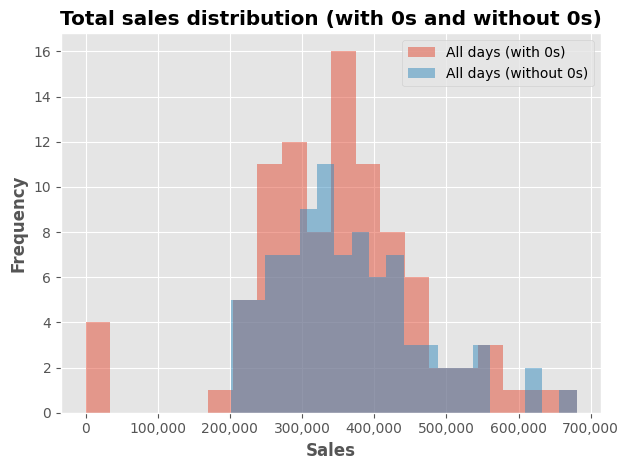

In [179]:
from matplotlib.ticker import StrMethodFormatter

# All days (with zeros)
plt.hist(merge_session_sales['total_sales'], bins=20, alpha=0.5, label='All days (with 0s)')
# All days (without zeros)
plt.hist(merge_session_sales[merge_session_sales['total_sales'] > 0]['total_sales'], bins=20, alpha=0.5, label='All days (without 0s)')

plt.xlabel('Sales', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Total sales distribution (with 0s and without 0s)', fontweight='bold')
plt.legend()

# Format X-axis as 10,000
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()

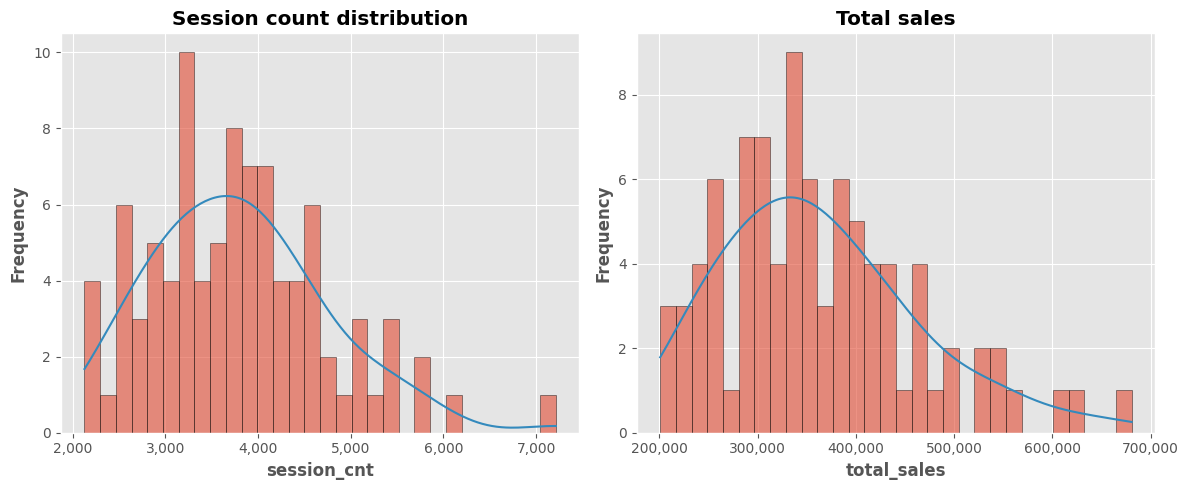

In [180]:
from scipy.stats import gaussian_kde
from matplotlib.ticker import StrMethodFormatter

# Data
session_data = merge_session_sales['session_cnt']
sales_no_zeros = merge_session_sales[merge_session_sales['total_sales'] > 0]['total_sales']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Left plot: session_cnt
counts_s, bins_s, _ = axes[0].hist(session_data, bins=30, alpha=0.6, edgecolor='black')

# KDE
kde_s = gaussian_kde(session_data)
x_s = np.linspace(session_data.min(), session_data.max(), 200)
bin_width_s = bins_s[1] - bins_s[0]
axes[0].plot(x_s, kde_s(x_s) * len(session_data) * bin_width_s)

axes[0].set_title('Session count distribution', fontweight='bold')
axes[0].set_xlabel('session_cnt', fontweight='bold')
axes[0].set_ylabel('Frequency', fontweight='bold')

# Format X-axis as 10,000
axes[0].xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# Right plot: total_sales
counts_t, bins_t, _ = axes[1].hist(sales_no_zeros, bins=30, alpha=0.6, edgecolor='black')

# KDE
kde_t = gaussian_kde(sales_no_zeros)
x_t = np.linspace(sales_no_zeros.min(), sales_no_zeros.max(), 200)
bin_width_t = bins_t[1] - bins_t[0]
axes[1].plot(x_t, kde_t(x_t) * len(sales_no_zeros) * bin_width_t)

axes[1].set_title('Total sales', fontweight='bold')
axes[1].set_xlabel('total_sales', fontweight='bold')
axes[1].set_ylabel('Frequency', fontweight='bold')

# Format X-axis as 10,000
axes[1].xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()

Conclusion about the distribution of the data for:

In the Session count distribution graph, the distribution of the number of sessions has a single peak shape with a concentration of values ​​in the range of 2000–4000. Therefore, most users create a moderate number of sessions, and extreme values ​​​​occur rarely.
In the Total sales distribution graph, the distribution of total sales also has a single peak shape, with the highest frequency in the range of 30000–40000.
Therefore, typical sales volumes are concentrated within this interval, and values that are very low or very high ​​​​are less common.

To better understand the data 'number_of_sessions_by_date' and 'total_sales_by_date', let's evaluate the asymmetry (skewness) and check the normality using tests Normaltest and Shapiro test.

In [181]:
from scipy.stats import shapiro, normaltest, skew

data = merge_session_sales['session_cnt']

# Shapiro-Wilk test
stat, p = shapiro(data)
print('Shapiro-Wilk test: \033[1m stat=%.4f, \033[1m p=%.6f\033[0m' % (stat, p))
print()
# D’Agostino’s Normaltest
stat2, p2 = normaltest(data)
print('Normaltest: \033[1mstat=%.4f, p=%.6f\033[0m' % (stat2, p2))
print()
# Asymmetry (skewness)
skew_value = skew(data)
print(f'Asymmetry (skewness): \033[1m{skew_value:.4f}\033[0m')

# Interpretation of asymmetry (skewness)
if skew_value > 1:
    skew_desc = 'Srong right-sided asymmetry'
elif skew_value > 0.5:
    skew_desc = 'Moderate right-sided asymmetry'
elif skew_value > -0.5:
    skew_desc = 'The distribution is almost symmetrical'
elif skew_value > -1:
    skew_desc = 'Moderate left-sided asymmetry'
else:
    skew_desc = 'Strong left-sided asymmetry'

print(f"Interpretation of asymmetry: \033[1m{skew_desc}\033[0m")

Shapiro-Wilk test:  stat=0.9688,  p=0.026201

Normaltest: stat=9.4991, p=0.008655

Asymmetry (skewness): 0.6933
Interpretation of asymmetry: Moderate right-sided asymmetry


The Shapiro-Wilk test yielded the following results: stat=0.9688, p=0.0262. This test tests the hypothesis H0 that the data have a normal distribution.

The p-value is < 0.05, so we reject the 𝐻0-hypothesis, meaning the data deviate slightly from a normal distribution.

D’Agostino’s Normaltest also confirms that the distribution is not normal.

The skewness value = 0.69, which confirms right skewness. This means that most of the values ​​are smaller, but there are a few large values ​​that “pull” the tail to the right.

In [182]:
from scipy.stats import shapiro, normaltest, skew

# Filter zeros in total_sales
total_sales_filtered = merge_session_sales[merge_session_sales['total_sales'] > 0]['total_sales']

print(f'Number of values ​​to filter: \033[1m{len(merge_session_sales['total_sales'])}\033[0m')
print(f'Number of values ​​after filtering out zeros: \033[1m{len(total_sales_filtered)}\n\033[0m')

# Shapiro
stat_shapiro, p_shapiro = shapiro(total_sales_filtered)
print('Shapiro test:')
print(f'  stat = \033[1m{stat_shapiro:.4f}\033[0m')
print(f'  p-value = \033[1m{p_shapiro:.6f}\n\033[0m')

# Normaltest
stat_normal, p_normal = normaltest(total_sales_filtered)
print('Normaltest:')
print(f'  stat = \033[1m{stat_normal:.4f}\033[0m')
print(f'  p-value = \033[1m{p_normal:.6f}\n\033[0m')

# Skewness
skew_value = skew(total_sales_filtered)
print(f'Skewness (asymmetry): \033[1m{skew_value:.4f}\033[0m')

# Interpretation of asymmetry (skewness)
if skew_value > 1:
    skew_desc = 'Srong right-sided asymmetry'
elif skew_value > 0.5:
    skew_desc = 'Moderate right-sided asymmetry'
elif skew_value > -0.5:
    skew_desc = 'The distribution is almost symmetrical'
elif skew_value > -1:
    skew_desc = 'Moderate left-sided asymmetry'
else:
    skew_desc = 'Strong left-sided asymmetry'

print(f"Interpretation of asymmetry: \033[1m{skew_desc}\033[0m")

Number of values ​​to filter: 92
Number of values ​​after filtering out zeros: 88

Shapiro test:
  stat = 0.9563
  p-value = 0.004793

Normaltest:
  stat = 9.8796
  p-value = 0.007156

Skewness (asymmetry): 0.7867
Interpretation of asymmetry: Moderate right-sided asymmetry


The data distribution total_sales is not normal, since in both tests, the p-value < 0.05. Therefore, the null hypothesis of normality is rejected. This means that the data total_sales significantly deviates from a normal distribution. Additionally, the graph exhibits clear right-sided skewness, and the resulting skewness value of 0.7867 indicates a noticeable positive (right) skewness. Most of the values ​​in the data are concentrated to the left, and the “long tail” extends to the right due to relatively large values.

It is not recommended to use parametric tests that require normality for data, such as the t-test or Pearson correlation.

It is better to use nonparametric methods, such as Mann–Whitney or Spearman.

In [183]:
from scipy.stats import spearmanr

# Reject zero sales
filtered_data = merge_session_sales[merge_session_sales['total_sales'] > 0]

session = filtered_data['session_cnt']
sales = filtered_data['total_sales']

# Spearman correlation
corr, p_value = spearmanr(session, sales)

print(f"Spearman correlation: \033[1m{corr:.4f}\033[0m")
print(f"p-value: \033[1m{p_value:.40f}\033[0m")

Spearman correlation: 0.9043
p-value: 0.0000000000000000000000000000000015381770


Since the data were not normally distributed, Spearman's rank correlation coefficient was applied. The analysis revealed a very strong and statistically significant positive relationship between the number of sessions and total sales (0.9043). This indicates that a higher number of sessions is strongly associated with higher total sales.

In [184]:
from scipy.stats import kendalltau

# Discarding zero sales values
filtered_data = merge_session_sales[merge_session_sales['total_sales'] > 0]

session = filtered_data['session_cnt']
sales = filtered_data['total_sales']

# Kendall's tau
tau, p_value = kendalltau(session, sales)

print(f"Kendall’s: \033[1m{tau:.4f}\033[0m")
print(f"p-value: \033[1m{p_value:.30f}\033[0m")

Kendall’s: 0.7586
p-value: 0.000000000000000000000000123389


Since the variables were not normally distributed, the Kendall correlation coefficient was also used to assess the relationship between the number of sessions and total sales. The analysis revealed a very strong and statistically significant positive relationship between the variables (0.7586), indicating that an increase in the number of sessions is closely related to an increase in total sales.

## **7.2. Research the correlation between sales on the top 3 continents. Analyze the statistical significance of the relationships**

In [185]:
top_3_continent_by_sales = df.groupby('continent')['price'].sum().sort_values(ascending=False).head(3).index.tolist()
df_filter = df[df["continent"].isin(top_3_continent_by_sales)]

total_sales_top_3_continent = pd.pivot_table(
    df_filter,
    values='price',
    index='order_date',
    columns="continent",
    aggfunc="sum").reset_index()

print(f'Sales by top 3 continents:\n\033[1m{total_sales_top_3_continent}\033[0m')

Sales by top 3 continents:
continent order_date  Americas      Asia   Europe
0         2020-11-01  132002.5   63823.0  46908.0
1         2020-11-02  193861.0   79370.0  75710.8
2         2020-11-03  294529.8  126737.8  67692.0
3         2020-11-04  200009.5   66602.0  65915.0
4         2020-11-05  182988.2  117608.4  86540.0
..               ...       ...       ...      ...
87        2021-01-27  166735.5   66783.1  48156.1
88        2021-01-28       0.0       0.0      0.0
89        2021-01-29       0.0       0.0      0.0
90        2021-01-30       0.0       0.0      0.0
91        2021-01-31       0.0       0.0      0.0

[92 rows x 4 columns]



======= Americas =======
Shapiro-Wilk p-value: 0.04247
The distribution is not normal.


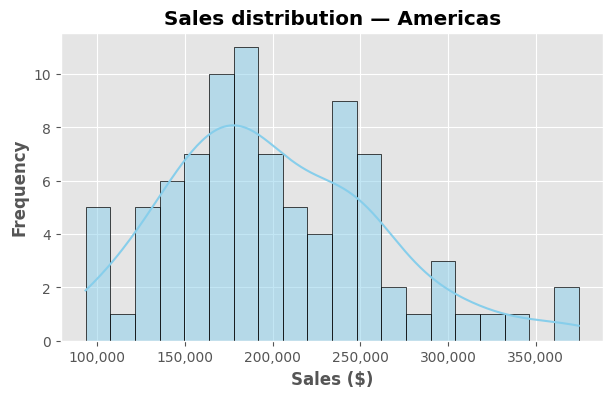

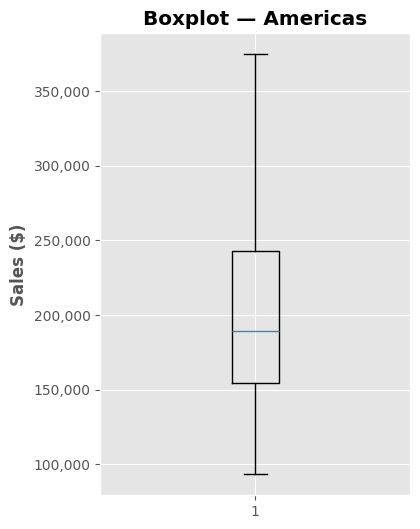


======= Asia =======
Shapiro-Wilk p-value: 0.00038
The distribution is not normal.


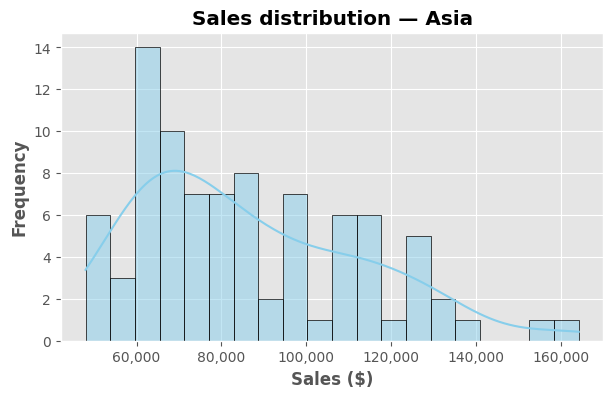

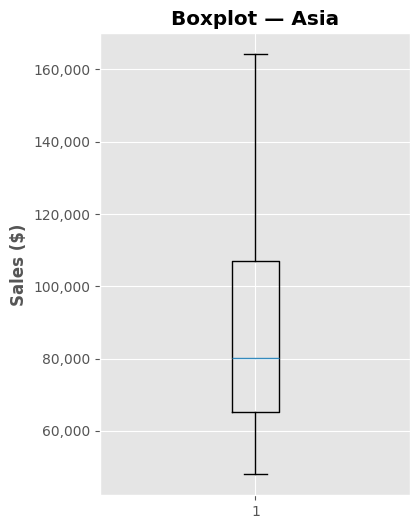


======= Europe =======
Shapiro-Wilk p-value: 0.00731
The distribution is not normal.


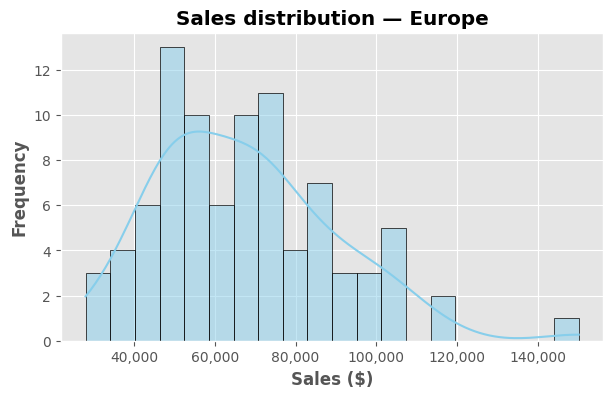

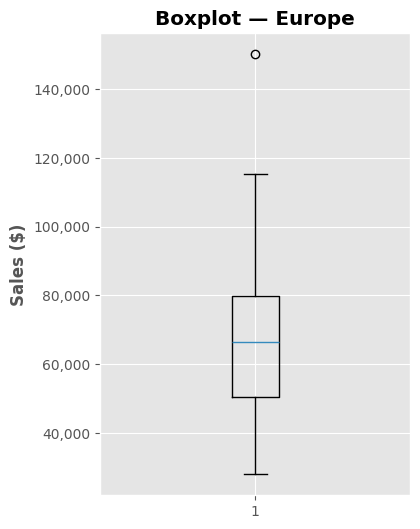

In [186]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from scipy.stats import shapiro
from matplotlib.ticker import StrMethodFormatter

# We only take the names of the continents (without order_date)
continents = total_sales_top_3_continent.columns[1:]

# Discarding zero sales values
filtered_data = total_sales_top_3_continent.copy()
for cont in continents:
    filtered_data = filtered_data[filtered_data[cont] != 0]

# Checking normality
for cont in continents:
    data = filtered_data[cont].dropna()

    print(f'\n======= \033[1m{cont}\033[0m =======')

    # Shapiro-Wilk test
    stat, p = shapiro(data)
    print(f'Shapiro-Wilk p-value: \033[1m{p:.5f}\033[0m')

    if p > 0.05:
        print('The distribution is close to normal.')
    else:
        print('The distribution is not normal.')

    # Histogram, KDE
    plt.figure(figsize=(7,4))
    sns.histplot(data, bins=20, kde=True, edgecolor='black', color='skyblue')
    plt.title(f'Sales distribution — {cont}', fontweight='bold')
    plt.xlabel('Sales ($)', fontweight='bold')
    plt.ylabel('Frequency', fontweight='bold')

    # Format X-axis as 10,000
    plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

    plt.show()

    # Boxplot
    plt.figure(figsize=(4,6))
    plt.boxplot(data, vert=True)
    plt.title(f'Boxplot — {cont}', fontweight='bold')
    plt.ylabel('Sales ($)', fontweight='bold')

    # Optional: format Y-axis for boxplot
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

    plt.show()

Since the data do not follow a normal distribution, the classical Pearson correlation coefficient may give unreliable results. In this case, it is more appropriate to use nonparametric methods, such as Spearman or Kendall correlation, which estimate monotonic dependence and do not require normality of the data.

In [187]:
from scipy.stats import spearmanr

# We only take columns with sales of continents
data = total_sales_top_3_continent[continents]

# Calculate the correlation matrix and p-values
corr_matrix = data.corr(method='spearman')

print("Spearman correlation matrix:")
print(f'\033[1m{corr_matrix}\033[0m')

# Checking statistical significance for each pair
for i, cont1 in enumerate(continents):
    for j, cont2 in enumerate(continents):
        if i < j:
            coef, p = spearmanr(data[cont1], data[cont2])
            print(f'\033[1m{cont1}vs {cont2}\033[0m — Spearman r: \033[1m{coef:.3f}\033[0m, p-value: \033[1m{p:.20f}\033[0m')

Spearman correlation matrix:
continent  Americas      Asia   Europe
continent                             
Americas   1.000000  0.709902  0.67257
Asia       0.709902  1.000000  0.65711
Europe     0.672570  0.657110  1.00000
Americasvs Asia — Spearman r: 0.710, p-value: 0.00000000000000232338
Americasvs Europe — Spearman r: 0.673, p-value: 0.00000000000021035589
Asiavs Europe — Spearman r: 0.657, p-value: 0.00000000000112909472


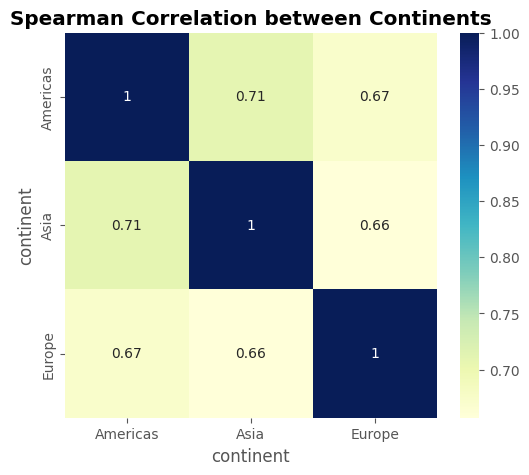

In [188]:
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.title("Spearman Correlation between Continents", fontweight='bold')
plt.show()

From the heatmap, it is clear that if sales are growing on one continent, they should also grow on the others. All connections are statistically significant (p-values ​​are very low), that is, the correlation is not random.
In more detail:

between America and Asia, r = 0.71, that is, there is a strong positive correlation.
between America and Europe, r = 0.67, that is, there is a moderately strong positive correlation.
between Asia and Europe, r = 0.66, there is also a moderately strong positive correlation.

## **7.3. Research into the correlation between sales across different communication channels. Analysis of the statistical significance of relationships**

In [189]:
df_channel_by_sales = pd.pivot_table(
    df,
    values='price',
    index='order_date',
    columns="channel",
    aggfunc="sum").reset_index()

print(f'Sales by channel:\n\033[1m{df_channel_by_sales}\033[0m')

Sales by channel:
channel order_date    Direct  Organic Search  Paid Search  Social Search  \
0       2020-11-01   54669.5         95112.0      64688.0        25078.0   
1       2020-11-02   81561.5        127746.5     104780.8        16843.0   
2       2020-11-03  102909.5        182521.9     152641.3        27652.5   
3       2020-11-04   79683.6        117067.1     100332.0        24257.4   
4       2020-11-05   83367.6        122938.4     107648.0        41693.2   
..             ...       ...             ...          ...            ...   
87      2021-01-27   70423.1         92921.1      80869.5        16282.0   
88      2021-01-28       0.0             0.0          0.0            0.0   
89      2021-01-29       0.0             0.0          0.0            0.0   
90      2021-01-30       0.0             0.0          0.0            0.0   
91      2021-01-31       0.0             0.0          0.0            0.0   

channel  Undefined  
0           4745.0  
1          24575.0  
2     


======= Direct =======
Shapiro-Wilk p-value: 0.01249
The distribution is not normal.


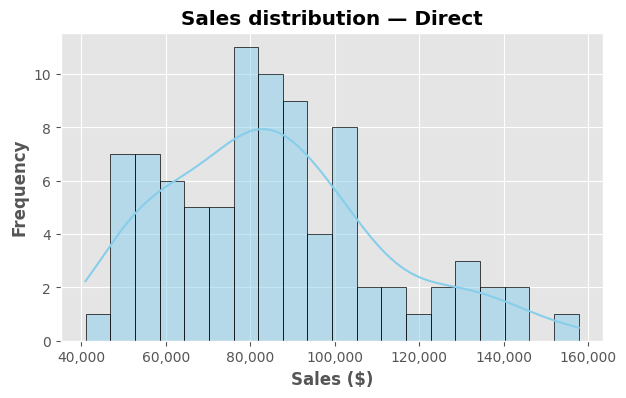

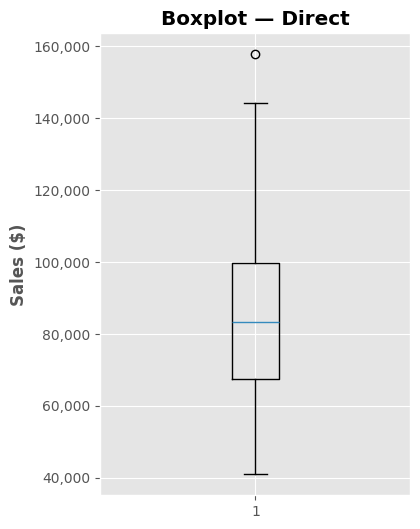


======= Organic Search =======
Shapiro-Wilk p-value: 0.00010
The distribution is not normal.


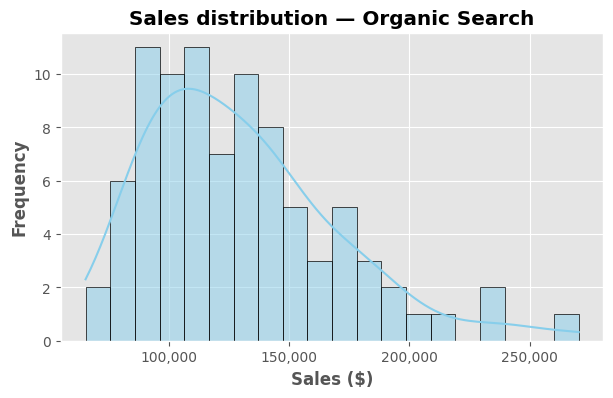

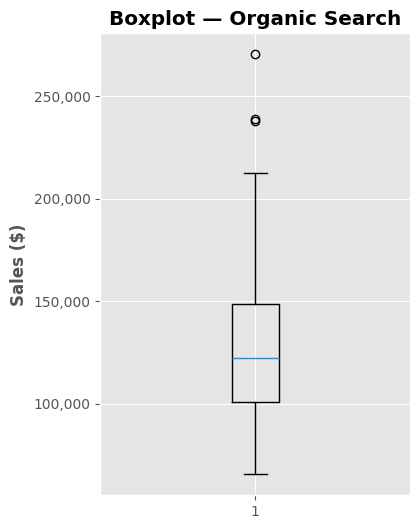


======= Paid Search =======
Shapiro-Wilk p-value: 0.01744
The distribution is not normal.


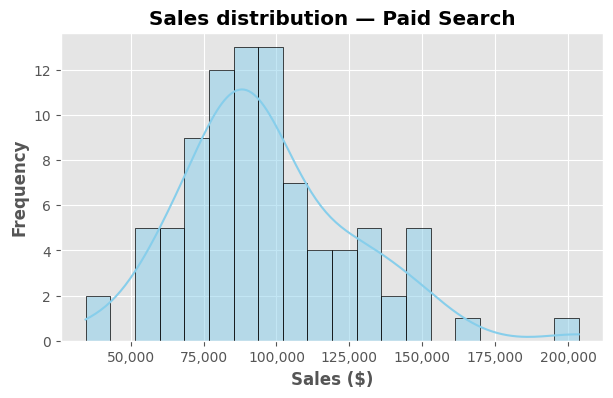

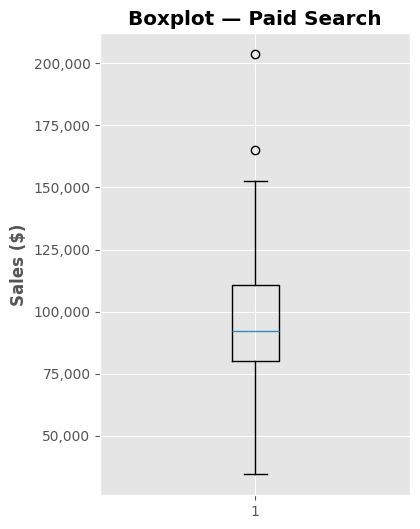


======= Social Search =======
Shapiro-Wilk p-value: 0.11310
The distribution is close to normal.


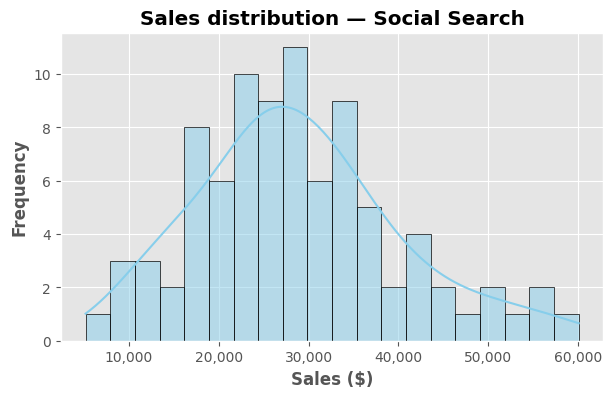

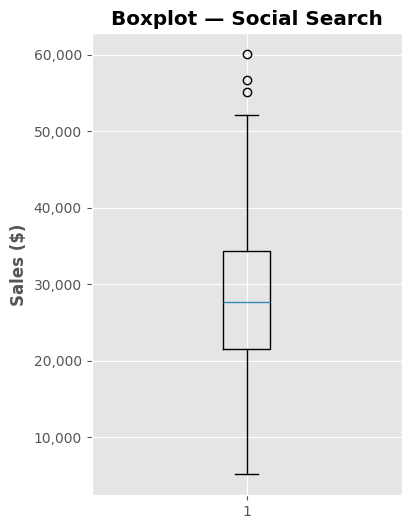


======= Undefined =======
Shapiro-Wilk p-value: 0.00082
The distribution is not normal.


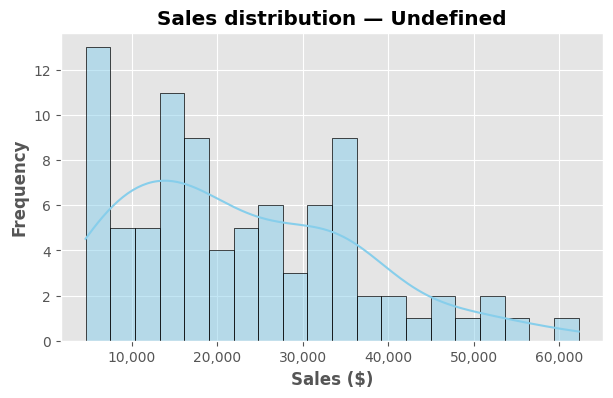

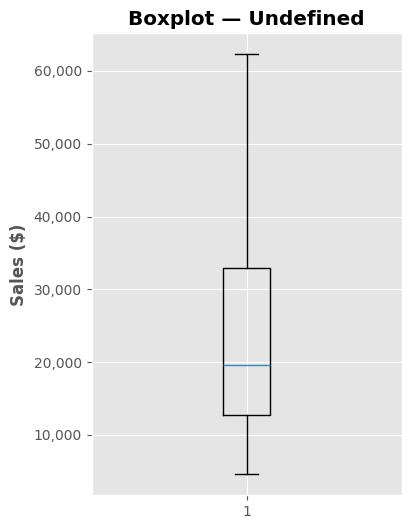

In [190]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from scipy.stats import shapiro
from matplotlib.ticker import StrMethodFormatter

# We only take the names of the channels (without order_date)
channels = df_channel_by_sales.columns[1:]

# Discarding zero sales values
filtered_data = df_channel_by_sales.copy()
for channel in channels:
    filtered_data = filtered_data[filtered_data[channel] != 0]

# Checking normality
for channel in channels:
    data = filtered_data[channel].dropna()

    print(f'\n======= \033[1m{channel}\033[0m =======')

    # Shapiro-Wilk test
    stat, p = shapiro(data)
    print(f'Shapiro-Wilk p-value: \033[1m{p:.5f}\033[0m')

    if p > 0.05:
        print('The distribution is close to normal.')
    else:
        print('The distribution is not normal.')

    # Histogram, KDE
    plt.figure(figsize=(7,4))
    sns.histplot(data, bins=20, kde=True, edgecolor='black', color='skyblue')
    plt.title(f'Sales distribution — {channel}', fontweight='bold')
    plt.xlabel('Sales ($)', fontweight='bold')
    plt.ylabel('Frequency', fontweight='bold')

    # Format X-axis as 10,000
    plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

    plt.show()

    # Boxplot
    plt.figure(figsize=(4,6))
    plt.boxplot(data, vert=True)
    plt.title(f'Boxplot — {channel}', fontweight='bold')
    plt.ylabel('Sales ($)', fontweight='bold')

    # Format Y-axis as 10,000
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

    plt.show()

For almost all channels, the data does not follow a normal distribution, except for Social Search, where the data distribution is close to normal. Therefore, it is advisable to use non-parametric methods, such as Spearman or Kendall correlation, which estimate monotonic dependence and do not require normality of the data.

In [191]:
from scipy.stats import spearmanr

# We only take columns with sales of channels
data = df_channel_by_sales[channels]

# Calculate the correlation matrix and p-values
corr_matrix_by_channel = data.corr(method='spearman')

print("Spearman correlation matrix:")
print(f'\033[1m{corr_matrix_by_channel}\033[0m')

# Checking statistical significance for each pair
for i, ch1 in enumerate(channels):
    for j, ch2 in enumerate(channels):
        if i < j:
            coef, p = spearmanr(data[ch1], data[ch2])
            print(f'\033[1m{ch1}vs {ch2}\033[0m — Spearman r: \033[1m{coef:.3f}\033[0m, p-value: \033[1m{p:.25f}\033[0m')

Spearman correlation matrix:
channel           Direct  Organic Search  Paid Search  Social Search  \
channel                                                                
Direct          1.000000        0.779663     0.729369       0.469342   
Organic Search  0.779663        1.000000     0.793381       0.461543   
Paid Search     0.729369        0.793381     1.000000       0.492725   
Social Search   0.469342        0.461543     0.492725       1.000000   
Undefined       0.556922        0.524677     0.556491       0.462530   

channel         Undefined  
channel                    
Direct           0.556922  
Organic Search   0.524677  
Paid Search      0.556491  
Social Search    0.462530  
Undefined        1.000000  
Directvs Organic Search — Spearman r: 0.780, p-value: 0.0000000000000000000540525
Directvs Paid Search — Spearman r: 0.729, p-value: 0.0000000000000001654021618
Directvs Social Search — Spearman r: 0.469, p-value: 0.0000023655563867126620036
Directvs Undefined — Spearma

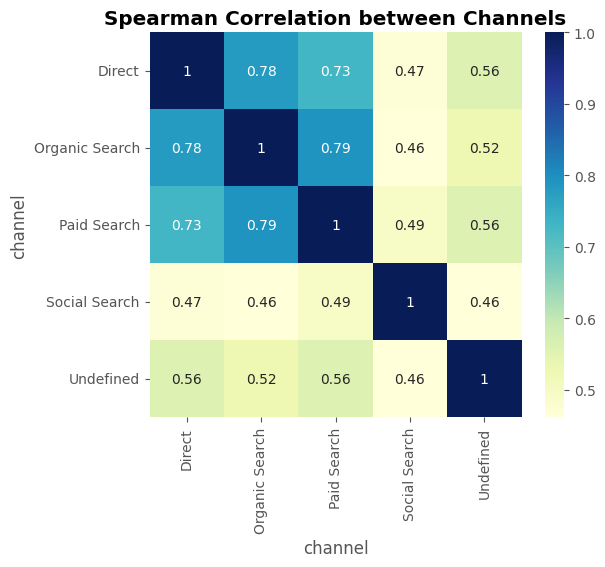

In [192]:
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix_by_channel, annot=True, cmap='YlGnBu')
plt.title("Spearman Correlation between Channels", fontweight='bold')
plt.show()

Based on the Spearman correlation matrix, the strongest positive correlation is observed between Organic Search and Paid Search (0.79), as well as between Direct and Organic Search (0.78). Social Search has moderate correlations with other channels, and the weakest is with Organic Search (0.46). The Undefined channel has moderate positive correlations with most channels (0.46–0.56).

Thus, Direct, Organic Search, and Paid Search channels are more closely related to each other, while Social Search is less related to other channels. The Undefined channel shows a medium level of correlation with all channels.

## **7.4. Correlation between sales by top 5 product categories**

In [193]:
df_top_category = df[df["category"].isin(df.groupby("category")["price"]
                                     .sum()
                                     .nlargest(5)
                                     .index)]

df_product_by_sales = pd.pivot_table(
    df_top_category,
    values='price',
    index='order_date',
    columns='category',
    aggfunc='sum').reset_index()

print(f'Sales by product categories:\n\033[1m{df_product_by_sales}\033[0m')

Sales by product categories:
category order_date     Beds  Bookcases & shelving units  \
0        2020-11-01  14041.0                     36701.0   
1        2020-11-02  79683.5                     40979.0   
2        2020-11-03  66219.5                     64360.1   
3        2020-11-04  48939.0                     35719.8   
4        2020-11-05  23449.0                     40998.8   
..              ...      ...                         ...   
83       2021-01-23  37116.0                     29862.7   
84       2021-01-24  23294.0                     25396.0   
85       2021-01-25  47303.5                     25919.6   
86       2021-01-26  69894.5                     39119.2   
87       2021-01-27  43080.0                     33874.2   

category  Cabinets & cupboards   Chairs  Sofas & armchairs  
0                      13591.5  46006.0            75216.0  
1                      21623.0  58834.0            79977.5  
2                      33555.5  61204.0           175594.0  
3     


======= Beds =======
Shapiro-Wilk p-value: 0.00199
The distribution is not normal.


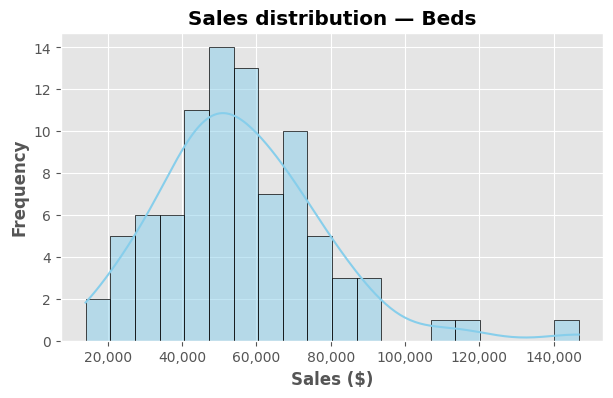

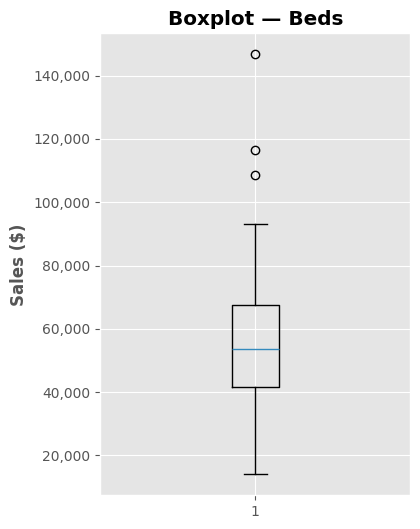


======= Bookcases & shelving units =======
Shapiro-Wilk p-value: 0.00881
The distribution is not normal.


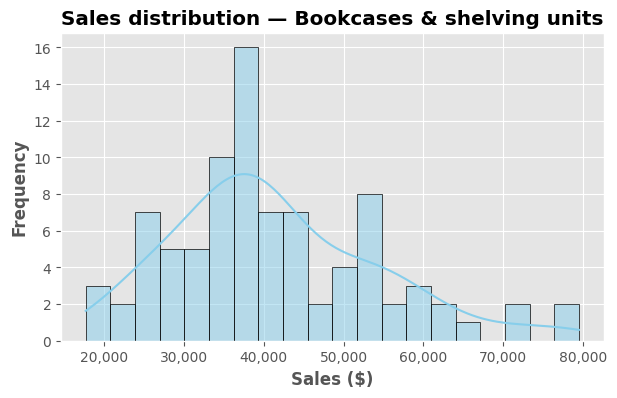

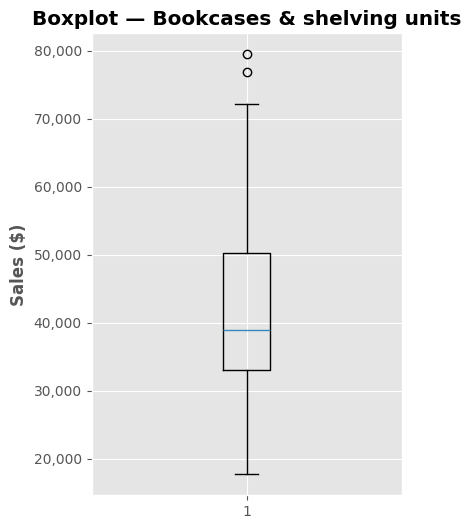


======= Cabinets & cupboards =======
Shapiro-Wilk p-value: 0.00467
The distribution is not normal.


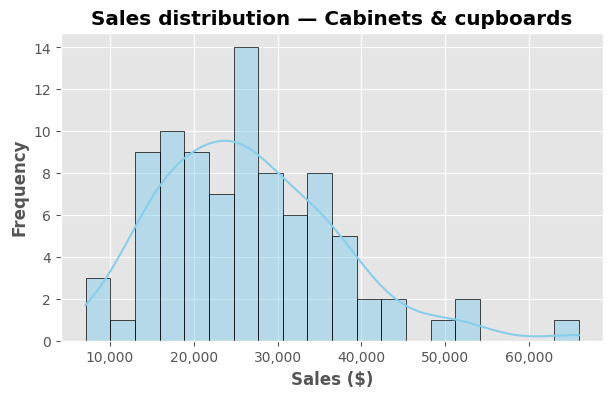

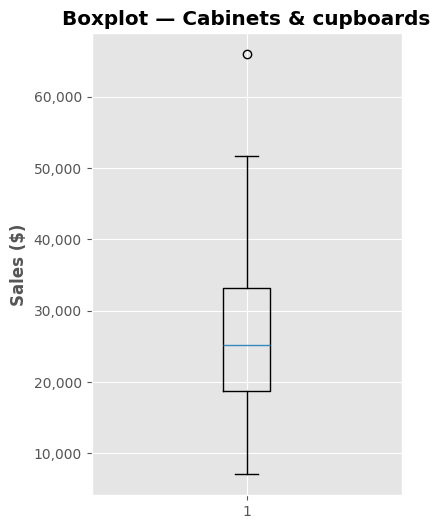


======= Chairs =======
Shapiro-Wilk p-value: 0.00071
The distribution is not normal.


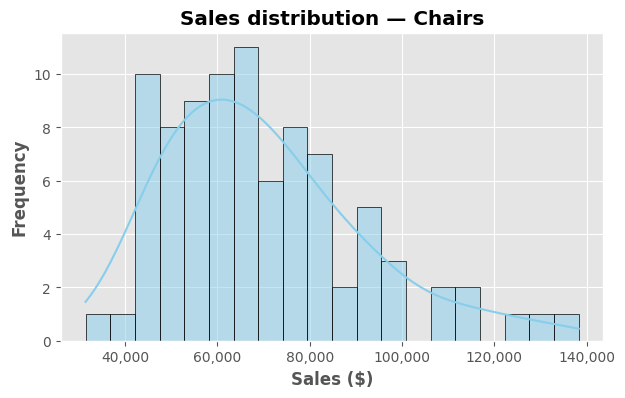

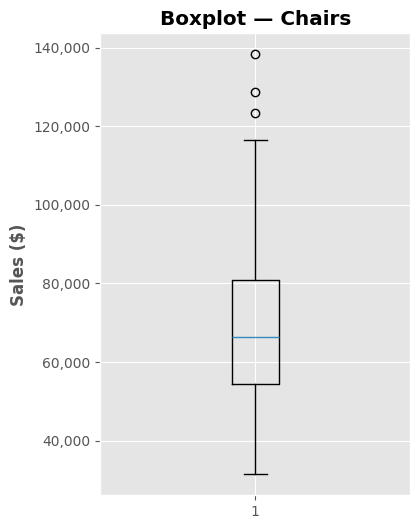


======= Sofas & armchairs =======
Shapiro-Wilk p-value: 0.01217
The distribution is not normal.


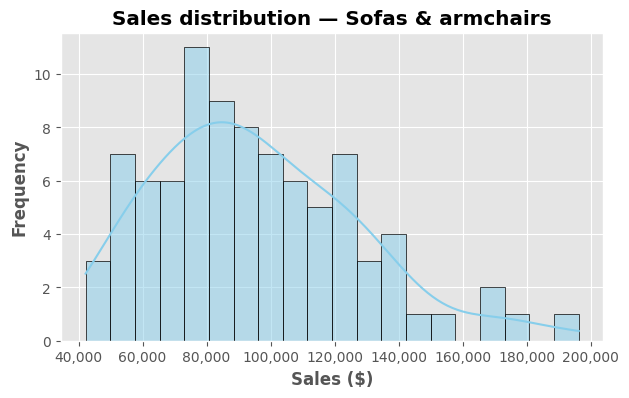

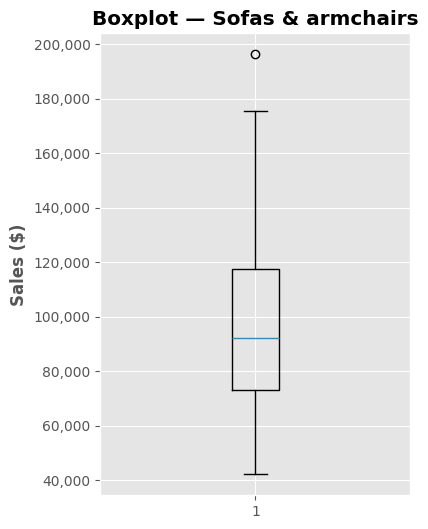

In [194]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from scipy.stats import shapiro
from matplotlib.ticker import StrMethodFormatter

# We only take the names of the categories (without order_date)
categories = df_product_by_sales.columns[1:]

# Normality test for each group
for cat in categories:
    # Discarding null and zero values
    data = df_product_by_sales[cat][df_product_by_sales[cat] != 0].dropna()

    print(f'\n======= \033[1m{cat}\033[0m =======')

    # Shapiro-Wilk test
    stat, p = shapiro(data)
    print(f'Shapiro-Wilk p-value: \033[1m{p:.5f}\033[0m')

    if p > 0.05:
        print('The distribution is close to normal.')
    else:
        print('The distribution is not normal.')

    # Histogram, KDE
    plt.figure(figsize=(7,4))
    sns.histplot(data, bins=20, kde=True, edgecolor='black', color='skyblue')
    plt.title(f'Sales distribution — {cat}', fontweight='bold')
    plt.xlabel('Sales ($)', fontweight='bold')
    plt.ylabel('Frequency', fontweight='bold')

    # Format X-axis as 10,000
    plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

    plt.show()

    # Boxplot
    plt.figure(figsize=(4,6))
    plt.boxplot(data, vert=True)
    plt.title(f'Boxplot — {cat}', fontweight='bold')
    plt.ylabel('Sales ($)', fontweight='bold')

    # Format Y-axis as 10,000
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

    plt.show()

From the obtained graphs, it is clear that the data distribution does not correspond to a normal distribution. Therefore, to calculate the correlation, we will use the Spearman method, which does not require a normal distribution.

In [195]:
from scipy.stats import spearmanr

# We only take columns with sales of categories
data = df_product_by_sales[categories]

# Calculate the correlation matrix and p-values
corr_matrix_by_category = data.corr(method='spearman')

print("Spearman correlation matrix:")
print(f'\033[1m{corr_matrix_by_category}\033[0m')

# Checking statistical significance for each pair
for i, ch1 in enumerate(categories):
    for j, ch2 in enumerate(categories):
        if i < j:
            coef, p = spearmanr(data[ch1], data[ch2])
            print(f'\033[1m{ch1}vs {ch2}\033[0m — Spearman r: \033[1m{coef:.3f}\033[0m, p-value: \033[1m{p:.25f}\033[0m')

Spearman correlation matrix:
category                        Beds  Bookcases & shelving units  \
category                                                           
Beds                        1.000000                    0.542742   
Bookcases & shelving units  0.542742                    1.000000   
Cabinets & cupboards        0.440368                    0.528706   
Chairs                      0.534941                    0.636751   
Sofas & armchairs           0.521715                    0.625603   

category                    Cabinets & cupboards    Chairs  Sofas & armchairs  
category                                                                       
Beds                                    0.440368  0.534941           0.521715  
Bookcases & shelving units              0.528706  0.636751           0.625603  
Cabinets & cupboards                    1.000000  0.526822           0.631204  
Chairs                                  0.526822  1.000000           0.583319  
Sofas & armcha

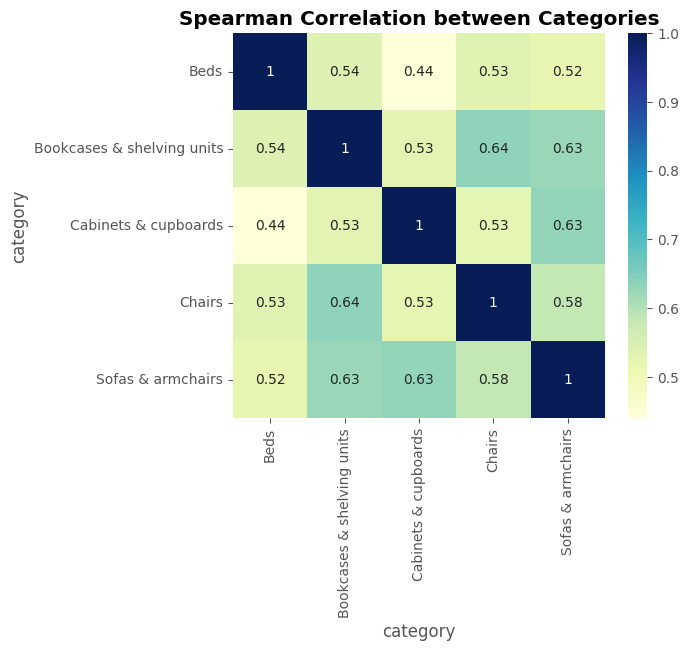

In [196]:
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix_by_category, annot=True, cmap='YlGnBu')
plt.title("Spearman Correlation between Categories", fontweight='bold')
plt.show()

The highest correlations are between Bookcases & shelving units and Chairs (0.64), and Bookcases & shelving units and Sofas & armchairs (0.63), which indicates similar user behavior when choosing these categories.

Overall, all categories show a moderate positive correlation (from 0.44 to 0.64), which may indicate similar preferences of buyers. The Beds category has the lowest correlation with the others, especially with Cabinets & cupboards (0.44), which may indicate its more autonomous nature in choosing.

## **7.5. Correlation between sales and different device types**

In [197]:
df_device = df[df["device"].isin(df.groupby("device")["price"]
                                     .sum()
                                     .index)]

df_device_by_sales = pd.pivot_table(
    df_device,
    values='price',
    index='order_date',
    columns='device',
    aggfunc='sum').reset_index()

print(f'Sales by devices:\n\033[1m{df_device_by_sales}\033[0m')

Sales by devices:
device order_date   desktop    mobile   tablet
0      2020-11-01  144445.0   99698.5    149.0
1      2020-11-02  206727.3  137269.5  11510.0
2      2020-11-03  304473.8  180602.8  13903.0
3      2020-11-04  212227.7  118324.4   8635.0
4      2020-11-05  249682.0  138256.0   3338.6
..            ...       ...       ...      ...
87     2021-01-27  173453.5  102042.2  10845.0
88     2021-01-28       0.0       0.0      0.0
89     2021-01-29       0.0       0.0      0.0
90     2021-01-30       0.0       0.0      0.0
91     2021-01-31       0.0       0.0      0.0

[92 rows x 4 columns]



======= desktop =======
Shapiro-Wilk p-value: 0.01495
The distribution is not normal.


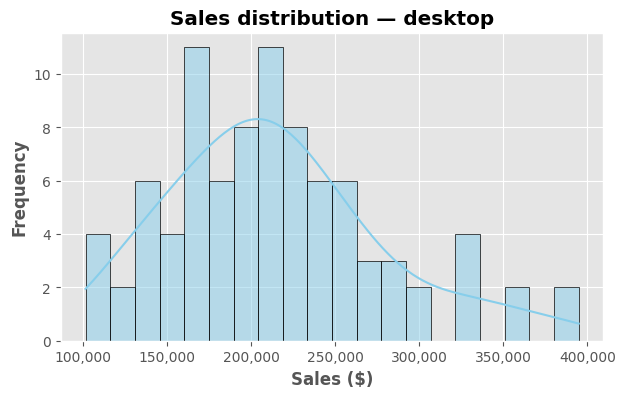

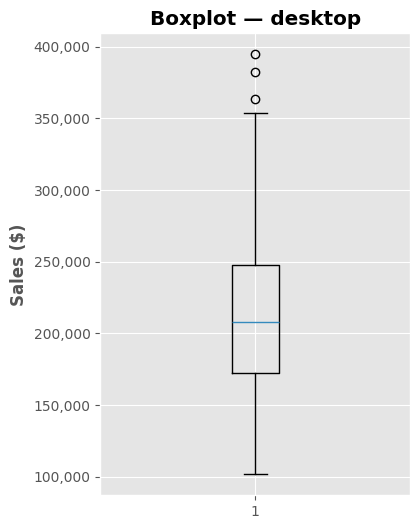


======= mobile =======
Shapiro-Wilk p-value: 0.00138
The distribution is not normal.


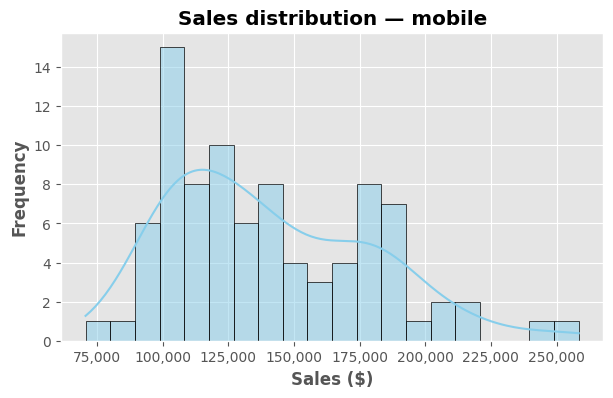

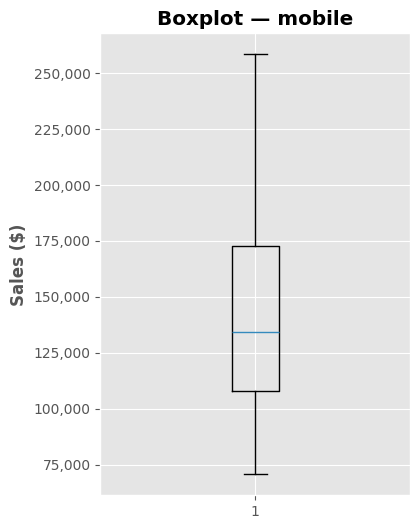


======= tablet =======
Shapiro-Wilk p-value: 0.00030
The distribution is not normal.


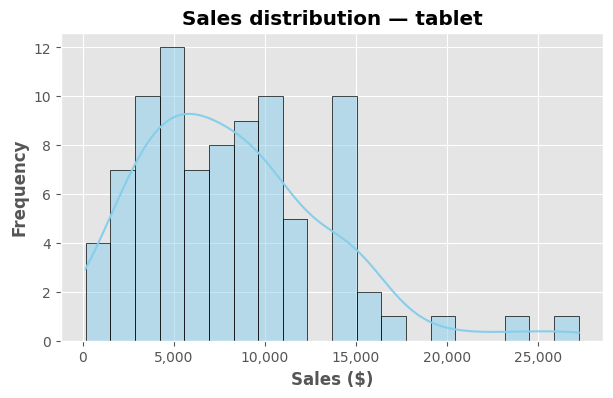

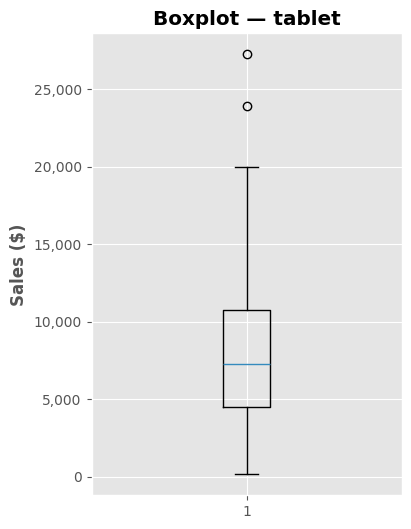

In [198]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from scipy.stats import shapiro
from matplotlib.ticker import StrMethodFormatter

# We only take the names of the devices (without order_date)
devices = df_device_by_sales.columns[1:]

# Normality test for each group
for dev in devices:
    # Discarding null and zero values
    data = df_device_by_sales[dev][df_device_by_sales[dev] != 0].dropna()

    print(f'\n======= \033[1m{dev}\033[0m =======')

    # Shapiro-Wilk test
    stat, p = shapiro(data)
    print(f'Shapiro-Wilk p-value: \033[1m{p:.5f}\033[0m')

    if p > 0.05:
        print('The distribution is close to normal.')
    else:
        print('The distribution is not normal.')

    # Histogram, KDE
    plt.figure(figsize=(7,4))
    sns.histplot(data, bins=20, kde=True, edgecolor='black', color='skyblue')
    plt.title(f'Sales distribution — {dev}', fontweight='bold')
    plt.xlabel('Sales ($)', fontweight='bold')
    plt.ylabel('Frequency', fontweight='bold')

    # Format X-axis as 10,000
    plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

    plt.show()

    # Boxplot
    plt.figure(figsize=(4,6))
    plt.boxplot(data, vert=True)
    plt.title(f'Boxplot — {dev}', fontweight='bold')
    plt.ylabel('Sales ($)', fontweight='bold')

    # Format Y-axis as 10,000
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

    plt.show()

The data distribution does not correspond to a normal distribution, therefore, to calculate the correlation we will use the Spearman method, which does not require a normal distribution.

In [199]:
from scipy.stats import spearmanr

# We only take columns with sales of devices
data = df_device_by_sales[devices]

# Calculate the correlation matrix and p-values
corr_matrix_by_device = data.corr(method='spearman')

print("Spearman correlation matrix:")
print(f'\033[1m{corr_matrix_by_device}\033[0m')

# Checking statistical significance for each pair
for i, dev1 in enumerate(devices):
    for j, dev2 in enumerate(devices):
        if i < j:
            coef, p = spearmanr(data[dev1], data[dev2])
            print(f'\033[1m{dev1}vs {dev2}\033[0m — Spearman r: \033[1m{coef:.3f}\033[0m, p-value: \033[1m{p:.25f}\033[0m')

Spearman correlation matrix:
device    desktop    mobile    tablet
device                               
desktop  1.000000  0.798884  0.466362
mobile   0.798884  1.000000  0.476126
tablet   0.466362  0.476126  1.000000
desktopvs mobile — Spearman r: 0.799, p-value: 0.0000000000000000000014084
desktopvs tablet — Spearman r: 0.466, p-value: 0.0000027941441242388197045
mobilevs tablet — Spearman r: 0.476, p-value: 0.0000016098778065015932135


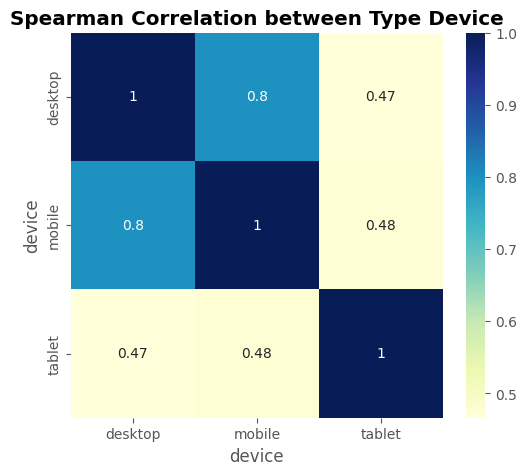

In [200]:
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix_by_device, annot=True, cmap='YlGnBu')
plt.title("Spearman Correlation between Type Device", fontweight='bold')
plt.show()

The highest correlation is between desktop and mobile devices (0.8), indicating similar behavioral patterns between these device types. Tablet has the lowest correlation with the others (≈0.47–0.48), which may indicate less active interaction through this device type.

## **7.6. Correlation between sales and different browsers**

In [201]:
df['browser'].unique()

array(['Chrome', 'Safari', 'Android Webview', '<Other>', 'Edge',
       'Firefox'], dtype=object)

In [202]:
df_top_browser = df[df['browser'].isin(df.groupby('browser')['price']
                                     .sum()
                                     .index)]

df_browser_by_sales = pd.pivot_table(
    df_top_browser,
    values='price',
    index='order_date',
    columns='browser',
    aggfunc='sum').reset_index()

print(f'Sales by browsers:\n\033[1m{df_browser_by_sales}\033[0m')

Sales by browsers:
browser order_date  <Other>  Android Webview    Chrome     Edge  Firefox  \
0       2020-11-01   5666.0           6716.5  176480.0   6058.0   3187.0   
1       2020-11-02   7557.0           3164.0  228677.3  12404.0   4620.0   
2       2020-11-03  12617.0           3541.0  345273.7  12487.0  14428.0   
3       2020-11-04   5848.0            236.0  228417.8  13671.0   2441.5   
4       2020-11-05  15549.0           5957.0  244978.0  14511.6   7590.0   
..             ...      ...              ...       ...      ...      ...   
87      2021-01-27   6626.5           1260.0  194032.1   5775.0   2325.0   
88      2021-01-28      0.0              0.0       0.0      0.0      0.0   
89      2021-01-29      0.0              0.0       0.0      0.0      0.0   
90      2021-01-30      0.0              0.0       0.0      0.0      0.0   
91      2021-01-31      0.0              0.0       0.0      0.0      0.0   

browser    Safari  
0         46185.0  
1         99084.5  
2       


======= <Other> =======
Shapiro-Wilk p-value: 0.00089
The distribution is not normal.


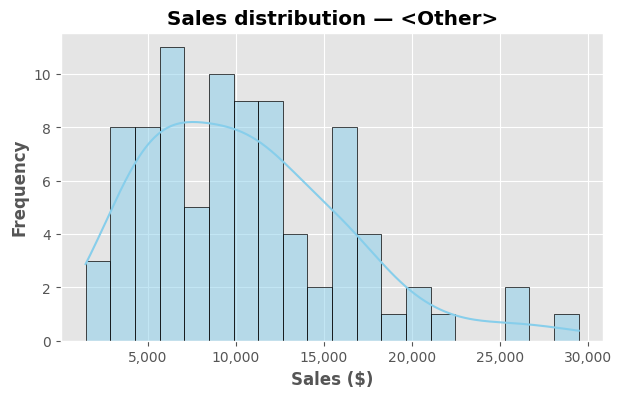

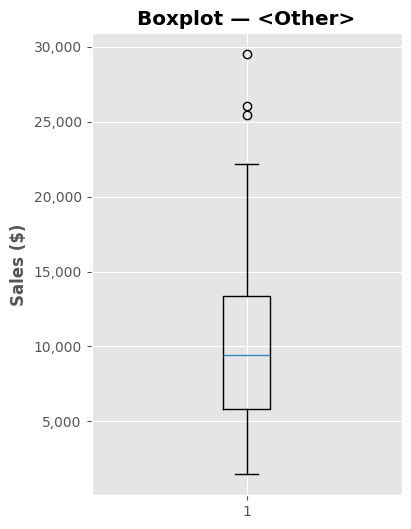


======= Android Webview =======
Shapiro-Wilk p-value: 0.00000
The distribution is not normal.


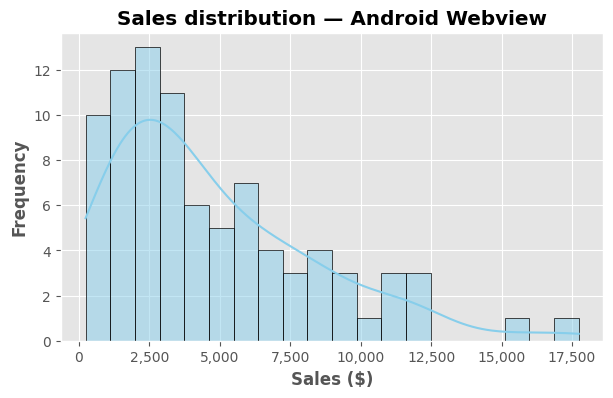

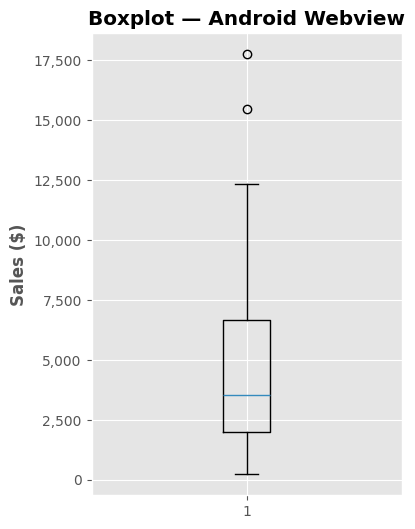


======= Chrome =======
Shapiro-Wilk p-value: 0.00945
The distribution is not normal.


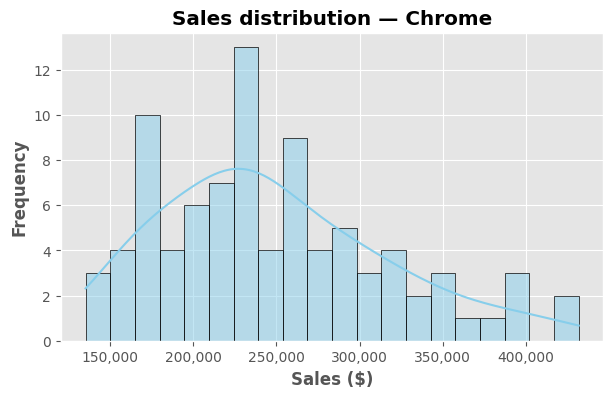

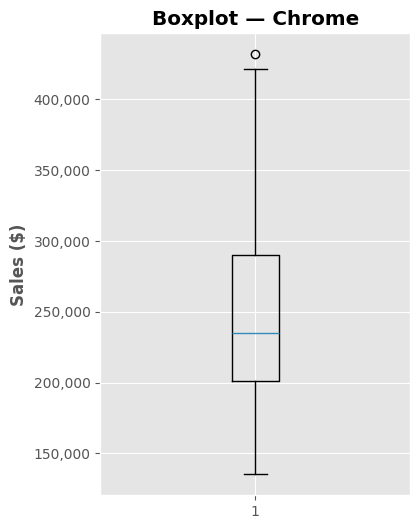


======= Edge =======
Shapiro-Wilk p-value: 0.00003
The distribution is not normal.


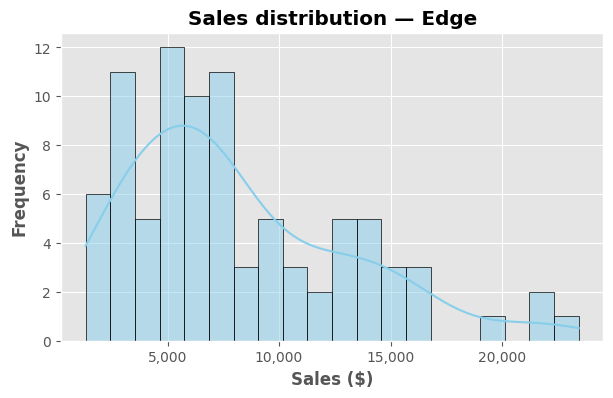

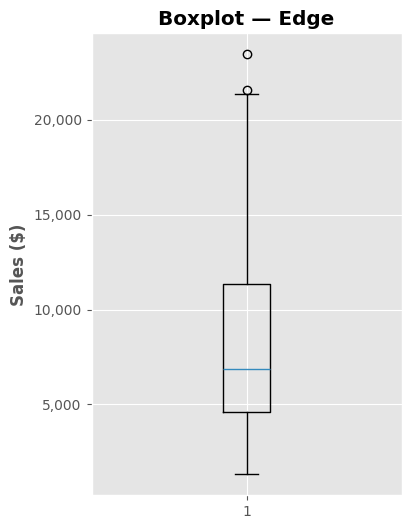


======= Firefox =======
Shapiro-Wilk p-value: 0.00001
The distribution is not normal.


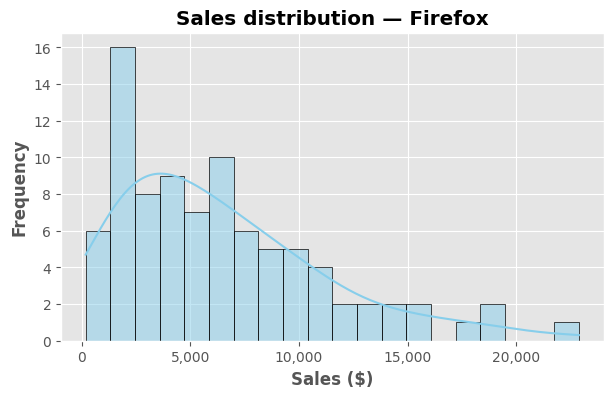

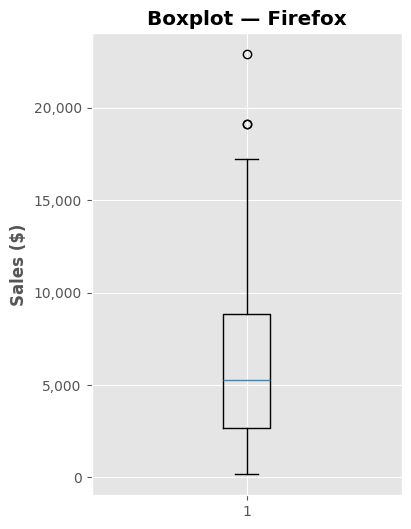


======= Safari =======
Shapiro-Wilk p-value: 0.00145
The distribution is not normal.


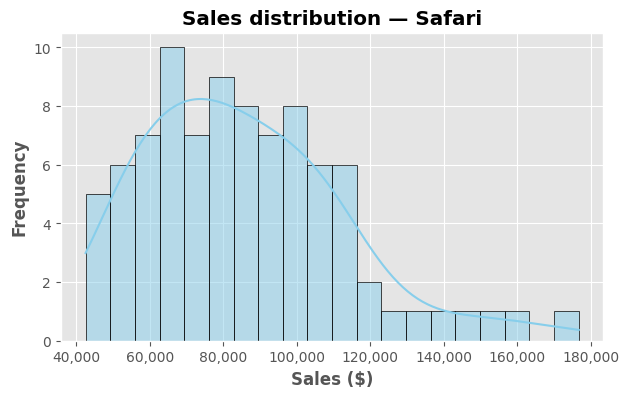

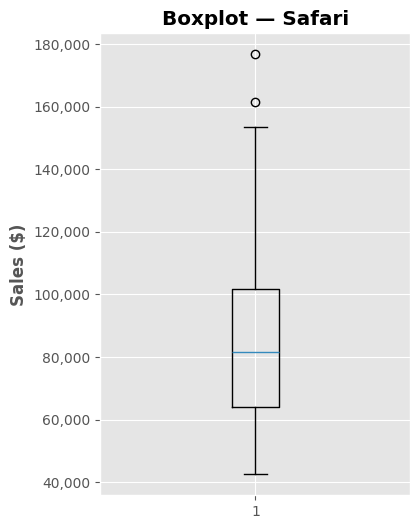

In [203]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from scipy.stats import shapiro
from matplotlib.ticker import StrMethodFormatter

# We only take the names of the browsers (without order_date)
browsers = df_browser_by_sales.columns[1:]

# Normality test for each group
for br in browsers:
    # Discarding null and zero values
    data = df_browser_by_sales[br][df_browser_by_sales[br] != 0].dropna()

    print(f'\n======= \033[1m{br}\033[0m =======')

    # Shapiro-Wilk test
    stat, p = shapiro(data)
    print(f'Shapiro-Wilk p-value: \033[1m{p:.5f}\033[0m')

    if p > 0.05:
        print('The distribution is close to normal.')
    else:
        print('The distribution is not normal.')

    # Histogram, KDE
    plt.figure(figsize=(7,4))
    sns.histplot(data, bins=20, kde=True, edgecolor='black', color='skyblue')
    plt.title(f'Sales distribution — {br}', fontweight='bold')
    plt.xlabel('Sales ($)', fontweight='bold')
    plt.ylabel('Frequency', fontweight='bold')

    # Format X-axis as 10,000
    plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

    plt.show()

    # Boxplot
    plt.figure(figsize=(4,6))
    plt.boxplot(data, vert=True)
    plt.title(f'Boxplot — {br}', fontweight='bold')
    plt.ylabel('Sales ($)', fontweight='bold')

    # Format Y-axis as 10,000
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

    plt.show()

In [204]:
from scipy.stats import spearmanr

# We only take columns with sales of browsers
data = df_browser_by_sales[browsers]

# Calculate the correlation matrix and p-values
corr_matrix_by_browser = data.corr(method='spearman')

print('Spearman correlation matrix:')
print(f'\033[1m{corr_matrix_by_browser}\033[0m')

# Checking statistical significance for each pair
for i, br1 in enumerate(browsers):
    for j, br2 in enumerate(browsers):
        if i < j:
            coef, p = spearmanr(data[br1], data[br2])
            print(f'\033[1m{br1}vs {br2}\033[0m — Spearman r: \033[1m{coef:.3f}\033[0m, p-value: \033[1m{p:.25f}\033[0m')

Spearman correlation matrix:
browser           <Other>  Android Webview    Chrome      Edge   Firefox  \
browser                                                                    
<Other>          1.000000         0.323976  0.431425  0.353972  0.271371   
Android Webview  0.323976         1.000000  0.487744  0.169101  0.128416   
Chrome           0.431425         0.487744  1.000000  0.484247  0.481473   
Edge             0.353972         0.169101  0.484247  1.000000  0.232590   
Firefox          0.271371         0.128416  0.481473  0.232590  1.000000   
Safari           0.438531         0.419582  0.793089  0.405068  0.498320   

browser            Safari  
browser                    
<Other>          0.438531  
Android Webview  0.419582  
Chrome           0.793089  
Edge             0.405068  
Firefox          0.498320  
Safari           1.000000  
<Other>vs Android Webview — Spearman r: 0.324, p-value: 0.0016304328931635197249411
<Other>vs Chrome — Spearman r: 0.431, p-value: 0.00001

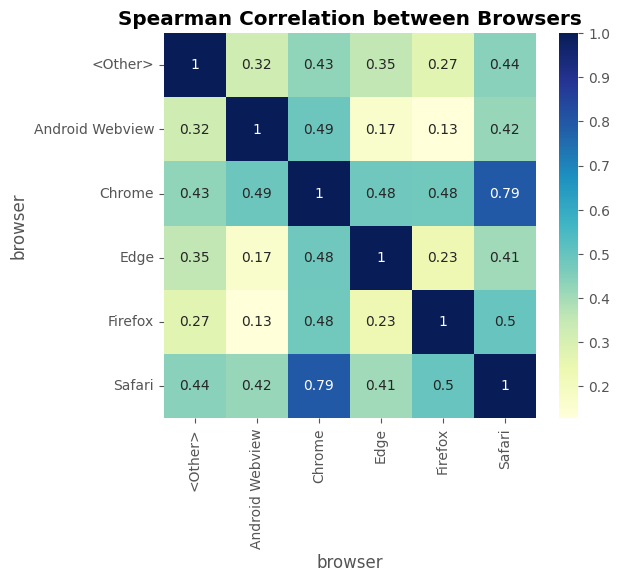

In [205]:
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix_by_browser, annot=True, cmap='YlGnBu')
plt.title("Spearman Correlation between Browsers", fontweight='bold')
plt.show()

The highest correlations are between Chrome and Safari (0.79), which can be explained by the similar behavior of users on these browsers.
Firefox and Safari (0.50) also show a noticeable dependence.
Android Webview has the lowest correlations with other browsers (0.13–0.43), which may indicate specific usage. These results should be taken into account when optimizing web content for different platforms.

### **8. Statistical analysis of differences between groups**

## **8.1. Analyze sales for each date for registered and unregistered users**

In [206]:
# Checking the values ​​in the field
df['account_id'].unique()

<IntegerArray>
[  <NA>, 649280, 676055, 677981, 672927, 653089, 652773, 661871, 654307,
 652752,
 ...
 667646, 678714, 648381, 642782, 649885, 652887, 675528, 660454, 647640,
 637845]
Length: 27946, dtype: Int64

The account_id field stores missing values ​​of type NA.
That is, we will interpret that:  
 - NA - unregistered user;
 - number (649280, 676055, …) - registered user.

In [207]:
registered_count = df.loc[df['account_id'].notna()].shape[0]
unregistered_count = df.loc[df['account_id'].isna()].shape[0]

print(f'Number of registered users: \033[1m{registered_count}\033[0m')
print(f'Number of unregistered users: \033[1m{unregistered_count}\033[0m')

Number of registered users: 27945
Number of unregistered users: 321600


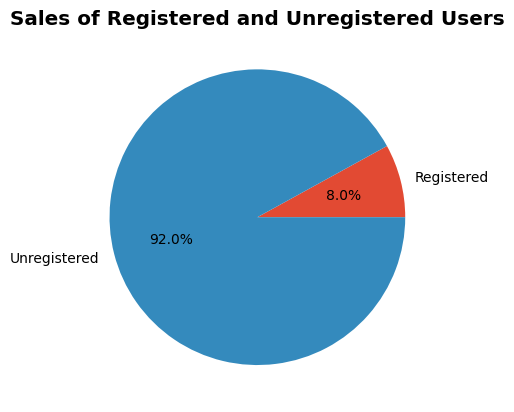

In [208]:
# Pie Chart Sales of Registered and Unregistered Users
sizes = [registered_count, unregistered_count]
labels = ['Registered', 'Unregistered']

plt.figure()
plt.pie(sizes, labels=labels, autopct='%1.1f%%')


plt.title('Sales of Registered and Unregistered Users', fontweight='bold')
plt.show()

In [209]:
# Total Sales of Registered and Unregistered Users
sales_by_status = (
    df.assign(
        status=df['account_id']
                 .notna()
                 .map({True: 'registered', False: 'unregistered'})
    )
    .groupby(['order_date', 'status'], as_index=False)['price']
    .sum()
    .rename(columns={'price': 'revenue'})
)

print(f'Sales by date and user status:\n\033[1m{sales_by_status}\033[0m')

Sales by date and user status:
    order_date        status   revenue
0   2020-11-01    registered   21547.0
1   2020-11-01  unregistered  222745.5
2   2020-11-02    registered   44956.8
3   2020-11-02  unregistered  310550.0
4   2020-11-03    registered   29150.5
..         ...           ...       ...
175 2021-01-27  unregistered  271727.1
176 2021-01-28  unregistered       0.0
177 2021-01-29  unregistered       0.0
178 2021-01-30  unregistered       0.0
179 2021-01-31  unregistered       0.0

[180 rows x 3 columns]


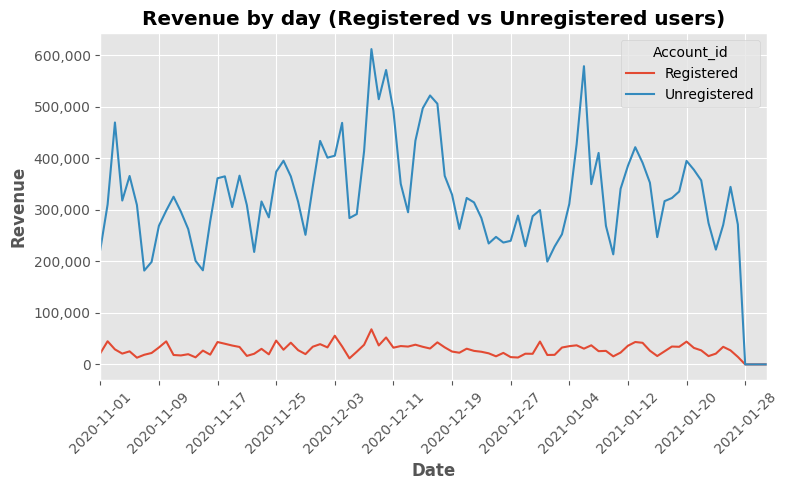

In [210]:
# df['order_date'] = pd.to_datetime(df['order_date'])

# Income by day for registered users
df_registered = (
    df[df['account_id'].notna()]
    .groupby('order_date')['price']
    .sum()
)

# Income by day for unregistered users
df_unregistered = (
    df[df['account_id'].isna()]
    .groupby('order_date')['price']
    .sum()
)

# Combine all dates
sales_by_day = pd.concat(
    [df_registered, df_unregistered],
    axis=1,
    keys=['Registered', 'Unregistered']
).fillna(0)

plt.figure(figsize=(8, 5))
plt.plot(sales_by_day.index, sales_by_day['Registered'], label='Registered')
plt.plot(sales_by_day.index, sales_by_day['Unregistered'], label='Unregistered')

# X-axis ticks every 8 days
x_ticks = pd.date_range(
    start=df['order_date'].min(),
    end=df['order_date'].max(),
    freq='8D'
)
plt.xticks(x_ticks, rotation=45)

# Limit X-axis
plt.xlim(df['order_date'].min(), df['order_date'].max())

# Y-axis formatting 10,000
from matplotlib.ticker import StrMethodFormatter
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.title('Revenue by day (Registered vs Unregistered users)', fontweight='bold')
plt.xlabel('Date', fontweight='bold')
plt.ylabel('Revenue', fontweight='bold')
plt.legend(title='Account_id')
plt.grid(True)
plt.tight_layout()
plt.show()

From November 2020 to the end of January 2021, unregistered users consistently generated more revenue than registered users. The graph shows sharp peaks in unregistered user activity, while registered revenue remained relatively flat. This could be a sign of significant one-time or guest purchases contributing to overall revenue. At the end of January, there was a noticeable decline in revenue for both registered and unregistered users.

In [211]:
# Divide data into samples
registered_revenue = sales_by_status[sales_by_status['status'] == 'registered']['revenue']
unregistered_revenue = sales_by_status[sales_by_status['status'] == 'unregistered']['revenue']

print(f'Registered: \033[1m{registered_revenue}\033[0m')
print(f'Unregistered: \033[1m{unregistered_revenue}\033[0m')

Registered: 0      21547.0
2      44956.8
4      29150.5
6      20982.2
8      25334.6
        ...   
166    16117.0
168    20914.0
170    34163.8
172    27213.6
174    14613.6
Name: revenue, Length: 88, dtype: float64
Unregistered: 1      222745.5
3      310550.0
5      469829.1
7      318204.9
9      365942.0
         ...   
175    271727.1
176         0.0
177         0.0
178         0.0
179         0.0
Name: revenue, Length: 92, dtype: float64


Before choosing a test, it is necessary to check the normality of the distribution.

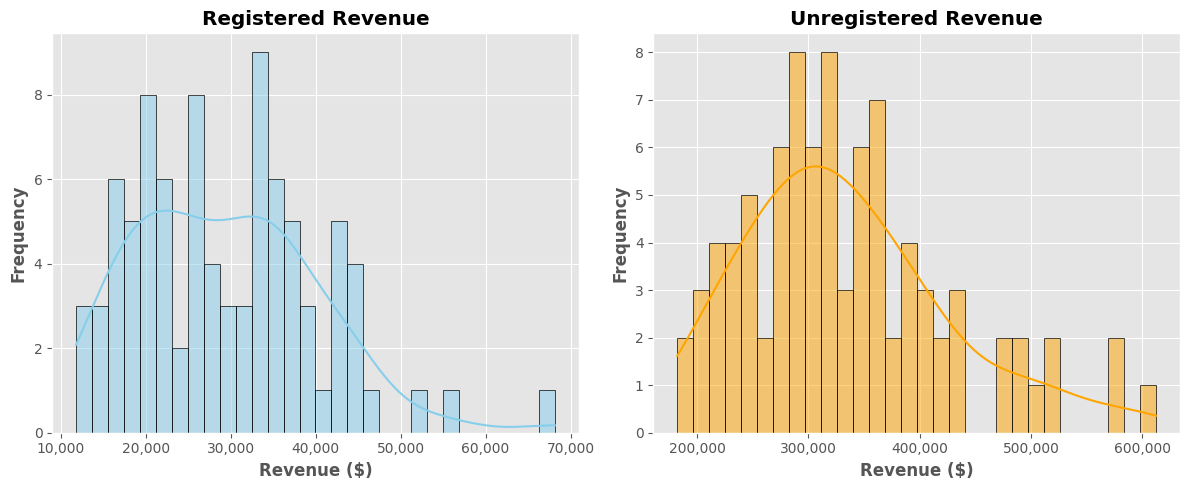

In [212]:
from matplotlib.ticker import StrMethodFormatter

# Cleaning the sample from 0s income
registered_clean = registered_revenue[registered_revenue > 0]
unregistered_clean = unregistered_revenue[unregistered_revenue > 0]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(registered_clean, stat='count', bins=30, kde=True, color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_title('Registered Revenue', fontweight='bold')
axes[0].set_xlabel('Revenue ($)', fontweight='bold')
axes[0].set_ylabel('Frequency',  fontweight='bold')
# Format X-axis as 10,000
axes[0].xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

sns.histplot(unregistered_clean, stat='count',  bins=30, kde=True, color='orange', edgecolor='black', ax=axes[1])
axes[1].set_title('Unregistered Revenue', fontweight='bold')
axes[1].set_xlabel('Revenue ($)', fontweight='bold')
axes[1].set_ylabel('Frequency', fontweight='bold')
# Format X-axis as 10,000
axes[1].xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()

The distribution is different from normal. To do this, we will use the Shapiro-Wilk test.

In [213]:
# Statistical test for normality (Shapiro-Wilk)
from scipy.stats import shapiro

print('\033[1mRegistered:\033[0m', shapiro(registered_clean))
print('\033[1mUnregistered:\033[0m', shapiro(unregistered_clean))

Registered: ShapiroResult(statistic=np.float64(0.9591810175035426), pvalue=np.float64(0.007295139880540744))
Unregistered: ShapiroResult(statistic=np.float64(0.9521579282190968), pvalue=np.float64(0.0026183359245325936))


Both the samples of income, both registered and unregistered users, do not follow a normal distribution. Therefore, it is better to use a nonparametric test, such as the Mann-Whitney U test, to compare these two samples.

In [214]:
from scipy.stats import mannwhitneyu

u_stat, p_value = mannwhitneyu(registered_clean, unregistered_clean, alternative='two-sided')

print('\n\033[1mMann-Whitney U Test\033[0m')
print(f'Statistic: \033[1m{u_stat}\033[0m')
print(f'p-value: \033[1m{p_value}\033[0m')

if p_value < 0.05:
    print('The difference between the groups is statistically significant.')
else:
    print('The difference between the groups is not statistically significant.')


Mann-Whitney U Test
Statistic: 0.0
p-value: 2.2159276950123465e-30
The difference between the groups is statistically significant.


So, the results confirm a strong difference in income between registered and unregistered users.

## **8.2. Analysis of the number of sessions by different traffic channels**

In [215]:
# Let's recall what different traffic channels are present in the dataset
df['channel'].unique()

array(['Paid Search', 'Organic Search', 'Direct', 'Undefined',
       'Social Search'], dtype=object)

Statistical hypotheses:

H₀ : the average number of sessions in all channels is the same

H₁ : there is a difference between at least two channels

In [216]:
session_cnt_by_channel = df.groupby('channel')['ga_session_id'].count().sort_values(ascending=False).reset_index()
session_cnt_by_channel.columns = ['channel', 'session_cnt']

print(f'Number of sessions by different traffic channels:\n\033[1m{session_cnt_by_channel}\033[0m')

Number of sessions by different traffic channels:
          channel  session_cnt
0  Organic Search       124425
1     Paid Search        94341
2          Direct        81382
3   Social Search        27914
4       Undefined        21483


In [217]:
number_of_session_by_channels = (
    pd.pivot_table(
        df,
        values = 'ga_session_id',
        index = 'order_date',
        columns = 'channel',
        aggfunc='count'
    ).reset_index()
)

print(f'Total number of sessions by dates and different traffic channels:\n\033[1m{number_of_session_by_channels}\033[0m')

Total number of sessions by dates and different traffic channels:
channel order_date  Direct  Organic Search  Paid Search  Social Search  \
0       2020-11-01     608             920          706            214   
1       2020-11-02     810            1242          970            315   
2       2020-11-03    1216            1871         1367            392   
3       2020-11-04     935            1425         1145            368   
4       2020-11-05     845            1293          917            346   
..             ...     ...             ...          ...            ...   
87      2021-01-27     984            1561         1192            359   
88      2021-01-28     997            1379         1107            364   
89      2021-01-29     878            1319          988            288   
90      2021-01-30     685             989          787            218   
91      2021-01-31     644            1051          729            228   

channel  Undefined  
0              128  
1  

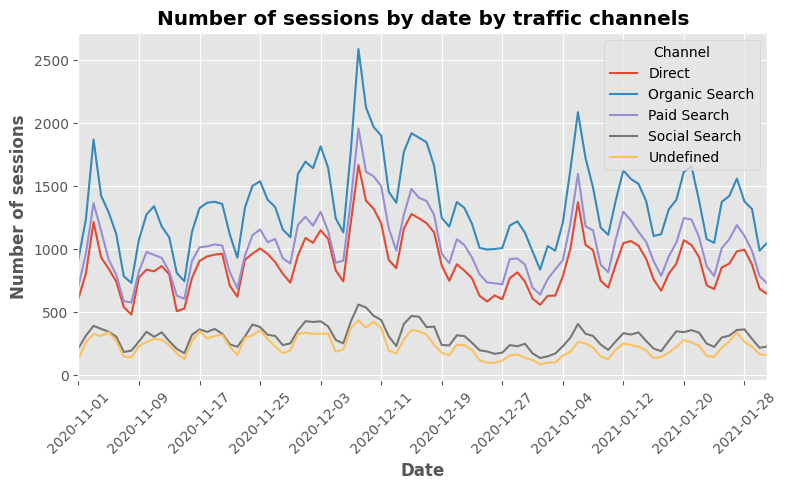

In [218]:
import matplotlib.pyplot as plt

# Set the date as an index
df_plot = number_of_session_by_channels.set_index('order_date')

plt.figure(figsize=(8, 5))

for channel in df_plot.columns:
    plt.plot(df_plot.index, df_plot[channel], label=channel)

# Formation of correct labels by X with a step of 6 days
x_ticks = pd.date_range(start=df['order_date'].min(),
                        end=df['order_date'].max(),
                        freq='8D')
plt.xticks(x_ticks, rotation=45)

# Limit for X-axis
plt.xlim(df['order_date'].min(), df['order_date'].max())

plt.xlabel('Date', fontweight='bold')
plt.ylabel('Number of sessions', fontweight='bold')
plt.title('Number of sessions by date by traffic channels', fontweight='bold')
plt.legend(title='Channel')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The graph shows the dynamics of sessions by traffic channel from early November 2020 to late January 2021. Organic search consistently provides the largest number of sessions, followed by paid search and direct traffic. Social search and unknown sources have significantly less activity. Notable peaks in traffic are observed in early December and January, indicating seasonal patterns (e.g., the holiday period).


======= Direct =======
Statistic: 0.97038
Shapiro-Wilk p-value: 0.03428
The distribution is not normal (reject H₀).


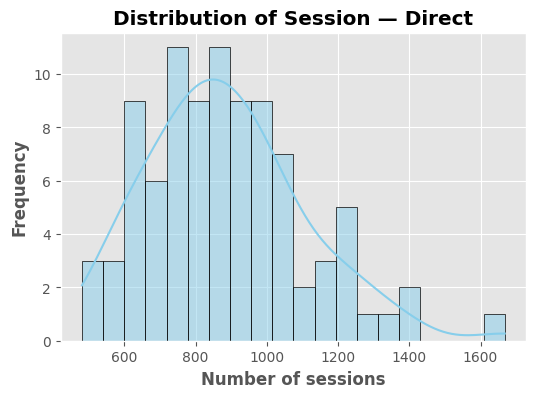

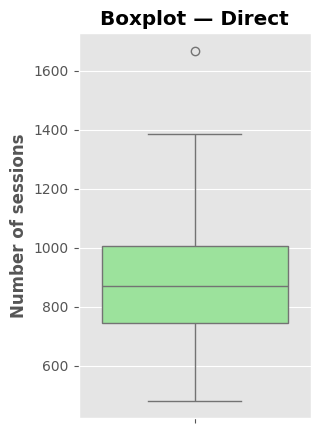


======= Organic Search =======
Statistic: 0.96406
Shapiro-Wilk p-value: 0.01227
The distribution is not normal (reject H₀).


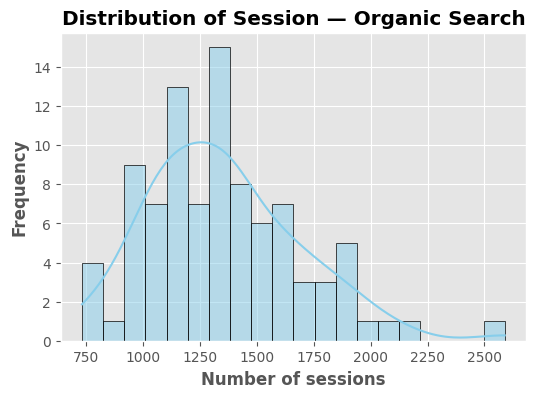

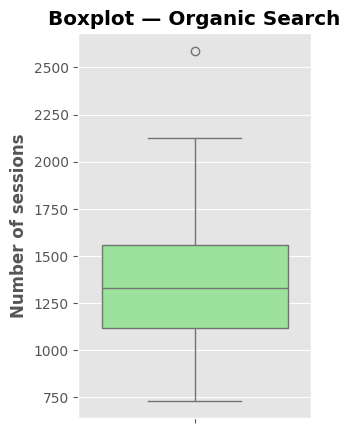


======= Paid Search =======
Statistic: 0.96328
Shapiro-Wilk p-value: 0.01083
The distribution is not normal (reject H₀).


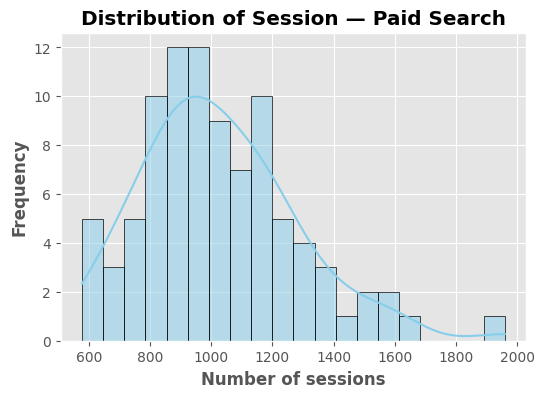

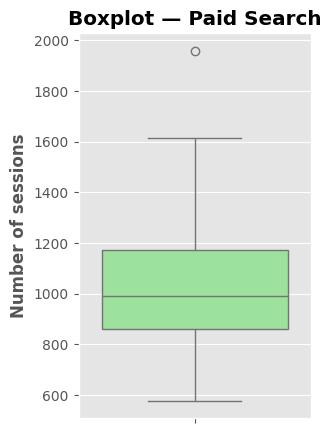


======= Social Search =======
Statistic: 0.97888
Shapiro-Wilk p-value: 0.14127
The distribution is close to normal (fail to reject H₀).


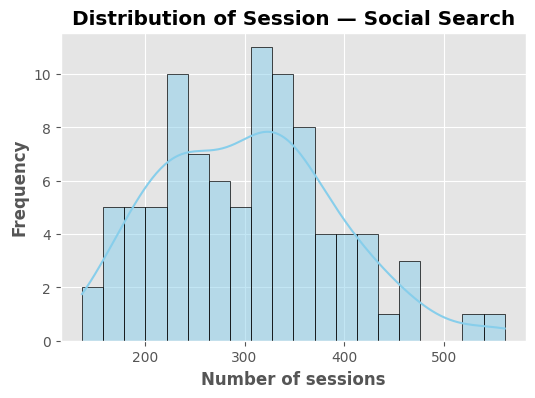

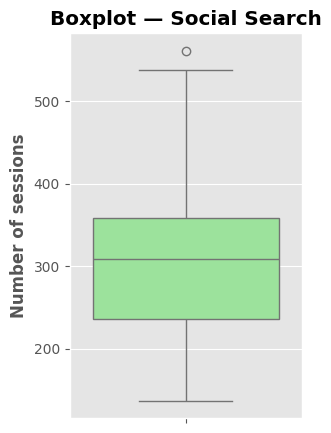


======= Undefined =======
Statistic: 0.97318
Shapiro-Wilk p-value: 0.05456
The distribution is close to normal (fail to reject H₀).


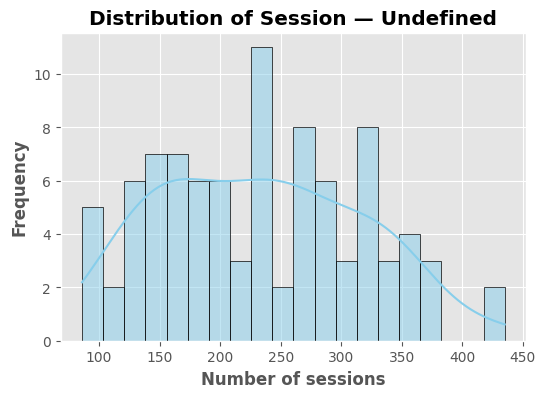

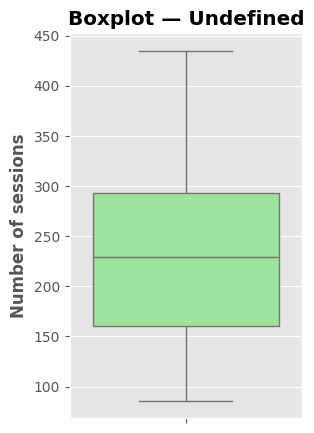

In [219]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from scipy.stats import shapiro

num_of_channels = number_of_session_by_channels.columns[1:]

for ch in num_of_channels:
    data = number_of_session_by_channels[ch].dropna()
    data = data[data != 0]

    print(f'\n======= \033[1m{ch}\033[0m =======')

    # Shapiro-Wilk test
    stat, p = shapiro(data)
    print(f'Statistic: \033[1m{stat:.5f}\033[0m')
    print(f'Shapiro-Wilk p-value: \033[1m{p:.5f}\033[0m')

    if p > 0.05:
        print('The distribution is close to normal (fail to reject H₀).')
    else:
        print('The distribution is not normal (reject H₀).')

    # Histogram, KDE
    plt.figure(figsize=(6,4))
    sns.histplot(data, bins=20, kde=True, edgecolor='black', color='skyblue')
    plt.title(f'Distribution of Session — {ch}', fontweight='bold')
    plt.xlabel('Number of sessions', fontweight='bold')
    plt.ylabel('Frequency', fontweight='bold')
    plt.show()

    # Boxplot
    plt.figure(figsize=(3,5))
    sns.boxplot(y=data, color='lightgreen')
    plt.title(f'Boxplot — {ch}', fontweight='bold')
    plt.ylabel('Number of sessions', fontweight='bold')
    plt.show()

The graphs show that the data distribution is not normal for most traffic channels, in particular:

- Direct, Organic Search, Paid Search — p-value < 0.05, so we reject the null hypothesis of normal distribution. The distributions for these channels are statistically significantly different from normal.
- Social Search, Undefined — p-value > 0.05, so we do not reject the null hypothesis. The distributions do not have statistically significant deviations from normal.

Therefore, for further analysis, it is worthwhile to use non-parametric methods, as most groups do not meet the criteria for normality. Using the Kruskal-Wallis method and Post-hoc test (Dunn’s test) for pairwise comparison of channels.

In [220]:
!pip install scikit-posthocs

In [221]:
from scipy.stats import kruskal
import scikit_posthocs as sp
import warnings
warnings.filterwarnings("ignore")

# Data preparation, creating a list of groups for Kruskal-Wallis
num_of_channels = number_of_session_by_channels.columns[1:]
groups = []

for ch in num_of_channels:
    data = number_of_session_by_channels[ch].dropna()
    data = data[data != 0]
    groups.append(data)

# Kruskal-Wallis Test
stat, p = kruskal(*groups)
print(f'Kruskal-Wallis statistic: \033[1m{stat:.5f}\033[0m')
print(f'p-value: \033[1m{p}\033[0m')

if p < 0.05:
    print('There are statistically significant differences between channels (reject H₀)')
else:
    print('There are no statistically significant differences between channels (fail to reject H₀)')

# Post-hoc test (Dunn’s test) for pairwise comparison of channels
# Creatinf a tabl "long format"
df_long = number_of_session_by_channels.melt(id_vars='order_date',
                                             value_vars=num_of_channels,
                                             var_name='channel',
                                             value_name='sessions')

# Removing 0s and NaN
df_long = df_long[df_long['sessions'] != 0].dropna()

# We perform Dunn’s test with Bonferroni correction
posthoc = sp.posthoc_dunn(df_long, val_col='sessions', group_col='channel', p_adjust='bonferroni')

print("\nPost-hoc Dunn’s test (p-values):")
print(f'\033[1m{posthoc}\033[0m')

Kruskal-Wallis statistic: 368.98057
p-value: 1.397036102599359e-78
There are statistically significant differences between channels (reject H₀)

Post-hoc Dunn’s test (p-values):
                      Direct  Organic Search   Paid Search  Social Search  \
Direct          1.000000e+00    6.323122e-08  4.326742e-01   4.304460e-15   
Organic Search  6.323122e-08    1.000000e+00  1.525628e-03   3.740352e-43   
Paid Search     4.326742e-01    1.525628e-03  1.000000e+00   3.286805e-23   
Social Search   4.304460e-15    3.740352e-43  3.286805e-23   1.000000e+00   
Undefined       4.847586e-23    4.546360e-56  6.982112e-33   4.735275e-01   

                   Undefined  
Direct          4.847586e-23  
Organic Search  4.546360e-56  
Paid Search     6.982112e-33  
Social Search   4.735275e-01  
Undefined       1.000000e+00  


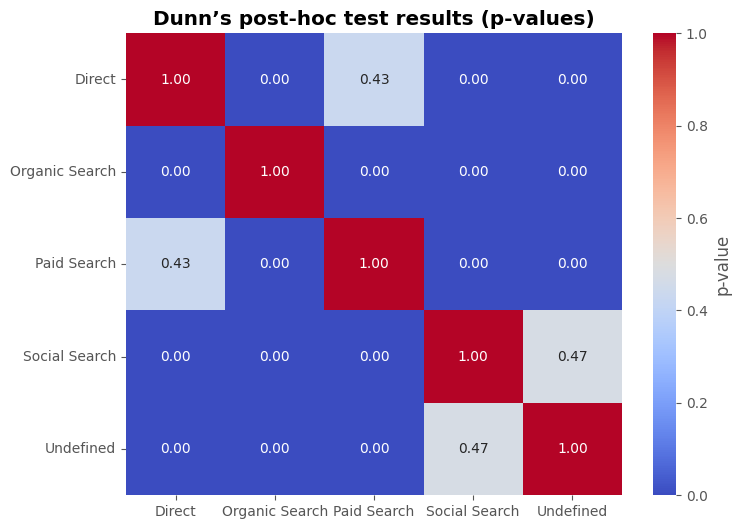

In [222]:
plt.figure(figsize=(8,6))
sns.heatmap(posthoc, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'label': 'p-value'})
plt.title('Dunn’s post-hoc test results (p-values)', fontweight='bold')
plt.show()

The graph shows the results of pairwise comparisons of traffic channels using Dunn's post hoc test.  

Statistically significant differences (p < 0.05) were found between most pairs of channels, especially organic search, which is significantly different from the others. Paid search is not significantly different from direct traffic (p = 0.43), and social search and unknown sources are also not significantly different from each other (p = 0.47).

So, overall, the traffic channels are different from each other.

## **8.3. Estimating the statistical significance of the share of sessions with organic traffic in Europe and America**

In [223]:
# Checking the names of continents
df['continent'].unique()

array(['Americas', 'Europe', 'Africa', 'Asia', 'Oceania', '(not set)'],
      dtype=object)

In [224]:
# Checking the names of channel
df['channel'].unique()

array(['Paid Search', 'Organic Search', 'Direct', 'Undefined',
       'Social Search'], dtype=object)

In [225]:
# Filtering only for Europe and America
filtered_df = df[df['continent'].isin(['Europe', 'Americas'])].copy()

# Total number of sessions by dates and continents
total_sessions = (
    filtered_df.groupby(['order_date', 'continent'])['ga_session_id']
    .count()
    .reset_index(name='total_sessions')
)

# Number of organic sessions by dates and continents
organic_sessions = (
    filtered_df[filtered_df['channel'].str.contains('organic search', case=False)]
    .groupby(['order_date', 'continent'])['ga_session_id']
    .count()
    .reset_index(name='organic_sessions')
)

# Combining total and organic
merged_sessions = pd.merge(
    total_sessions,
    organic_sessions,
    on=['order_date', 'continent'],
    how="left"
)

# Fill in missing values ​​with zeros
merged_sessions['organic_sessions'] = merged_sessions['organic_sessions'].fillna(0)

# Calculating the proportion of organic sessions
merged_sessions["proportion_organic"] = (
    merged_sessions["organic_sessions"] / merged_sessions["total_sessions"] * 100
).round(2)

# Sorting by date and continents
merged_sessions = merged_sessions.sort_values(by=['order_date', 'continent']).reset_index(drop=True)

print(f'Total number of sessions for Europe and America:\n\033[1m{merged_sessions}\033[0m')

Total number of sessions for Europe and America:
    order_date continent  total_sessions  organic_sessions  proportion_organic
0   2020-11-01  Americas            1474               534               36.23
1   2020-11-01    Europe             463               170               36.72
2   2020-11-02  Americas            1968               654               33.23
3   2020-11-02    Europe             659               228                34.6
4   2020-11-03  Americas            2814               981               34.86
..         ...       ...             ...               ...                 ...
179 2021-01-29    Europe             682               248               36.36
180 2021-01-30  Americas            1614               571               35.38
181 2021-01-30    Europe             510               184               36.08
182 2021-01-31  Americas            1507               535                35.5
183 2021-01-31    Europe             536               205               38.25

[1


======= continent — Americas =======
No numeric data available.

======= continent — Europe =======
No numeric data available.

======= total_sessions — Americas =======
Statistic: 0.97076
Shapiro-Wilk p-value: 0.03650
The distribution is not normal.


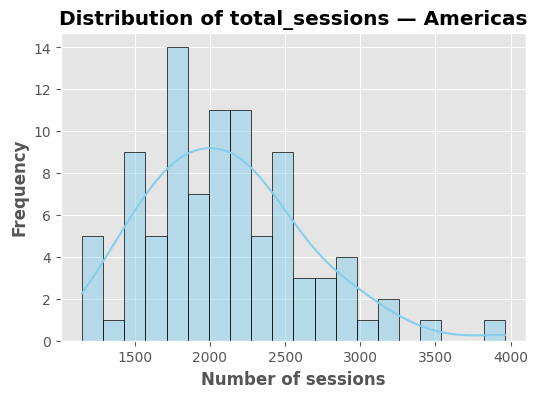

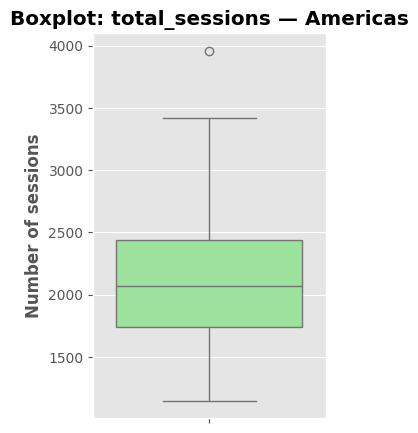


======= total_sessions — Europe =======
Statistic: 0.96999
Shapiro-Wilk p-value: 0.03210
The distribution is not normal.


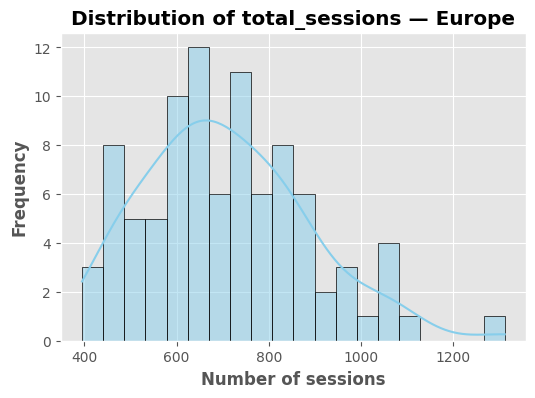

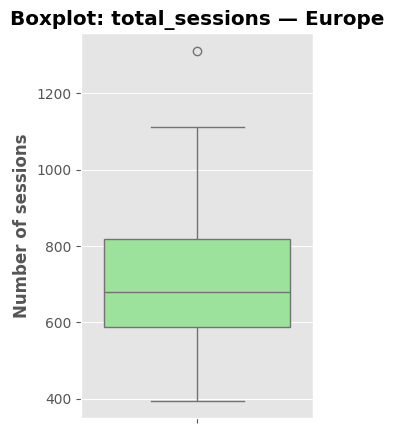


======= organic_sessions — Americas =======
Statistic: 0.96509
Shapiro-Wilk p-value: 0.01447
The distribution is not normal.


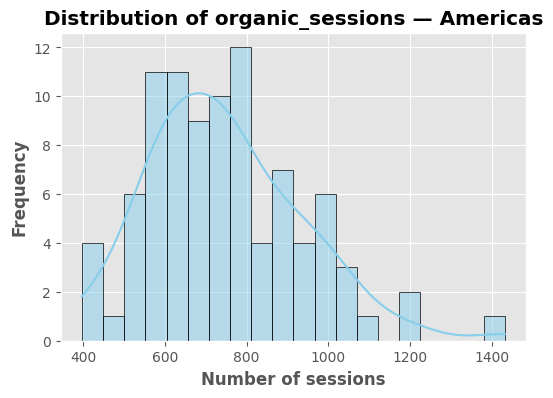

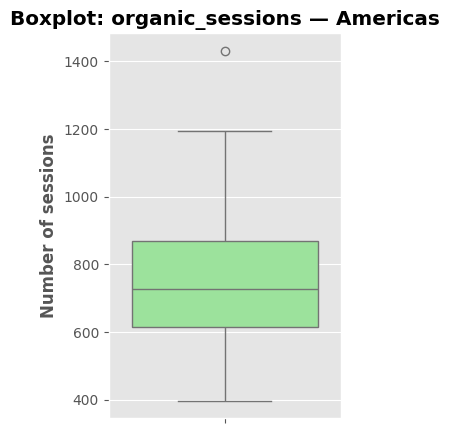


======= organic_sessions — Europe =======
Statistic: 0.97115
Shapiro-Wilk p-value: 0.03894
The distribution is not normal.


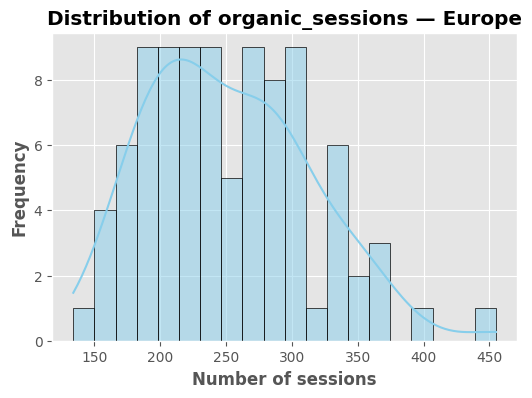

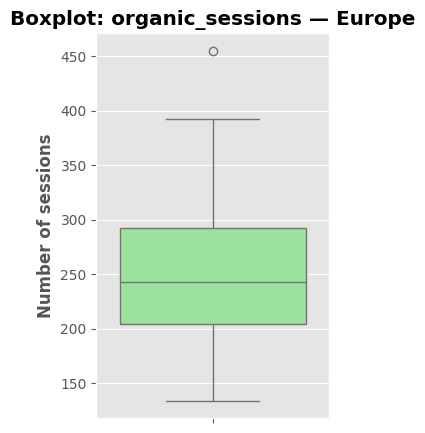


======= proportion_organic — Americas =======
Statistic: 0.97551
Shapiro-Wilk p-value: 0.08056
The distribution is close to normal.


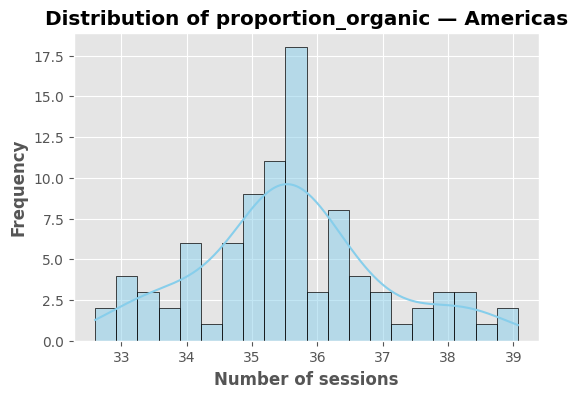

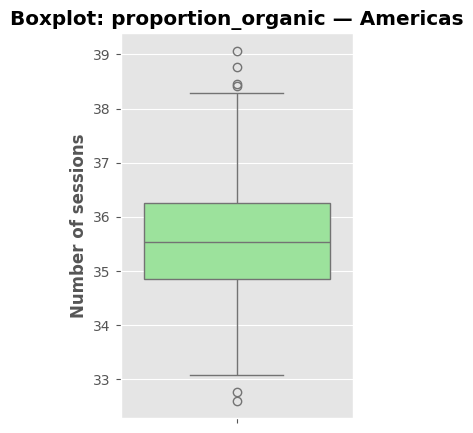


======= proportion_organic — Europe =======
Statistic: 0.98428
Shapiro-Wilk p-value: 0.33614
The distribution is close to normal.


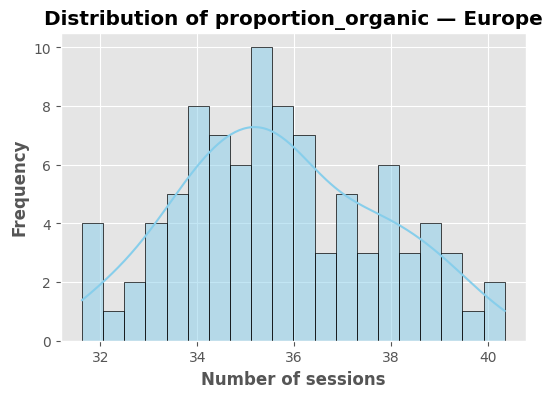

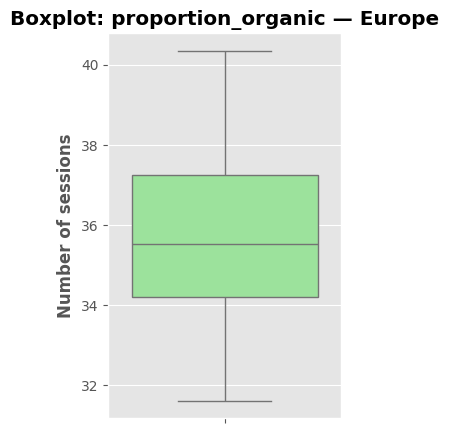

In [226]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from scipy.stats import shapiro

# Skip the first column if it is an ID or name
num_of_merged_sessions = merged_sessions.columns[1:]

continents = merged_sessions['continent'].unique()

for ch in num_of_merged_sessions:
    for cont in continents:
        # Filtering by continet
        data = merged_sessions[merged_sessions['continent'] == cont][ch].dropna()

        # Drop 0s
        data = data[data != 0]

        # Leave only numerical values
        data = pd.to_numeric(data, errors='coerce').dropna()

        if len(data) == 0:
            print(f'\n======= {ch} — {cont} =======')
            print('No numeric data available.')
            continue

        print(f'\n======= \033[1m{ch} — {cont}\033[0m =======')

        # Shapiro-Wilk test
        stat, p = shapiro(data)
        print(f'Statistic: \033[1m{stat:.5f}\033[0m')
        print(f'Shapiro-Wilk p-value: \033[1m{p:.5f}\033[0m')

        if p > 0.05:
            print('The distribution is close to normal.')
        else:
            print('The distribution is not normal.')

        # Histogram, KDE
        plt.figure(figsize=(6,4))
        sns.histplot(data, bins=20, kde=True, edgecolor='black', color='skyblue')
        plt.title(f'Distribution of {ch} — {cont}', fontweight='bold')
        plt.xlabel('Number of sessions', fontweight='bold')
        plt.ylabel('Frequency', fontweight='bold')
        plt.show()

        # Boxplot
        plt.figure(figsize=(3,5))
        sns.boxplot(y=data, color='lightgreen')
        plt.title(f'Boxplot: {ch} — {cont}', fontweight='bold')
        plt.ylabel('Number of sessions', fontweight='bold')
        plt.show()

The distribution of organic search data for the continents Europe and America is different from normal. Therefore, for further analysis, we will use the Z-test method for two proportions (Europe vs America).

In [227]:
import numpy as np
from scipy.stats import norm

# Data of all period
# Europe
x1 = merged_sessions[merged_sessions['continent']=="Europe"]["organic_sessions"].sum()
n1 = merged_sessions[merged_sessions['continent']=="Europe"]["total_sessions"].sum()

# America
x2 = merged_sessions[merged_sessions['continent']=="Americas"]["organic_sessions"].sum()
n2 = merged_sessions[merged_sessions['continent']=="Americas"]["total_sessions"].sum()

# Proportions
p1 = x1 / n1
p2 = x2 / n2

# Combined proportion
p_pool = (x1 + x2) / (n1 + n2)

# Standard error
SE = np.sqrt(p_pool * (1 - p_pool) * (1/n1 + 1/n2))

# Z-statistic
Z = (p1 - p2) / SE

# P-value for a two-sided test
p_value = 2 * (1 - norm.cdf(abs(Z)))

print(f"Europe: \033[1m{x1}/{n1}\033[0m, proportions: \033[1m{p1:.4f}\033[0m")
print(f"Americas: \033[1m{x2}/{n2}\033[0m, proportions: \033[1m{p2:.4f}\033[0m")
print(f"Z-statistic: \033[1m{Z:.4f}\033[0m")
print(f"P-value: \033[1m{p_value:.4f}\033[0m")

if p_value < 0.05:
    print("The difference is statistically significant.")
else:
    print("The difference is not statistically significant.")

Europe: 23195/65135, proportions: 0.3561
Americas: 68671/193179, proportions: 0.3555
Z-statistic: 0.2895
P-value: 0.7722
The difference is not statistically significant.


As a result of comparing the two shares of organic sessions in the two continents Europe and America, the following results were obtained:
- On the continent Europe there are 23,195 organic sessions out of 65,135 and 𝑝1=0.3561
- On the continent Americas there are 68,671 organic sessions out of 193,179 and p2=0.3555
That is, the shares for the two continents are almost the same: 35.61% versus 35.55%.
Regarding Z-statistic=0.2895, a small value was obtained, which is close to zero. It shows that the difference between the groups 0.3561 and 0.3555 is very small.

But P-value=0.7722 is much larger than the usual threshold of 0.05, so there is no statistical reason to believe that the proportions are different.

In other words, the difference between the studied continents Europe and America is random and insignificant.

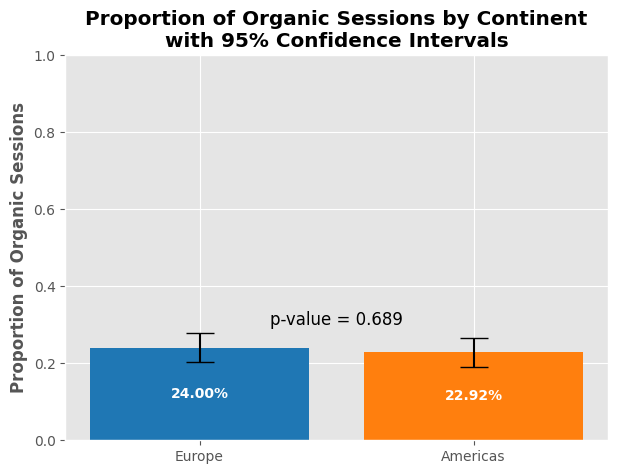

In [228]:
from statsmodels.stats.proportion import proportion_confint, proportions_ztest

# Data
continents = ['Europe', 'Americas']
x1, n1 = 120, 500
x2, n2 = 110, 480
proportions = [x1/n1, x2/n2]

# Confidence intervals (95%)
ci_low = []
ci_high = []

for x, n in [(x1, n1), (x2, n2)]:
    low, high = proportion_confint(x, n, alpha=0.05, method='normal')
    ci_low.append(low)
    ci_high.append(high)

# Errors for plt.bar
error = [np.array(proportions) - np.array(ci_low), np.array(ci_high) - np.array(proportions)]

plt.figure(figsize=(7, 5))
bars = plt.bar(continents, proportions, yerr=error, capsize=10, color=['#1f77b4', '#ff7f0e'])

# Adding numbers inside columns
for bar, prop in zip(bars, proportions):
    plt.text(bar.get_x() + bar.get_width()/2, prop/2, f"{prop:.2%}", ha='center', va='center', color='white', fontweight='bold')

# Calculating p-value
count = np.array([x1, x2])
nobs = np.array([n1, n2])
stat, pval = proportions_ztest(count, nobs)

# Adding an annotation for p-value
plt.text(0.5, max(proportions)+0.05, f"p-value = {pval:.3f}", ha='center', va='bottom', fontsize=12)

plt.ylabel('Proportion of Organic Sessions', fontweight='bold')
plt.title('Proportion of Organic Sessions by Continent\nwith 95% Confidence Intervals',  fontweight='bold')
plt.ylim(0, 1)
plt.show()

The graph shows overlapping confidence intervals, which is a sign that there is no statistically significant difference between the shares of organic sessions in Europe and America. This is also confirmed by the previous Z-test, which showed that the p-value > 0.05.

Therefore, we can conclude that the share of organic sessions is the same for both continents in a statistically significant sense.

# **9. Tableau Public Visualisation**

This dashboard provides a general overview of channel traffic performance in terms of user activity and sales. The graphs show the distribution of sessions, created accounts and total sales by channel, as well as sales dynamics over time. Additionally, conversions by channel are presented taking into account the status of accounts (is Unsubscribed), the distribution of sessions by channel and device (Is Verifed), as well as the contribution of each channel to the number of new accounts. The dashboard allows you to quickly assess which channels bring the most traffic, conversions and sales, and provides a comprehensive analysis of their performance.

[Link to Dashboard in Tableau Public](https://public.tableau.com/app/profile/oksana.olar/viz/ChannelSessionsAccountsSalesOverview/ChannelSessionsAccountsSalesOverview?publish=yes)

# **10. Business Summary**

Analysis of data for the period from November 1, 2020, to January 31, 2021, showed that the US is a key market, accounting for approximately 40–45% of global sales, with a notable dominance of English-speaking audiences and desktop devices. Organic and paid search bring the highest revenue, while unregistered users generate a larger share of sales, especially during the holiday peaks in December.

Markets in Asia and Europe demonstrate stable sales, but need to improve marketing and operational strategies, while Africa and uncertain regions need to check the quality of traffic. Mobile devices maintain a stable level of sales, but tablets are the least effective. A positive correlation between the number of sessions and sales, as well as synchronous sales growth across continents, allows you to predict the effectiveness of marketing campaigns and optimize investments in paid search.